# BINF-F401 - Comparison of the morphological description of tissues and thyroid glands, to their transcriptome.

Add a small description of the aim of the project and our names and group (group 4). 


## Content table 

Add a small description of the overall methodology for each question.

Add a small table of content 

In [114]:
#Library imports 

library(readr)
library(fgsea)
suppressMessages(library(data.table))
suppressMessages(library(pathwayPCA)) #check if i still use it 
suppressMessages(library(tigerstats))
suppressMessages(library(ggplot2))
suppressMessages(library(gridExtra))
suppressMessages(library("DESeq2"))
suppressMessages(library("vsn"))
suppressMessages(library("pheatmap"))
suppressMessages(library("RColorBrewer"))
suppressMessages(library(RColorBrewer))
suppressMessages(library(repr))
suppressMessages(library(gplots))
set.seed(42)

In [43]:
#clinical data 

cd <- suppressMessages(read_tsv("clinical-data.tsv"))
spec(cd)
summary(cd)

cols(
  SMPLID = col_character(),
  SEX = col_double(),
  AGE = col_double(),
  HGHT = col_double(),
  WGHT = col_double(),
  BMI = col_double(),
  SMPTHNTS = col_character(),
  COHORT = col_character(),
  TRISCHD = col_double(),
  DTHHRDY = col_double(),
  SUBJID = col_character(),
  IMGURL = col_character()
)

    SMPLID               SEX            AGE             HGHT      
 Length:136         Min.   :1.00   Min.   :21.00   Min.   :58.00  
 Class :character   1st Qu.:1.00   1st Qu.:30.00   1st Qu.:66.00  
 Mode  :character   Median :1.00   Median :38.00   Median :68.00  
                    Mean   :1.36   Mean   :37.53   Mean   :68.18  
                    3rd Qu.:2.00   3rd Qu.:45.25   3rd Qu.:71.00  
                    Max.   :2.00   Max.   :49.00   Max.   :76.00  
      WGHT            BMI          SMPTHNTS            COHORT         
 Min.   : 92.0   Min.   :18.58   Length:136         Length:136        
 1st Qu.:159.8   1st Qu.:24.27   Class :character   Class :character  
 Median :184.8   Median :27.75   Mode  :character   Mode  :character  
 Mean   :182.9   Mean   :27.55                                        
 3rd Qu.:205.2   3rd Qu.:31.07                                        
 Max.   :264.0   Max.   :34.86                                        
    TRISCHD          DTHHRDY      

In [45]:
#morphological counts
mc <- suppressMessages(read_tsv("morphological-counts.tsv"))

In [47]:
#rna read counts
rna <- suppressMessages(read_tsv("RNA-read-counts.tsv"))
rna

Name               Description       GTEX-11EM3-0126 GTEX-11EQ9-0626
1     ENSG00000223972.5  DDX11L1             0               1            
2     ENSG00000227232.5  WASH7P            122             174            
3     ENSG00000278267.1  MIR6859-1           0               0            
4     ENSG00000243485.5  MIR1302-2HG         3               0            
5     ENSG00000237613.2  FAM138A             1               0            
6     ENSG00000268020.3  OR4G4P              1               1            
7     ENSG00000240361.1  OR4G11P             1               5            
8     ENSG00000186092.4  OR4F5               0               1            
9     ENSG00000238009.6  RP11-34P13.7        3               1            
10    ENSG00000233750.3  CICP27              4               2            
11    ENSG00000268903.1  RP11-34P13.15     174              73            
12    ENSG00000269981.1  RP11-34P13.16     114              69            
13    ENSG00000239906.1  RP11-34P13.14       0               1            
14    ENSG00000241860.6  RP11-34P13.13      35              18            
15    ENSG00000222623.1  RNU6-1100P          0               0            
16    ENSG00000241599.1  RP11-34P13.9        0               0            
17    ENSG00000279928.2  ABC7-43046700E7.1   1              10            
18    ENSG00000279457.4  RP11-34P13.18     241             388            
19    ENSG00000273874.1  MIR6859-2           0               0            
20    ENSG00000228463.9  AP006222.2          6              19            
21    ENSG00000236679.2  RPL23AP24           1               1            
22    ENSG00000236743.1  RP5-857K21.15       0               0            
23    ENSG00000236601.2  RP4-669L17.2        0               0            
24    ENSG00000237094.11 RP4-669L17.10      15              19            
25    ENSG00000269732.1  WBP1LP7             0               0            
26    ENSG00000278566.1  OR4F29              0               0            
27    ENSG00000233653.3  CICP7               2               2            
28    ENSG00000250575.1  RP4-669L17.8        0               4            
29    ENSG00000278757.1  U6                  0               0            
30    ENSG00000230021.8  RP5-857K21.4        6               8            
⋮     ⋮                  ⋮                 ⋮               ⋮              
56171 ENSG00000210107.1  MT-TQ                   0               0        
56172 ENSG00000210112.1  MT-TM                   2               1        
56173 ENSG00000198763.3  MT-ND2             401331          644517        
56174 ENSG00000210117.1  MT-TW                   0               0        
56175 ENSG00000210127.1  MT-TA                   3               3        
56176 ENSG00000210135.1  MT-TN                   5               7        
56177 ENSG00000210140.1  MT-TC                  18               2        
56178 ENSG00000210144.1  MT-TY                  30             673        
56179 ENSG00000198804.2  MT-CO1            1746814         1998165        
56180 ENSG00000210151.2  MT-TS1                229             147        
56181 ENSG00000210154.1  MT-TD                   1               1        
56182 ENSG00000198712.1  MT-CO2             563143         1064812        
56183 ENSG00000210156.1  MT-TK                   0               0        
56184 ENSG00000228253.1  MT-ATP8             96445          140219        
56185 ENSG00000198899.2  MT-ATP6            550091          740166        
56186 ENSG00000198938.2  MT-CO3             591693          995376        
56187 ENSG00000210164.1  MT-TG                   1               2        
56188 ENSG00000198840.2  MT-ND3             111825          169782        
56189 ENSG00000210174.1  MT-TR                   0               2        
56190 ENSG00000212907.2  MT-ND4L            117364          189216        
56191 ENSG00000198886.2  MT-ND4            1150962         1829837        
56192 ENSG00000210176.1  MT-TH 

## 1.1 : Distribution of the clinical variables

### 1) Sex

In [1]:
# Pour comparer les distributions avec celles du dataset de base : 
# https://ftp.ncbi.nlm.nih.gov/dbgap/studies/phs000424/phs000424.v8.p2/pheno_variable_summaries/phs000424.v8.pht002742.v8.GTEx_Subject_Phenotypes.data_dict.xml

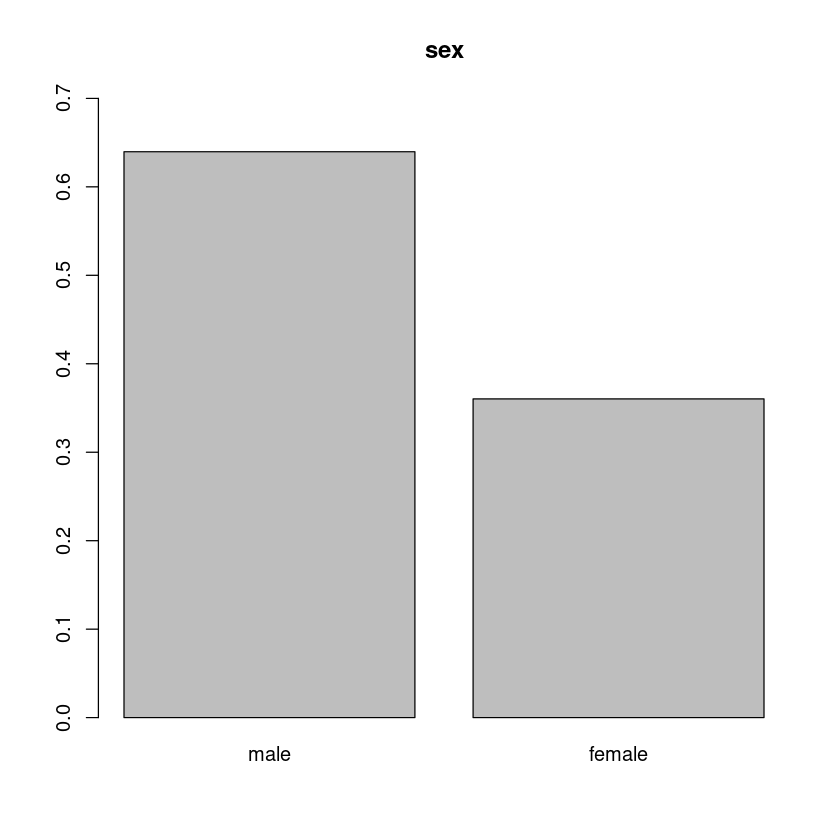

In [5]:
barplot(prop.table(table(data.frame(cd$SEX))), main="sex", names.arg=c("male","female"), ylim=c(0.0,0.7))

### 2) Age

 min Q1 median    Q3 max     mean       sd   n missing
  21 30     38 45.25  49 37.52941 8.611741 136       0


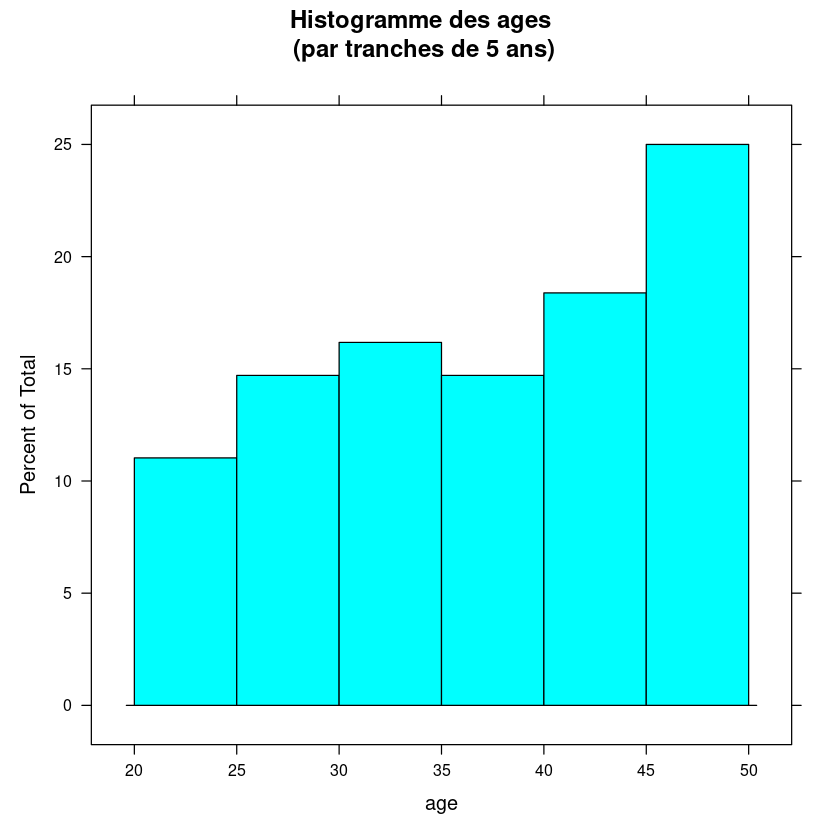

In [6]:
histogram(data.frame(cd$AGE)[,1],main="Histogramme des ages\n (par tranches de 5 ans)", xlab="age",breaks=5)
print(favstats(data.frame(cd$AGE)[,1]))

#Ca va que jusqu'à 50 ans

### 3) Tailles

 min Q1 median Q3 max     mean      sd   n missing
  58 66     68 71  76 68.18478 3.89909 136       0


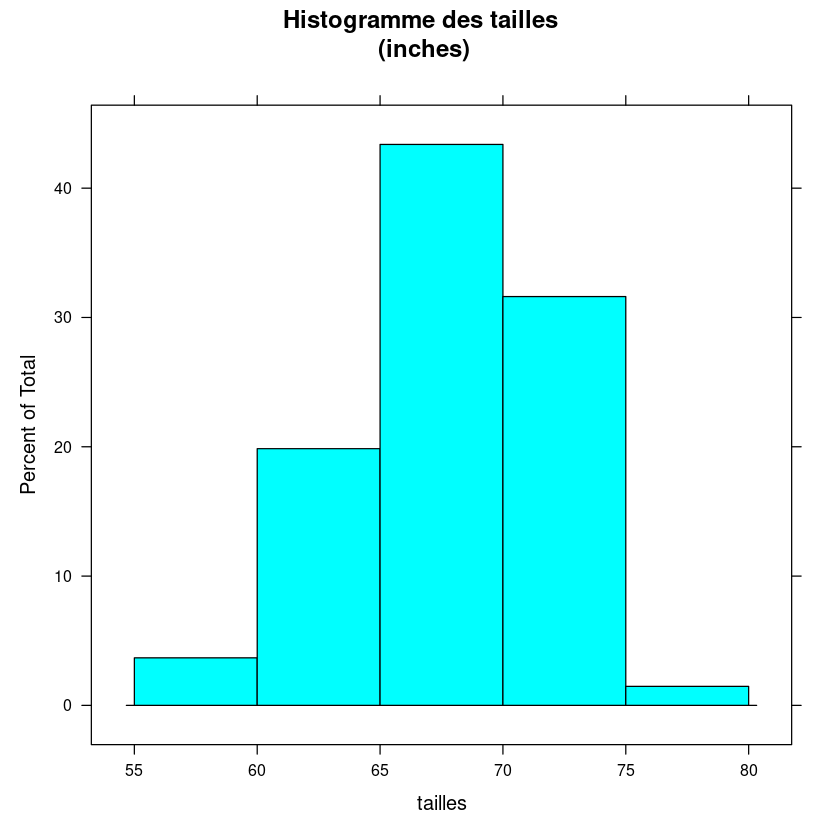

In [7]:
histogram(data.frame(cd$HGHT)[,1],main="Histogramme des tailles\n (inches)", xlab="tailles",breaks=6)
print(favstats(data.frame(cd$HGHT)[,1]))

### 4) Poids

 min     Q1 median     Q3 max     mean       sd   n missing
  92 159.75  184.8 205.25 264 182.9454 33.58838 136       0


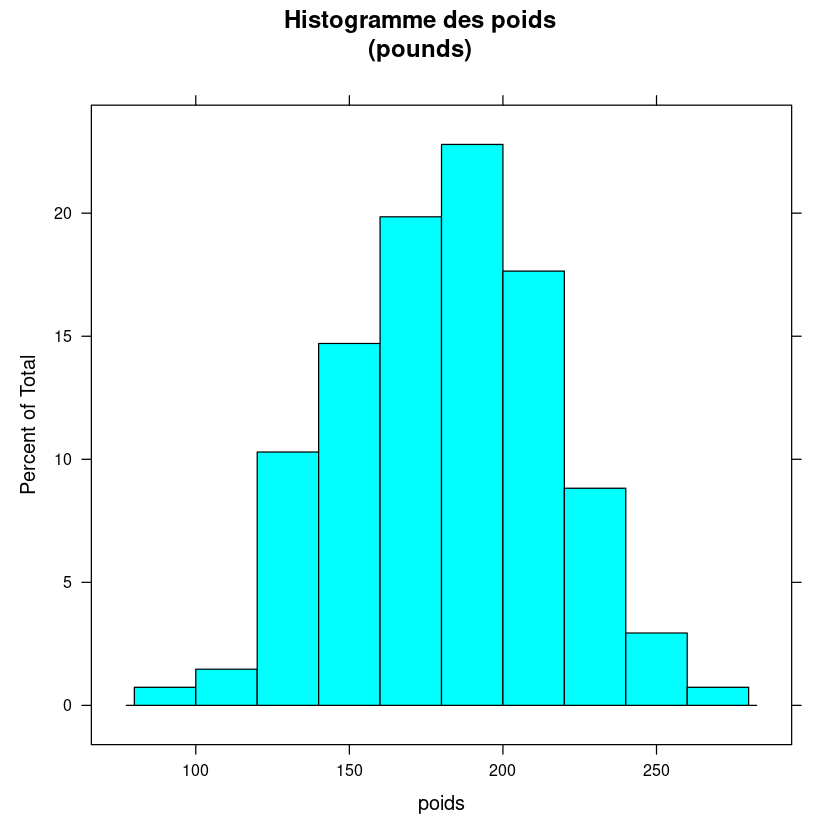

In [8]:
histogram(data.frame(cd$WGHT)[,1],main="Histogramme des poids\n (pounds) ", xlab="poids", breaks=7)
print(favstats(data.frame(cd$WGHT)[,1]))

### 5) Indice de masse corporelle

   min      Q1 median      Q3   max     mean       sd   n missing
 18.58 24.2675  27.75 31.0725 34.86 27.55471 3.925531 136       0


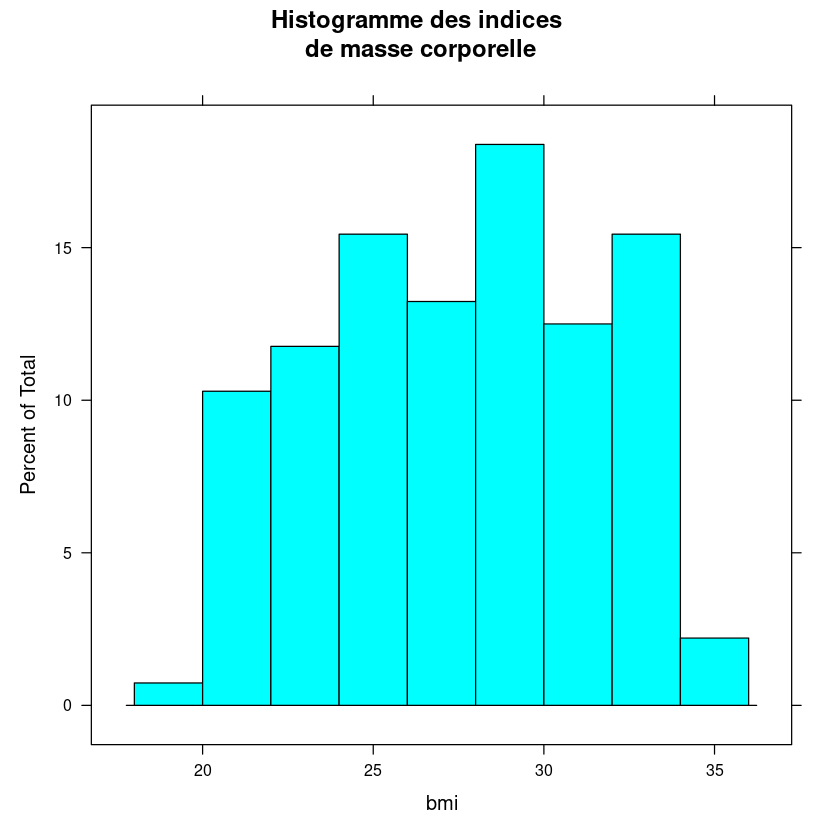

In [9]:
histogram(data.frame(cd$BMI)[,1],main="Histogramme des indices \n de masse corporelle ", xlab="bmi", breaks=6)
print(favstats(data.frame(cd$BMI)[,1]))

### 6) Cohorte

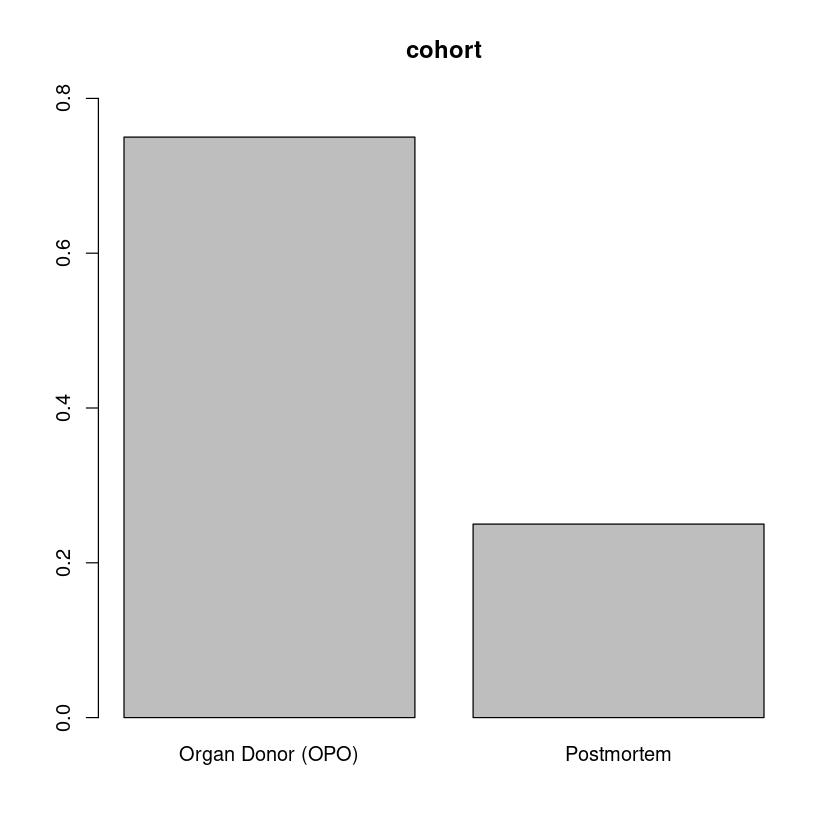

In [12]:
barplot(prop.table(table(data.frame(cd$COHORT))), main="cohort", ylim=c(0.0,0.8))
#Corrélation age - cohorte ?

### 7) Temps ischémique

 min   Q1 median     Q3  max     mean      sd   n missing
  15 61.5    209 474.25 1641 382.5588 411.018 136       0


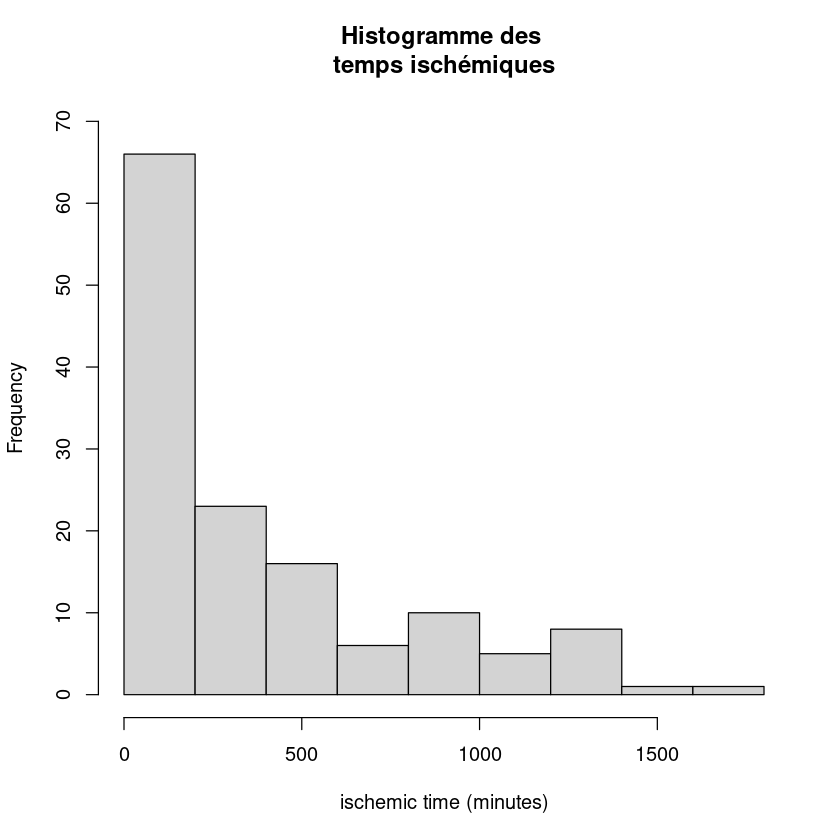

In [14]:
hist(data.frame(cd$TRISCHD)[,1],main="Histogramme des \n temps ischémiques ", xlab="ischemic time (minutes)", ylim=c(0,70))
print(favstats(data.frame(cd$TRISCHD)[,1]))

### 8) Echelle de Hardy

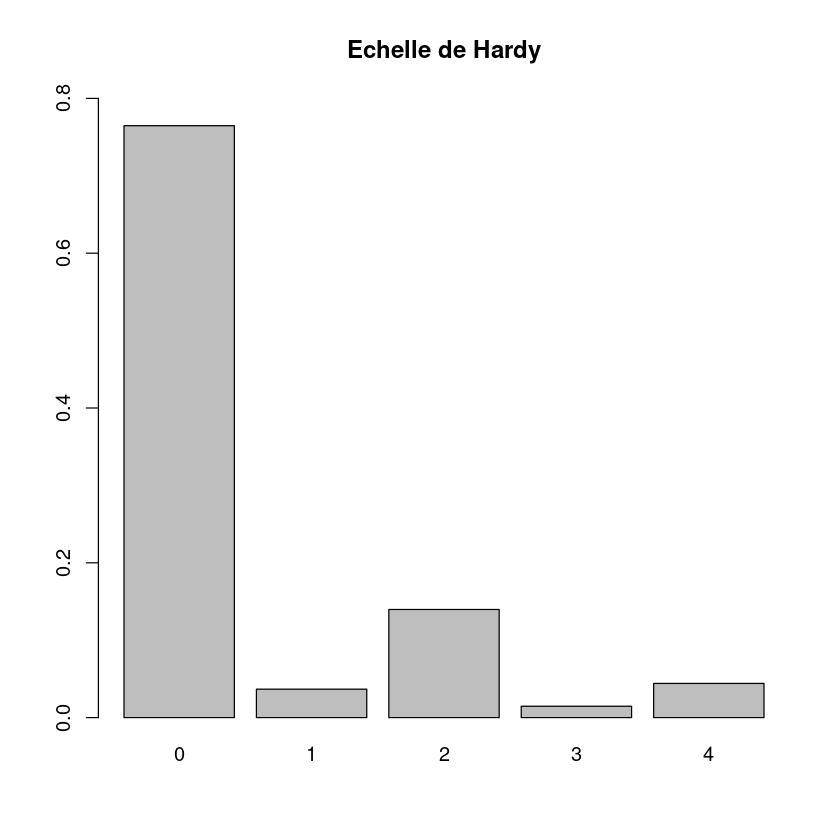

In [15]:
barplot(prop.table(table(data.frame(cd$DTHHRDY))), main="Echelle de Hardy", ylim=c(0.0,0.8))

## 1.2 : Correlation between variables

### Liaisons entre les variables "démographiques"
#### Sexe = variable catégorielle --> comparaison visuelle avec boxplot 

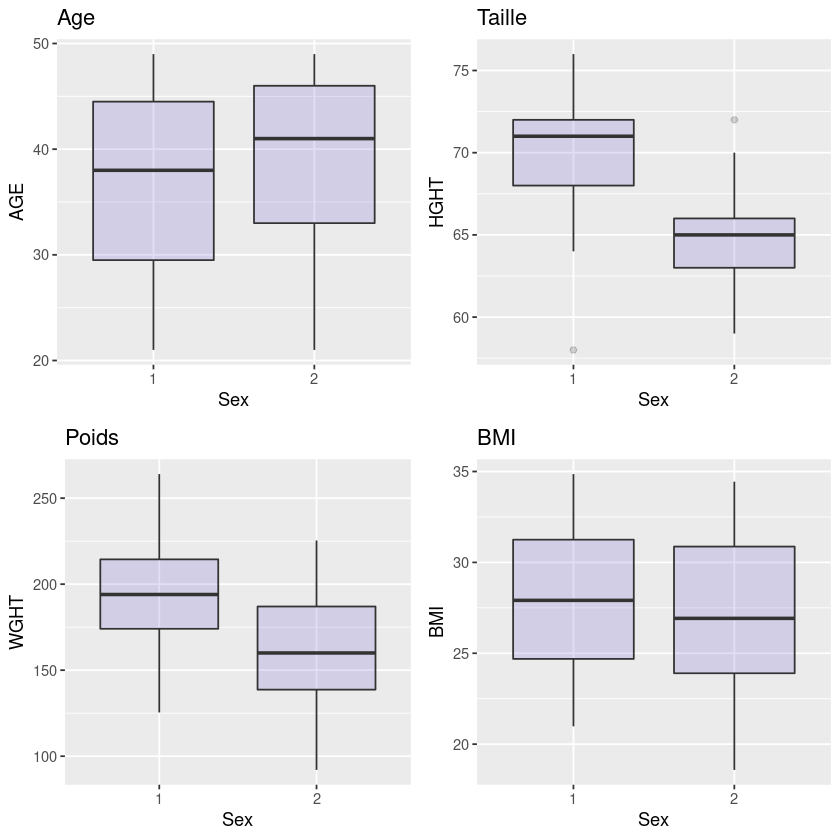

In [16]:
# Boxplots avec les différentes variables en fct de sex
p1 <- ggplot(cd,aes(x=as.factor(SEX), y=AGE)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + ggtitle("Age") + 
    xlab("Sex")
p2 <- ggplot(cd,aes(x=as.factor(SEX), y=HGHT)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Sex") + ggtitle("Taille")

p3 <- ggplot(cd,aes(x=as.factor(SEX), y=WGHT)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Sex") + ggtitle("Poids")
p4 <- ggplot(cd,aes(x=as.factor(SEX), y=BMI)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Sex") + ggtitle("BMI")

grid.arrange(p1,p2,p3,p4, ncol=2)

#### Vérification avec tests de Mann-Whitney

In [17]:
# 2 nouveaux dataframes : hommes et femmes
hommes <- filter(cd, SEX == 1)
femmes <- filter(cd, SEX == 2)

#unpaired two-samples Wilcoxon test =  Wilcoxon rank sum test = Mann-Whitney test
# Calcul des tests de Mann-Whitney pour les différentes variables :

w_age <- wilcox.test(hommes$AGE, femmes$AGE)$p.value
w_hght <- wilcox.test(hommes$HGHT, femmes$HGHT)$p.value
w_wght <- wilcox.test(hommes$WGHT, femmes$WGHT)$p.value
w_bmi <- wilcox.test(hommes$BMI, femmes$BMI)$p.value

print(paste('p-value for age : ', toString(w_age)))
print(paste('p-value for hght : ', toString(w_hght)))
print(paste('p-value for wght : ', toString(w_wght)))
print(paste('p-value for bmi : ', toString(w_bmi)))


## On constate que les variables du poids et de la taille ne sont clairement pas indépendante du sexe, mais on ne peut pas 
## tirer cette conclusion pour l'age et l'indice de masse corporelle, ce qui correspond à ce qu'on observait sur les boxplots

[1] "p-value for age :  0.131321452047474"
[1] "p-value for hght :  3.51914176038072e-16"
[1] "p-value for wght :  1.48960430486491e-07"
[1] "p-value for bmi :  0.377965307143104"


#### Comparaison des variables numériques (age, taille, poids, bmi)

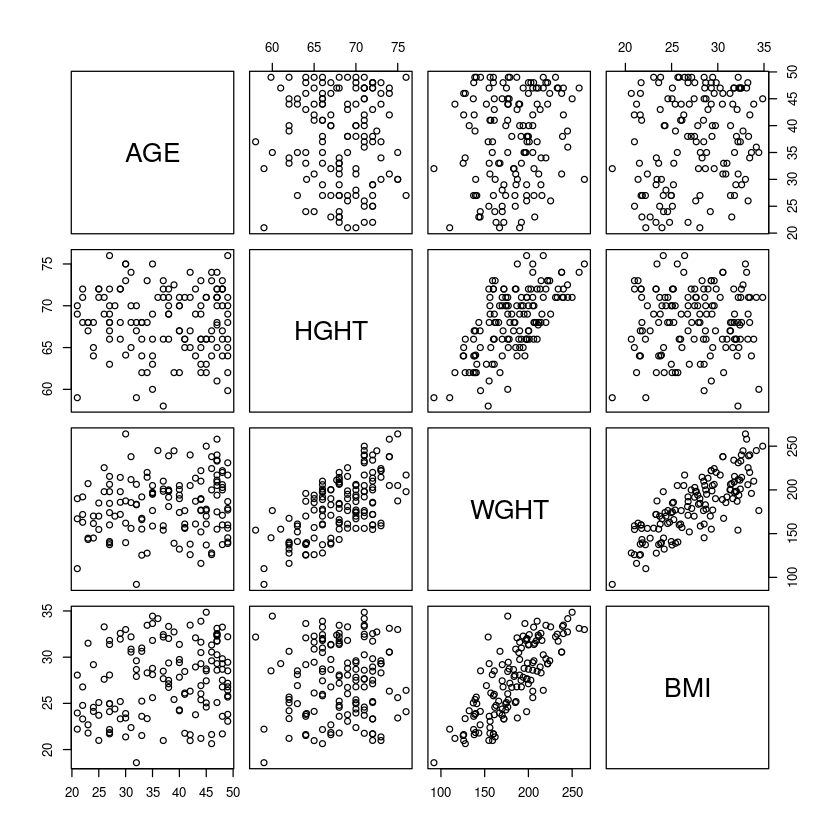

In [18]:
pairs(cd[3:6])
## On observe des corrélations entre la taille et le poids, et entre le poids et le bmi

In [19]:
corr = cor(cd[3:6])
corr

AGE         HGHT        WGHT      BMI       
AGE   1.00000000 -0.03838808 0.1527637 0.21438471
HGHT -0.03838808  1.00000000 0.6391171 0.04597517
WGHT  0.15276366  0.63911706 1.0000000 0.79163615
BMI   0.21438471  0.04597517 0.7916362 1.00000000

### Liaisons des variables techniques avec les variables démographiques
#### Cohorte : 

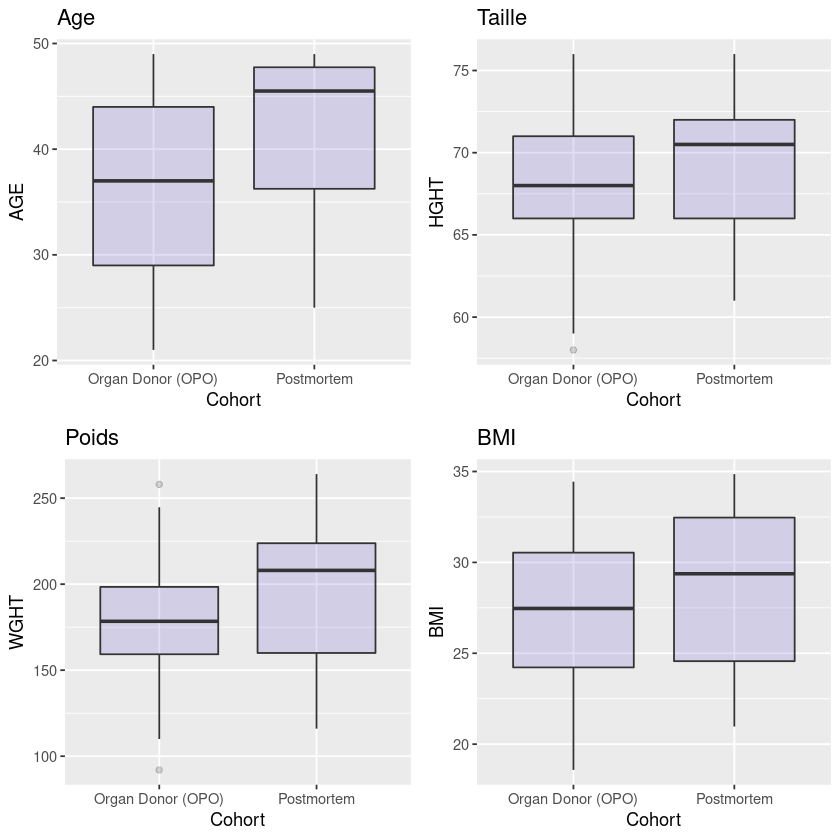

In [20]:
# Boxplots avec les différentes variables en fct de cohort
p1 <- ggplot(cd,aes(x=as.factor(COHORT), y=AGE)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + ggtitle("Age") + 
    xlab("Cohort")
p2 <- ggplot(cd,aes(x=as.factor(COHORT), y=HGHT)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Cohort") + ggtitle("Taille")

p3 <- ggplot(cd,aes(x=as.factor(COHORT), y=WGHT)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Cohort") + ggtitle("Poids")
p4 <- ggplot(cd,aes(x=as.factor(COHORT), y=BMI)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Cohort") + ggtitle("BMI")

grid.arrange(p1,p2,p3,p4, ncol=2)

In [21]:
# 2 nouveaux dataframes : organ donors et postmortems
od <- filter(cd, COHORT == 'Organ Donor (OPO)')
pm <- filter(cd, COHORT == 'Postmortem')

#unpaired two-samples Wilcoxon test =  Wilcoxon rank sum test = Mann-Whitney test
# Calcul des tests de Mann-Whitney pour les différentes variables :

w_age <- wilcox.test(od$AGE, pm$AGE)$p.value
w_hght <- wilcox.test(od$HGHT, pm$HGHT)$p.value
w_wght <- wilcox.test(od$WGHT, pm$WGHT)$p.value
w_bmi <- wilcox.test(od$BMI, pm$BMI)$p.value

print(paste('p-value for age : ', toString(w_age)))
print(paste('p-value for hght : ', toString(w_hght)))
print(paste('p-value for wght : ', toString(w_wght)))
print(paste('p-value for bmi : ', toString(w_bmi)))

## On voit ici que comme suggéré par les boxplots, les 2 cohortes représentent 2 populations qui sont 
## significativement différentes relativement aux paramètres de l'age et du poids

[1] "p-value for age :  0.000715351356559735"
[1] "p-value for hght :  0.0793189642162195"
[1] "p-value for wght :  0.0113078041343223"
[1] "p-value for bmi :  0.105604145672584"


In [22]:
table(cd$COHORT,cd$SEX)
prop.table(table(cd$COHORT,cd$SEX))

                   
                     1  2
  Organ Donor (OPO) 66 36
  Postmortem        21 13

                   
                             1          2
  Organ Donor (OPO) 0.48529412 0.26470588
  Postmortem        0.15441176 0.09558824

In [23]:
fisher.test(cd$COHORT,cd$SEX)
#p-value > 0.05 --> on ne peut pas rejeter l'hypothèse d'indépendance des variables


	Fisher's Exact Test for Count Data

data:  cd$COHORT and cd$SEX
p-value = 0.8373
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.4633356 2.7041048
sample estimates:
odds ratio 
  1.133851 


#### Echelle de Hardy

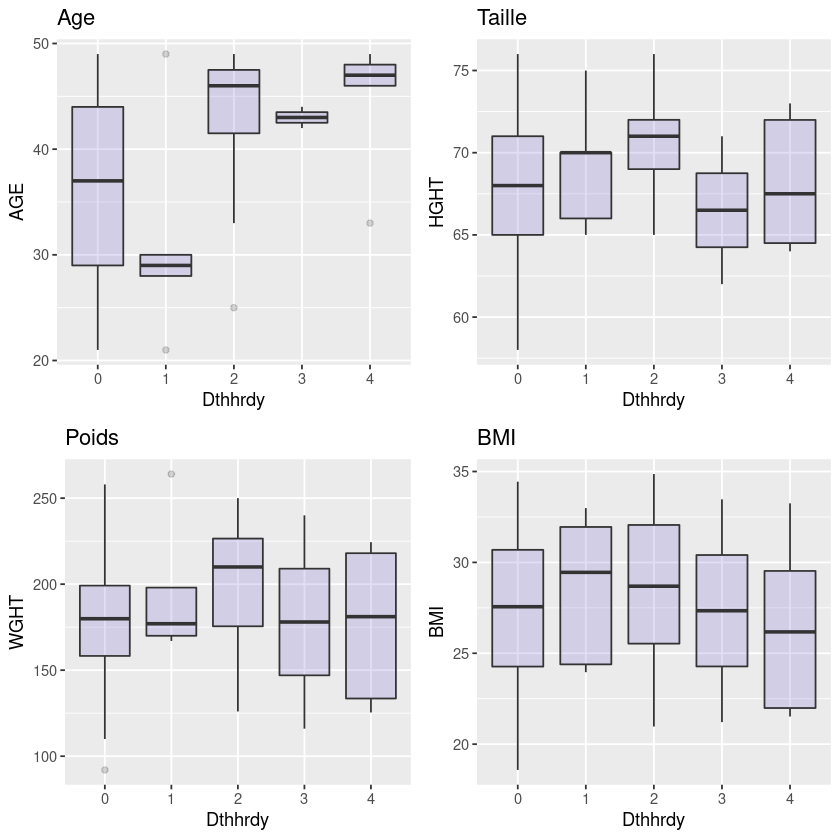

In [24]:
# Boxplots avec les différentes variables en fct de sex
p1 <- ggplot(cd,aes(x=as.factor(DTHHRDY), y=AGE)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + ggtitle("Age") + 
    xlab("Dthhrdy")
p2 <- ggplot(cd,aes(x=as.factor(DTHHRDY), y=HGHT)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Dthhrdy") + ggtitle("Taille")

p3 <- ggplot(cd,aes(x=as.factor(DTHHRDY), y=WGHT)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Dthhrdy") + ggtitle("Poids")
p4 <- ggplot(cd,aes(x=as.factor(DTHHRDY), y=BMI)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Dthhrdy") + ggtitle("BMI")

grid.arrange(p1,p2,p3,p4, ncol=2)

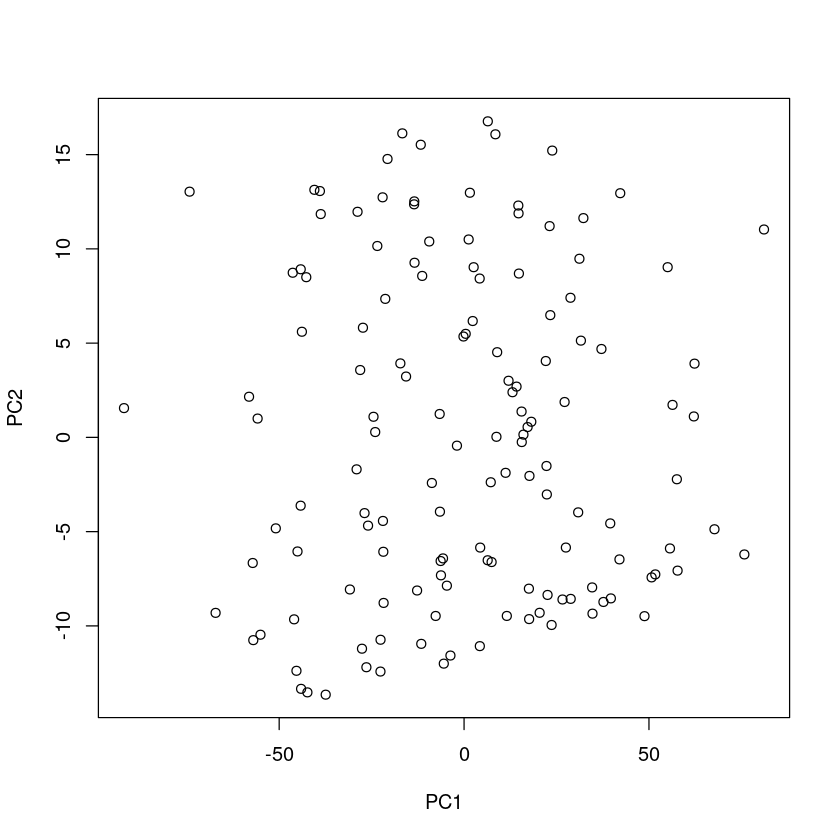

In [25]:
pca = prcomp(cd[3:6])
plot(pca$x[, 1:2])

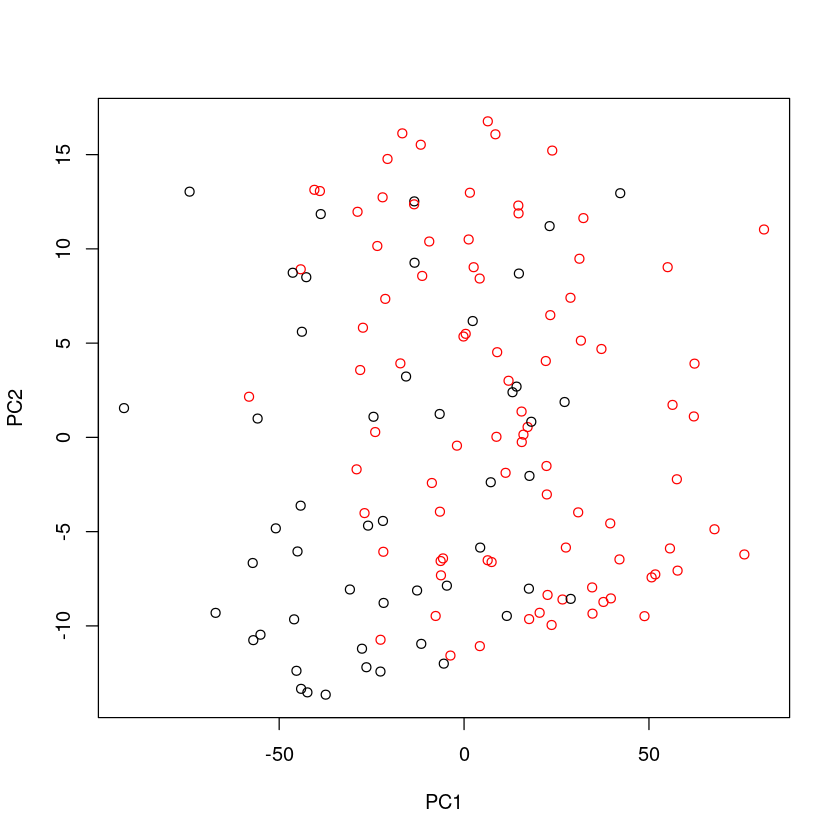

In [26]:
colors <- rep("black", 136)
colors[cd$SEX == 1] <- "red"
plot(pca$x[, 1:2], col=colors)

## Confounding variables

In [27]:
colors<-rep("black", 136)
colors[cd$COHORT=="Postmortem"] <- "red"

In [28]:
shapes = c(1, 3) 
shapes<-shapes[as.numeric(cd$SEX)]

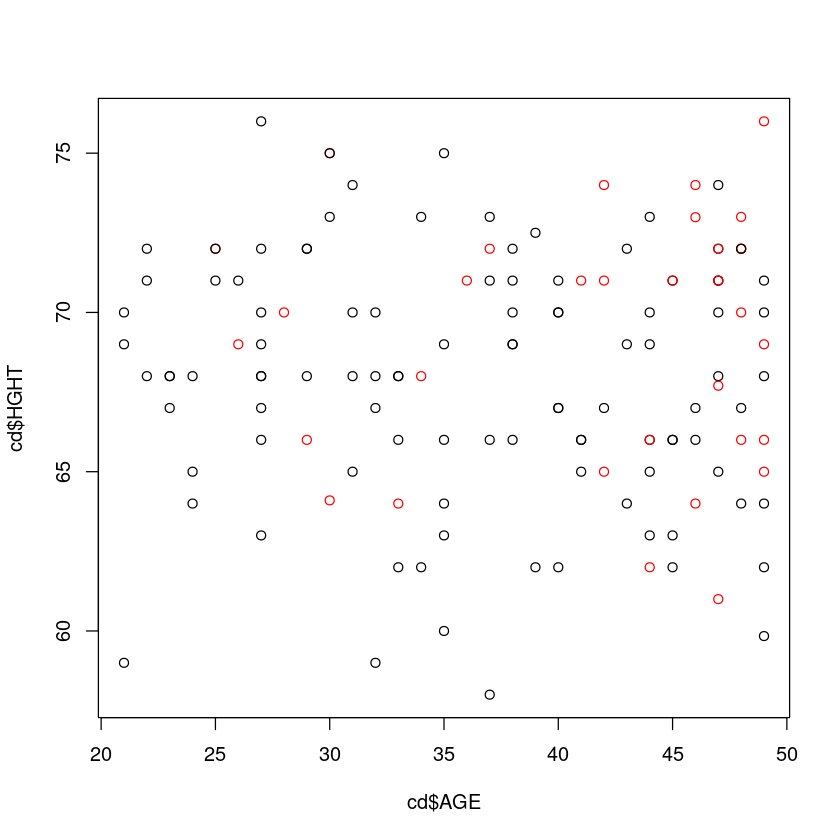

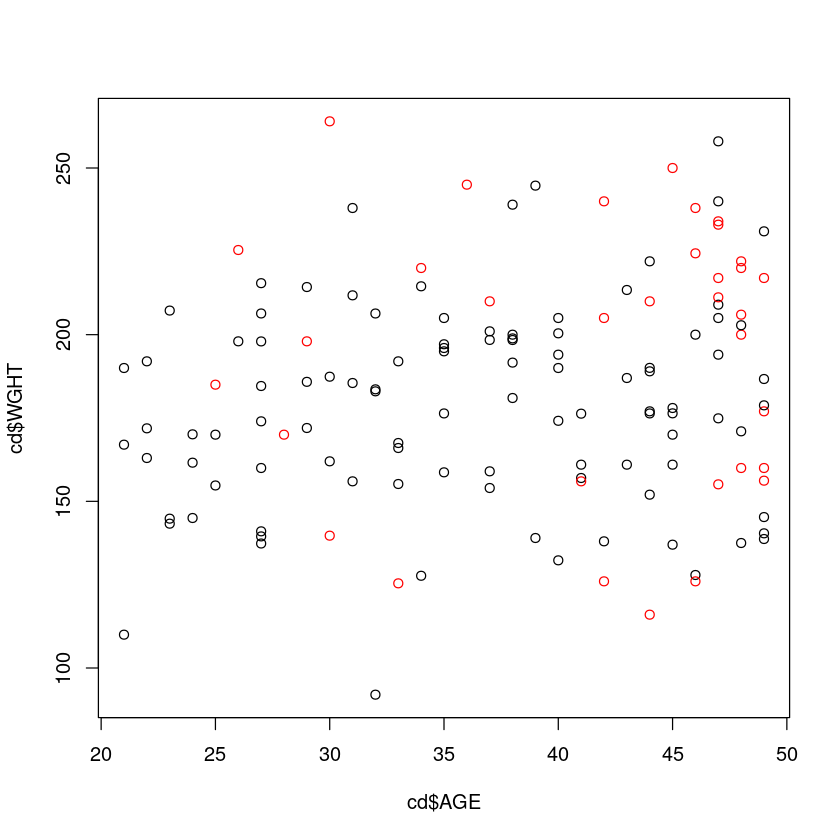

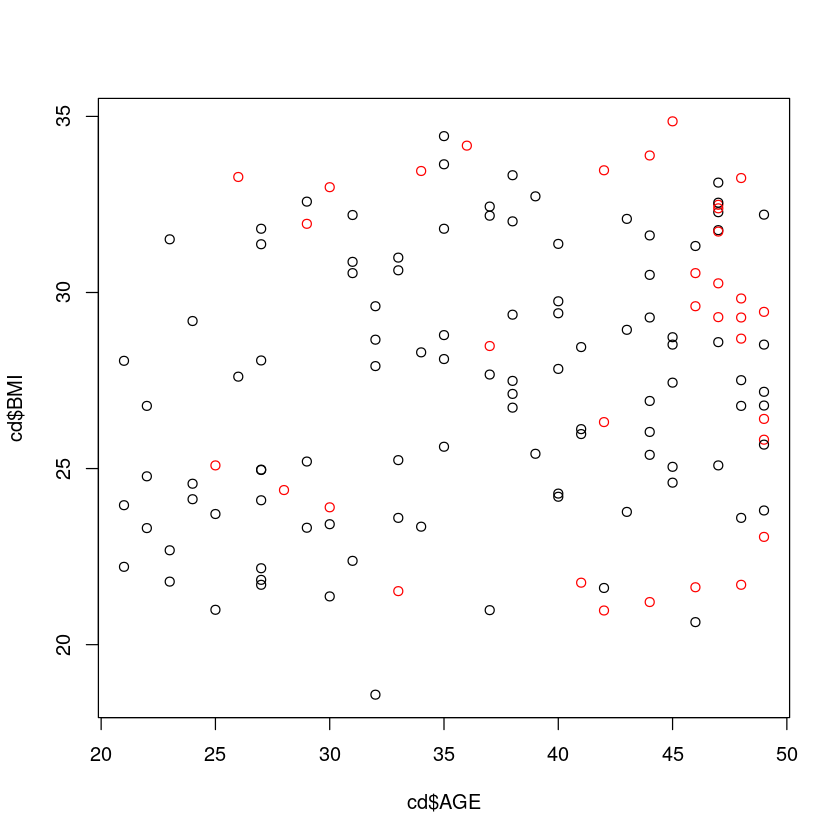

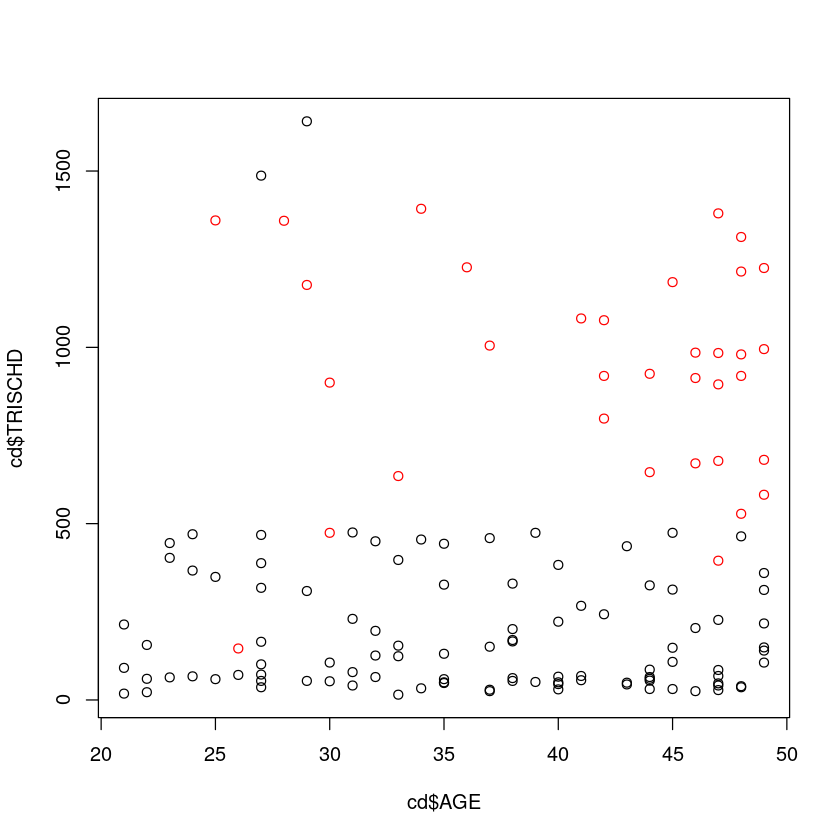

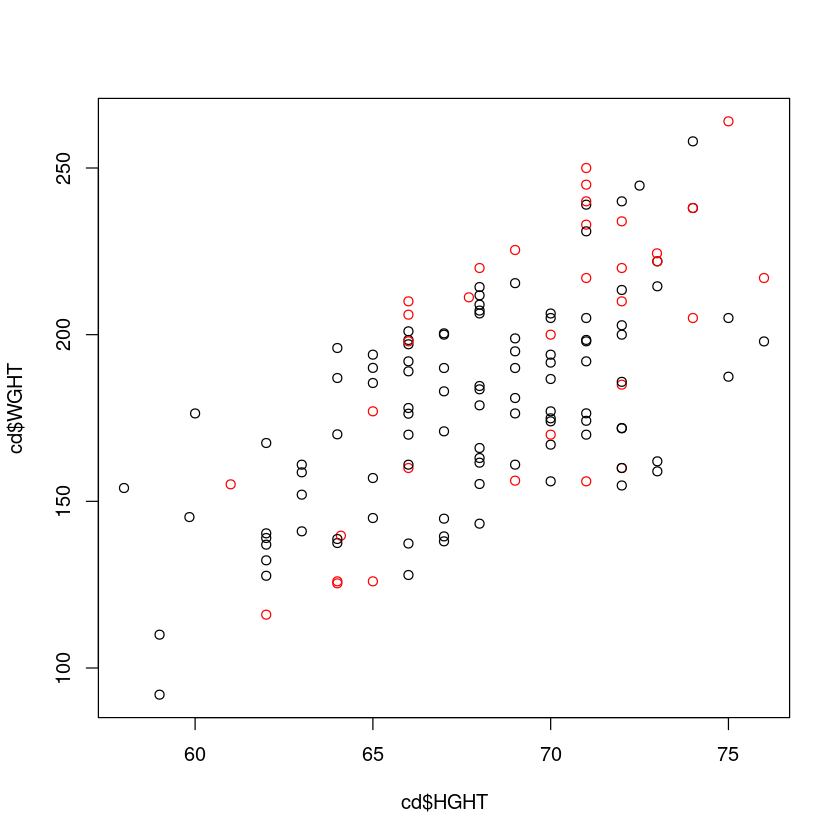

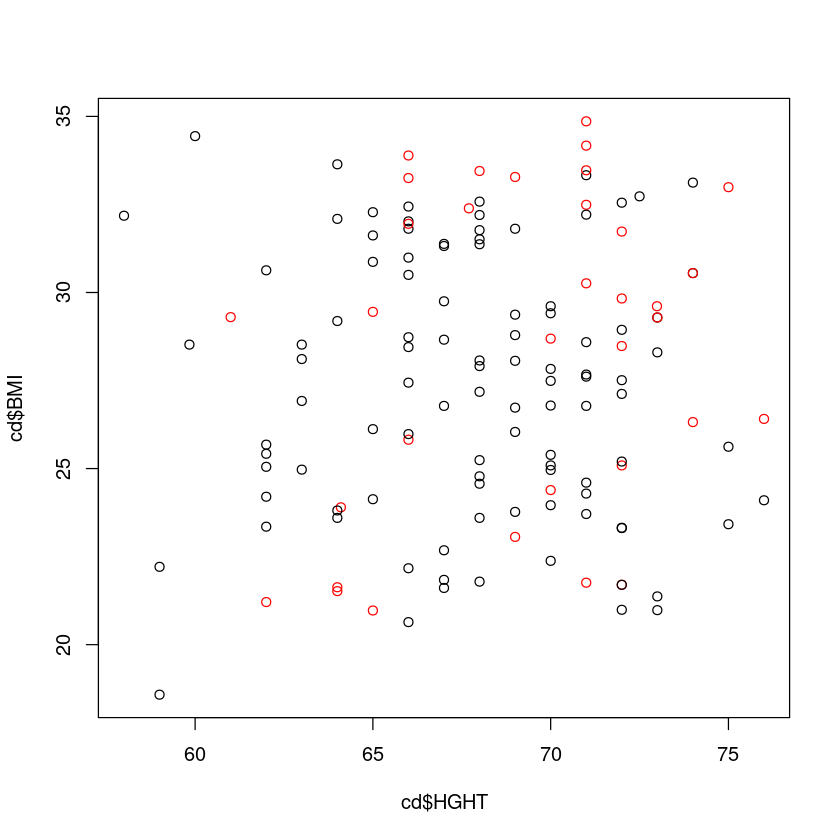

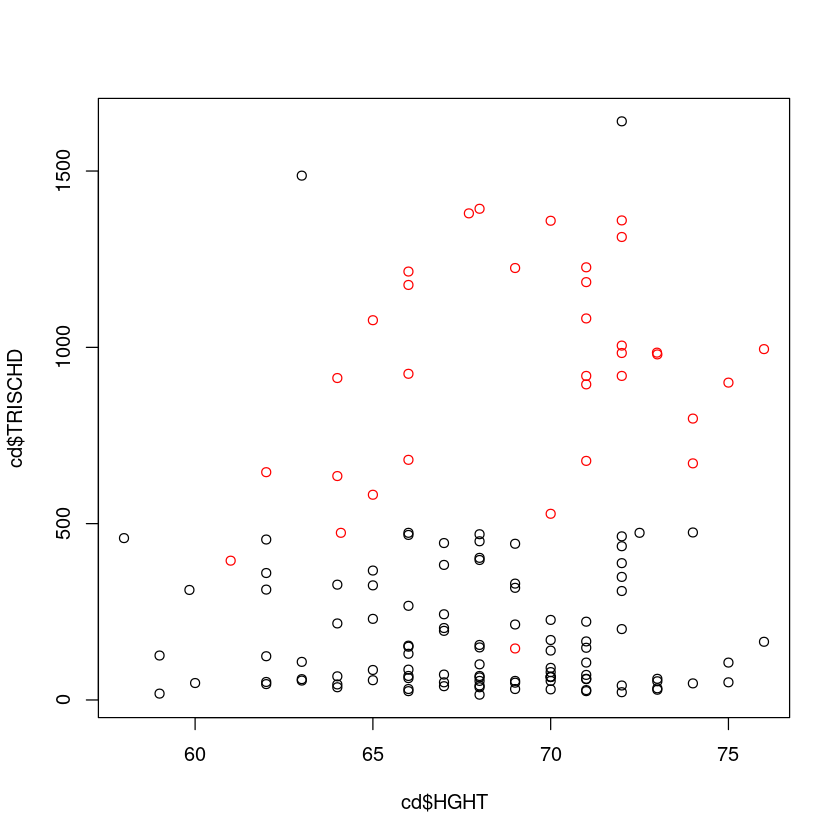

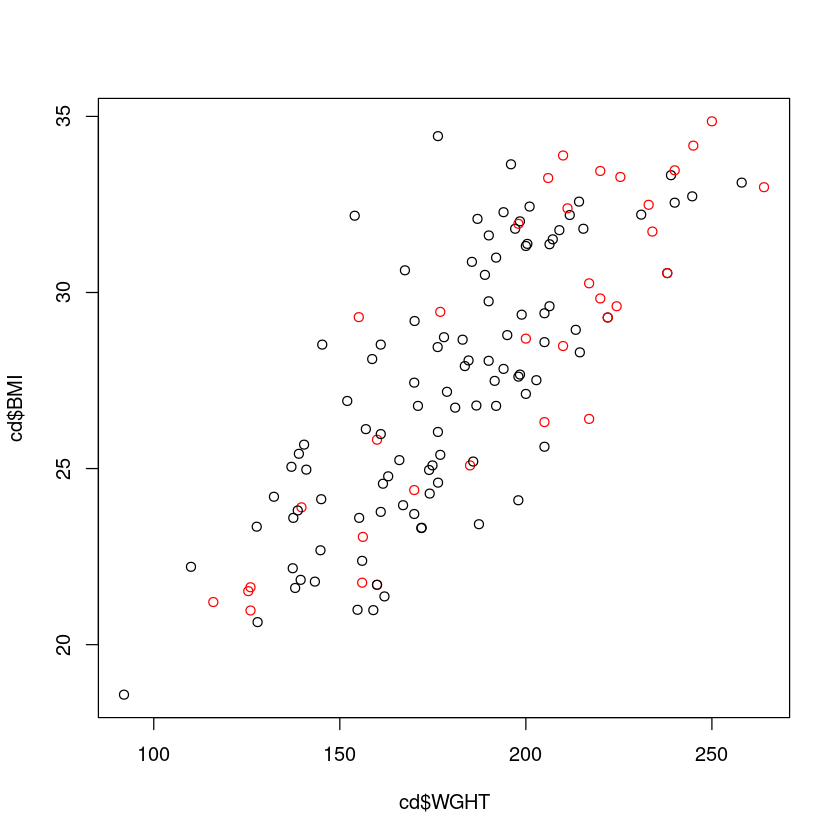

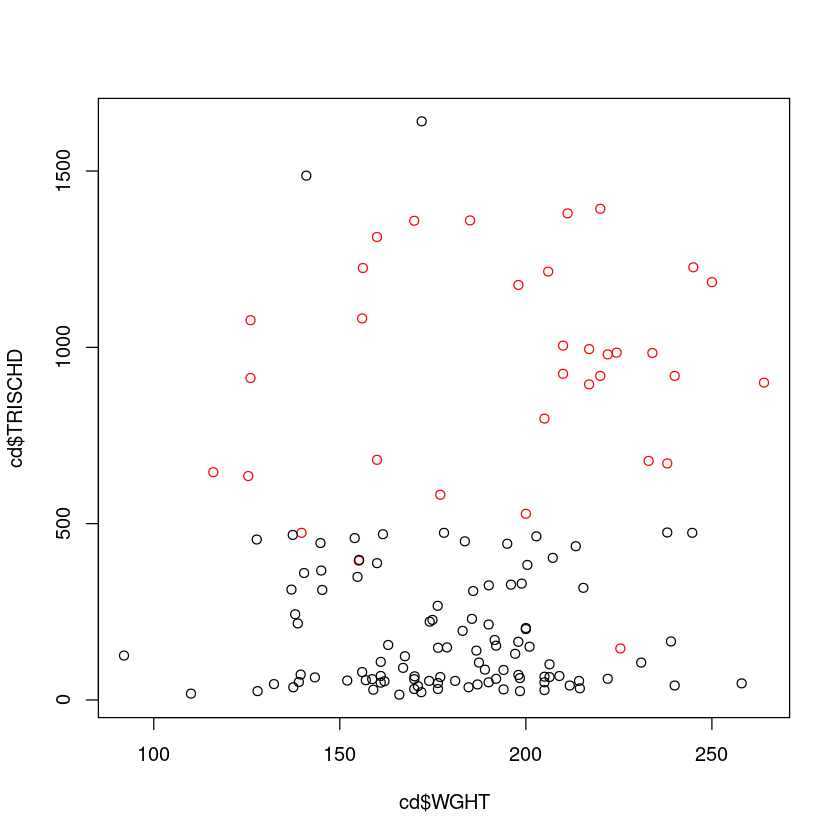

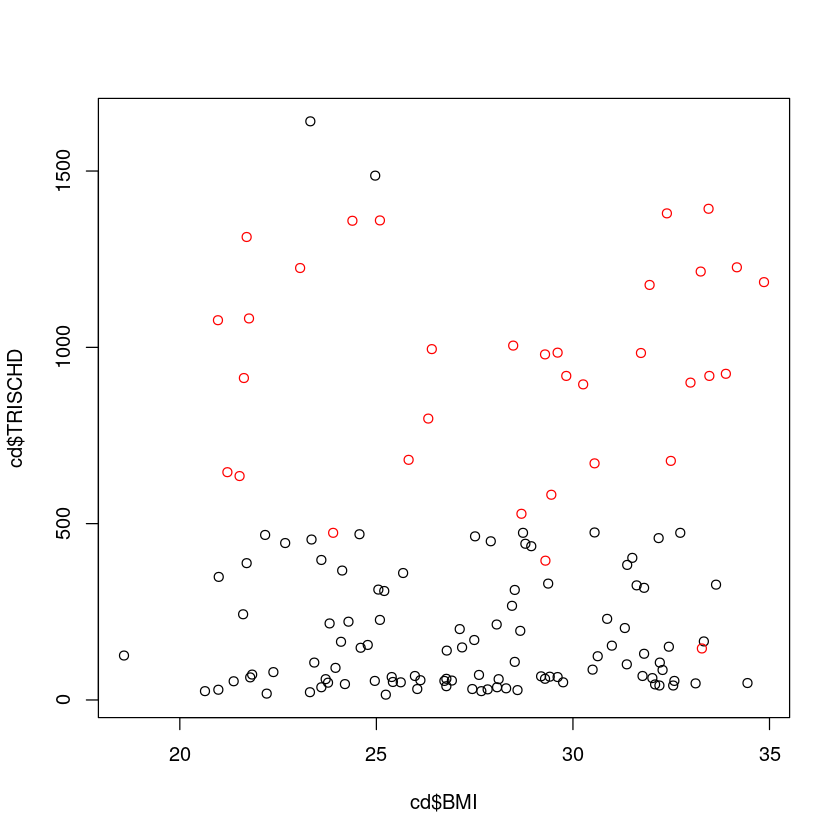

In [29]:
## Noir = Organ Donor, Rouge = Postmortem
## Rond = Homme, Croix = Femme
q1<-plot(cd$AGE, cd$HGHT, col=colors)#, pch=shapes)
q2<-plot(cd$AGE, cd$WGHT, col=colors)#, pch=shapes)
q3<-plot(cd$AGE, cd$BMI, col=colors)#, pch=shapes)
q4<-plot(cd$AGE, cd$TRISCHD, col=colors)#, pch=shapes)
q5<-plot(cd$HGHT, cd$WGHT, col=colors)#, pch=shapes)
q6<-plot(cd$HGHT, cd$BMI, col=colors)#, pch=shapes)
q7<-plot(cd$HGHT, cd$TRISCHD, col=colors)#, pch=shapes)
q8<-plot(cd$WGHT, cd$BMI, col=colors)#, pch=shapes)
q9<-plot(cd$WGHT, cd$TRISCHD, col=colors)#, pch=shapes)
q10<-plot(cd$BMI, cd$TRISCHD, col=colors)#, pch=shapes)


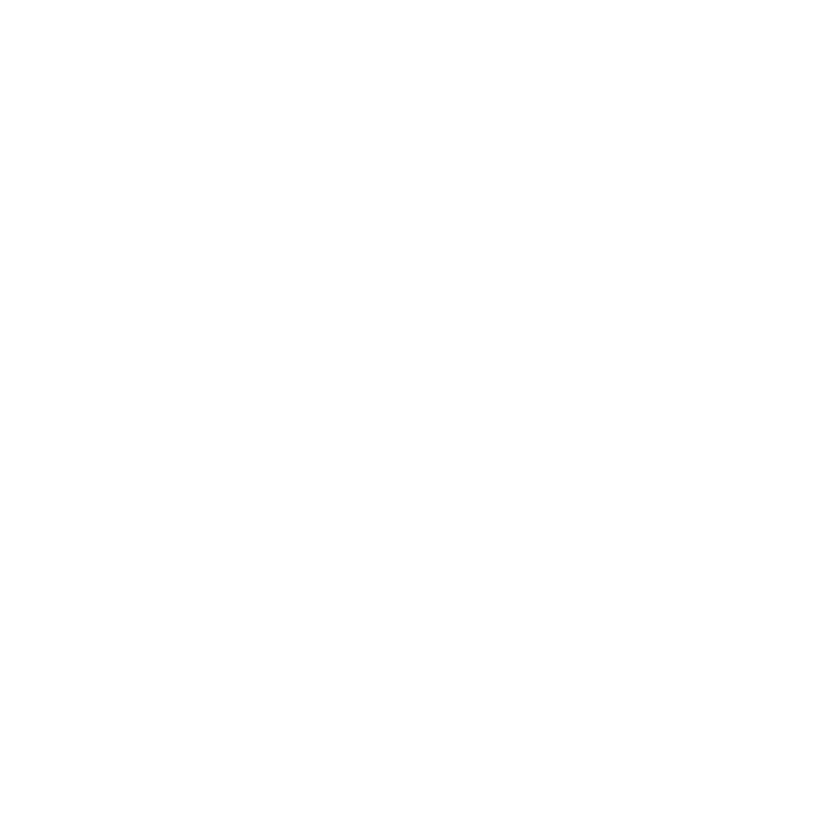

In [30]:
g<-grid.arrange(grob(q1,q2,q3,q4,q5,q6,q7,q8,q9,q10), ncol=5)

In [36]:
clrs = c("black","red","red","red","red")
clrs<-clrs[as.numeric(cd$DTHHRDY)]

In [37]:
shapes = c(1, 3) 
shapes<-shapes[as.numeric(cd$SEX)]

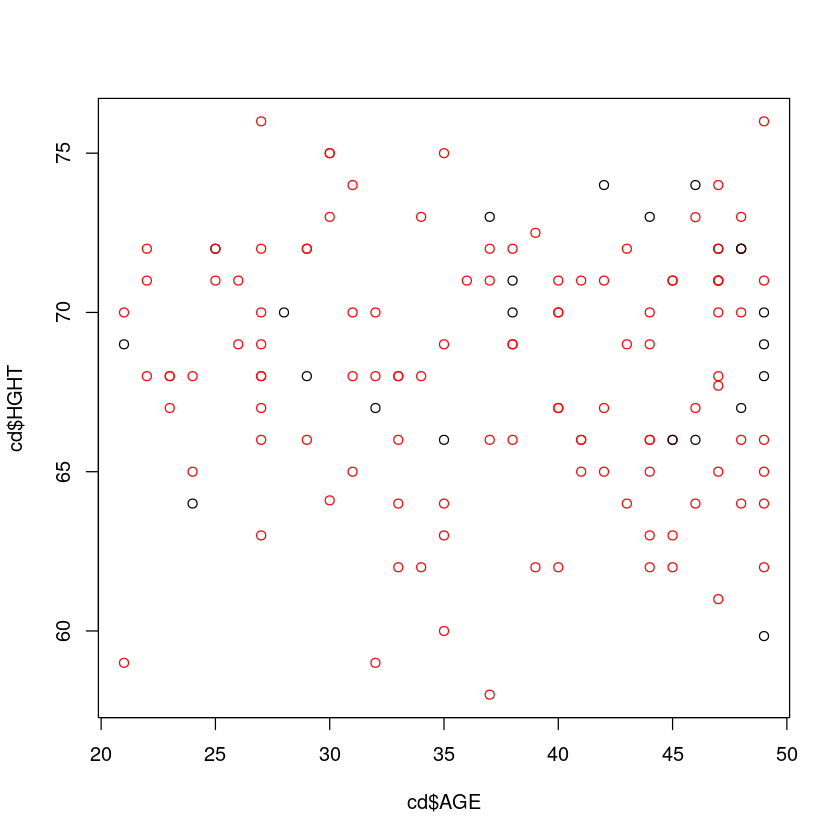

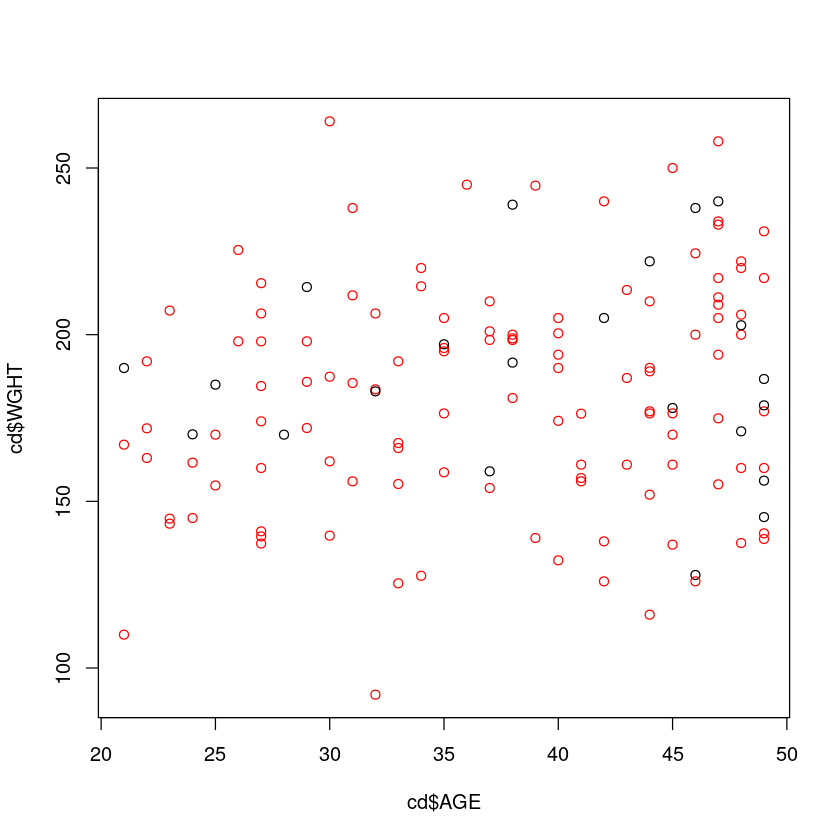

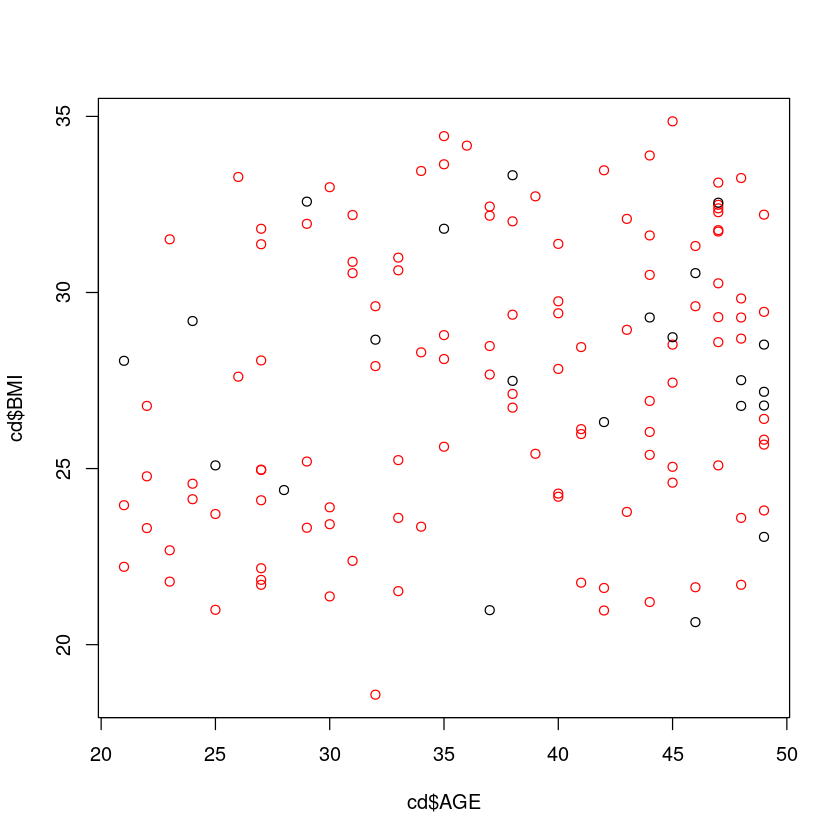

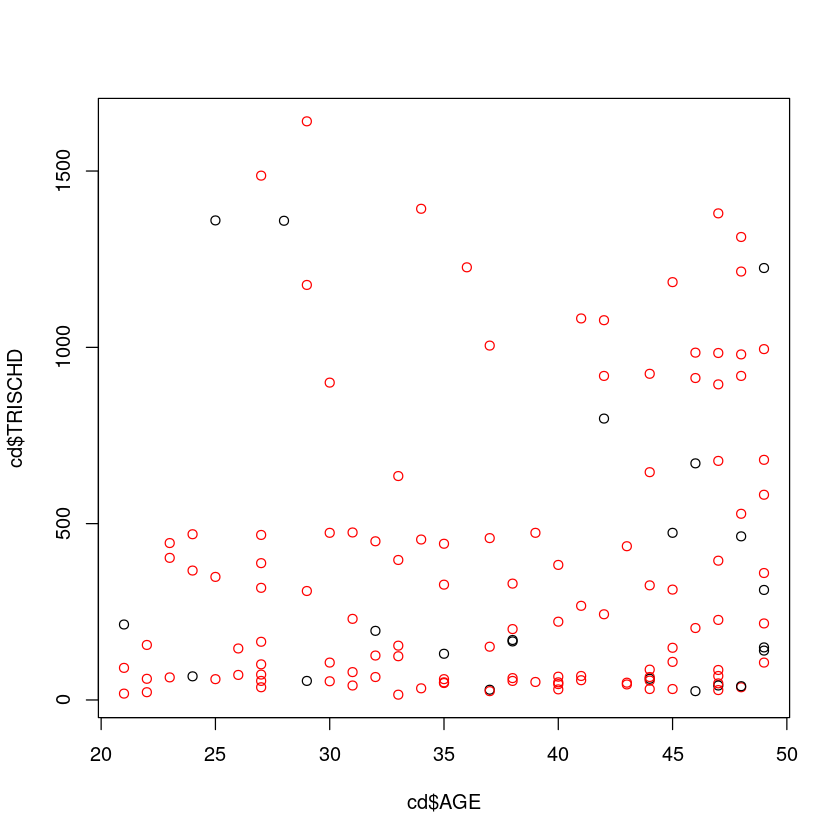

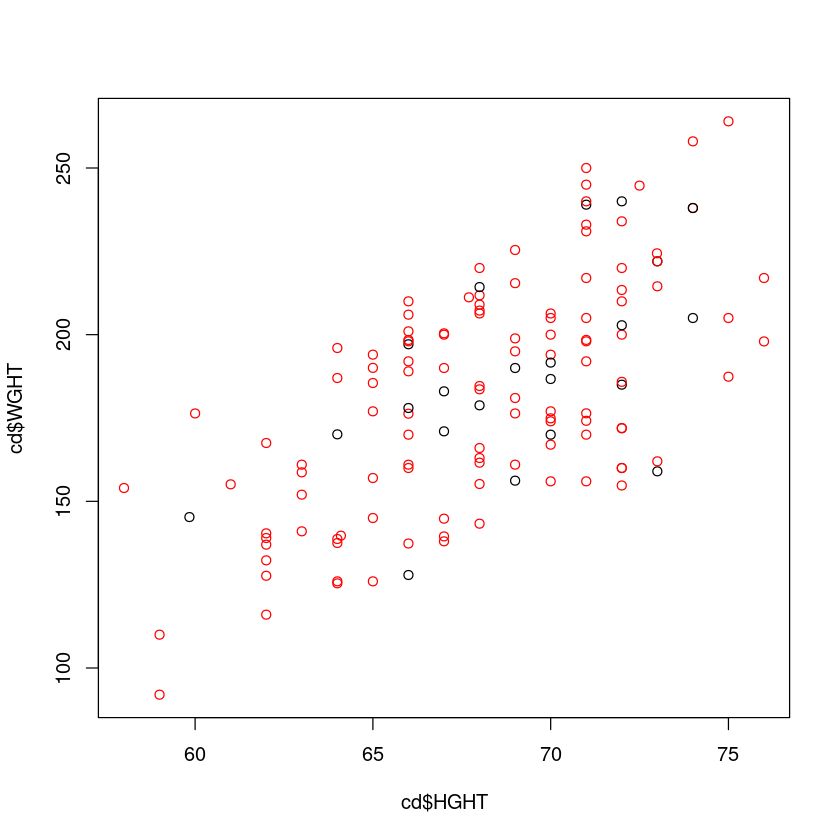

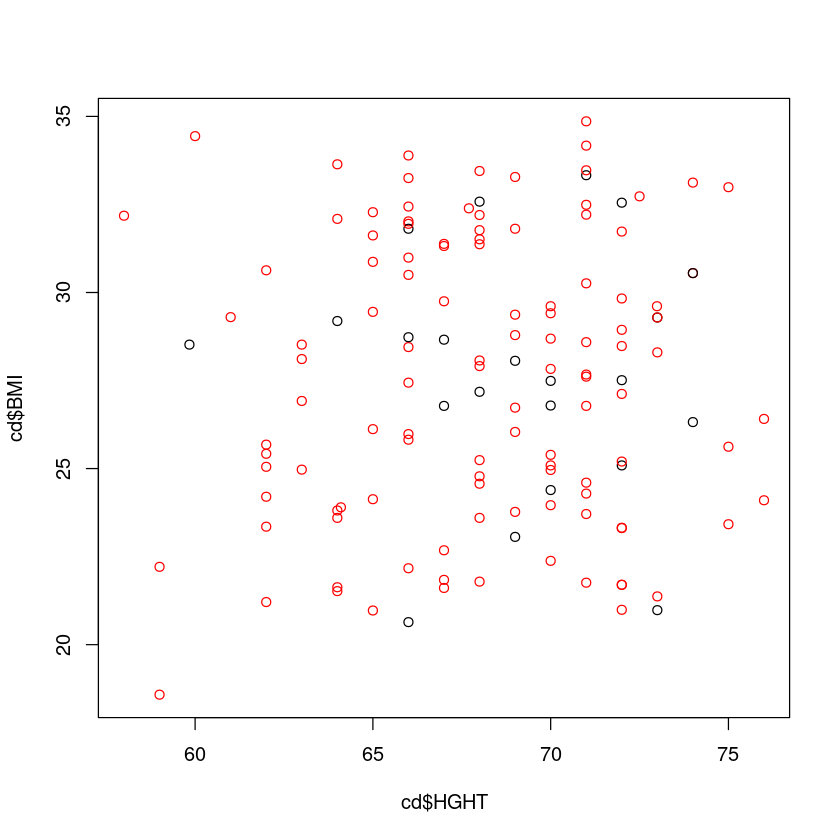

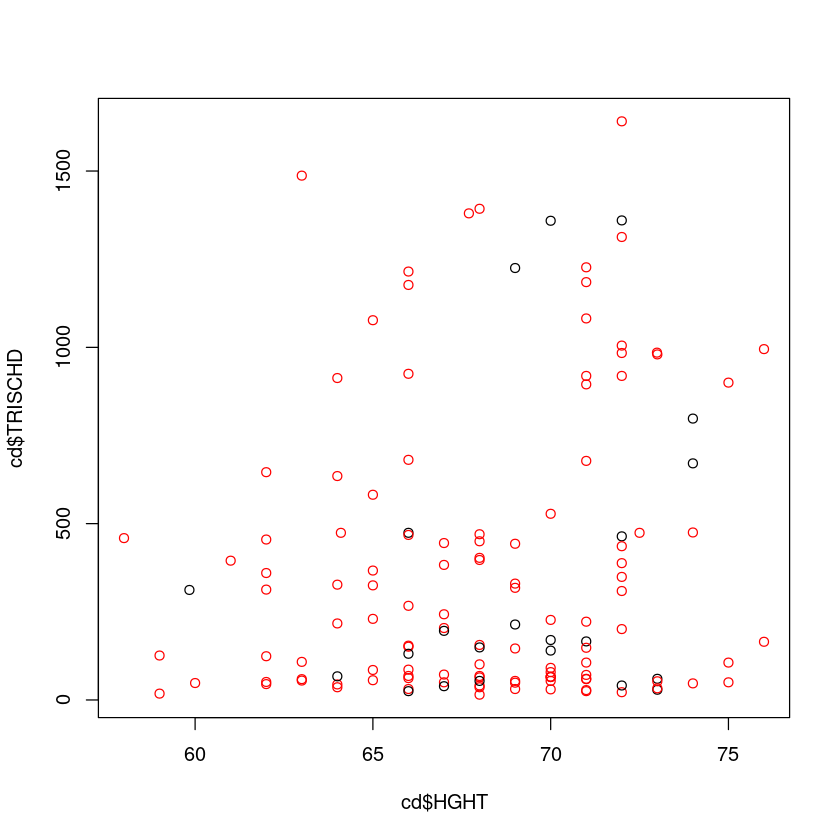

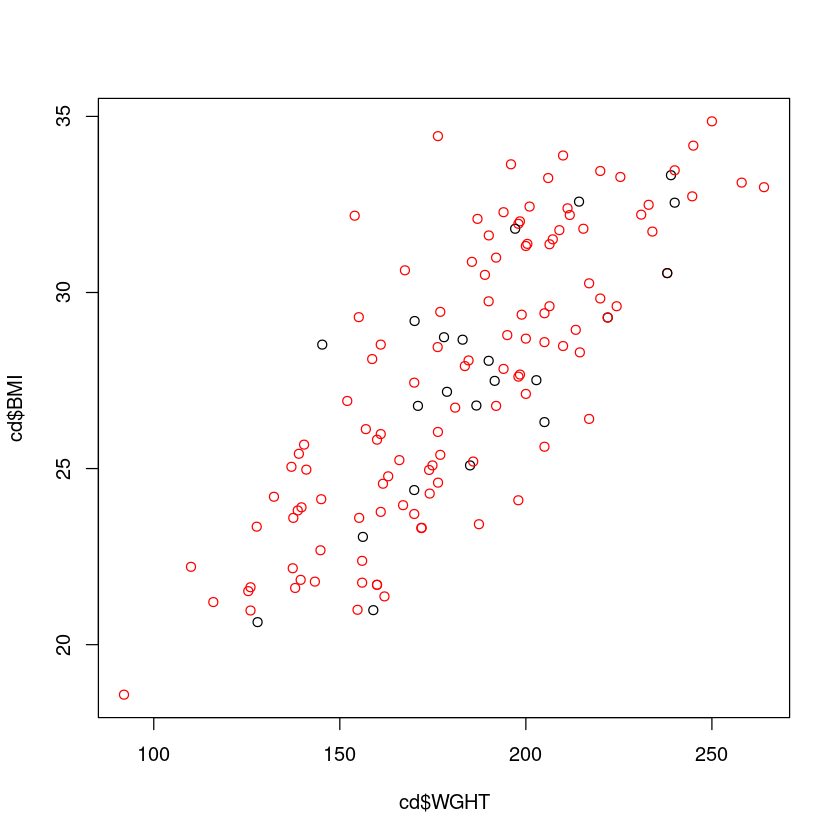

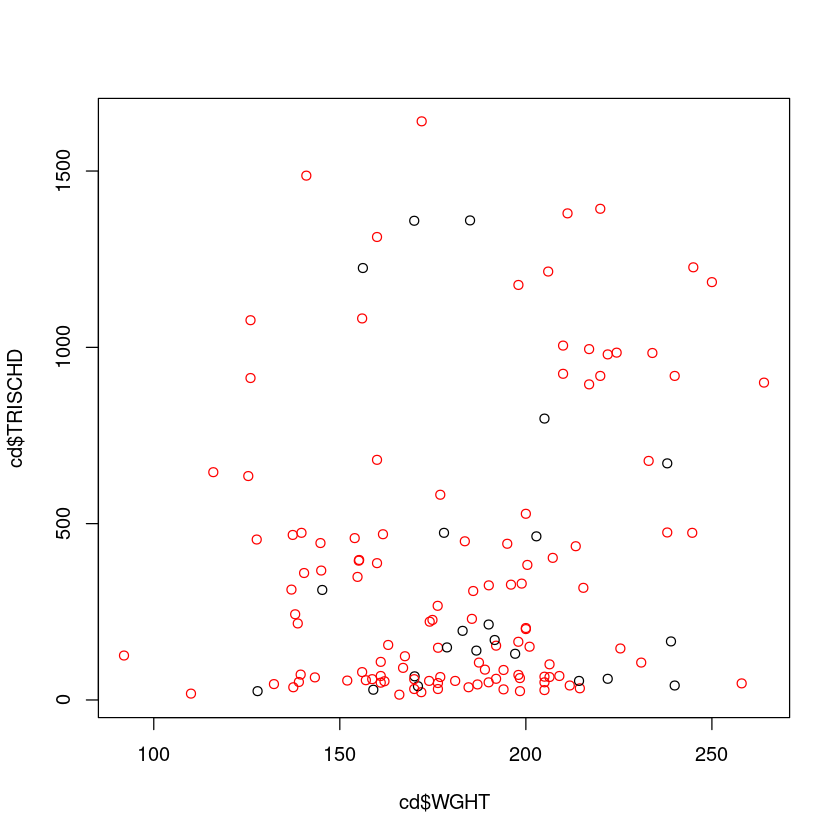

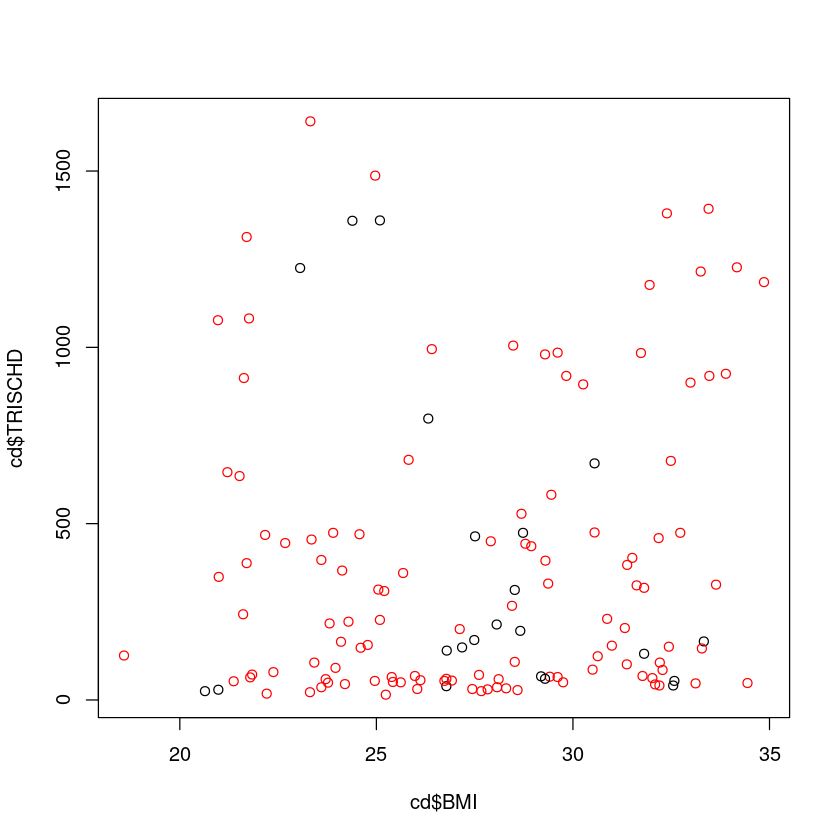

In [38]:
s1<-plot(cd$AGE, cd$HGHT, col=clrs)#, pch=shapes)
s2<-plot(cd$AGE, cd$WGHT, col=clrs)#, pch=shapes)
s3<-plot(cd$AGE, cd$BMI, col=clrs)#, pch=shapes)
s4<-plot(cd$AGE, cd$TRISCHD, col=clrs)#, pch=shapes)
s5<-plot(cd$HGHT, cd$WGHT, col=clrs)#, pch=shapes)
s6<-plot(cd$HGHT, cd$BMI, col=clrs)#, pch=shapes)
s7<-plot(cd$HGHT, cd$TRISCHD, col=clrs)#, pch=shapes)
s8<-plot(cd$WGHT, cd$BMI, col=clrs)#, pch=shapes)
s9<-plot(cd$WGHT, cd$TRISCHD, col=clrs)#, pch=shapes)
s10<-plot(cd$BMI, cd$TRISCHD, col=clrs)#, pch=shapes)


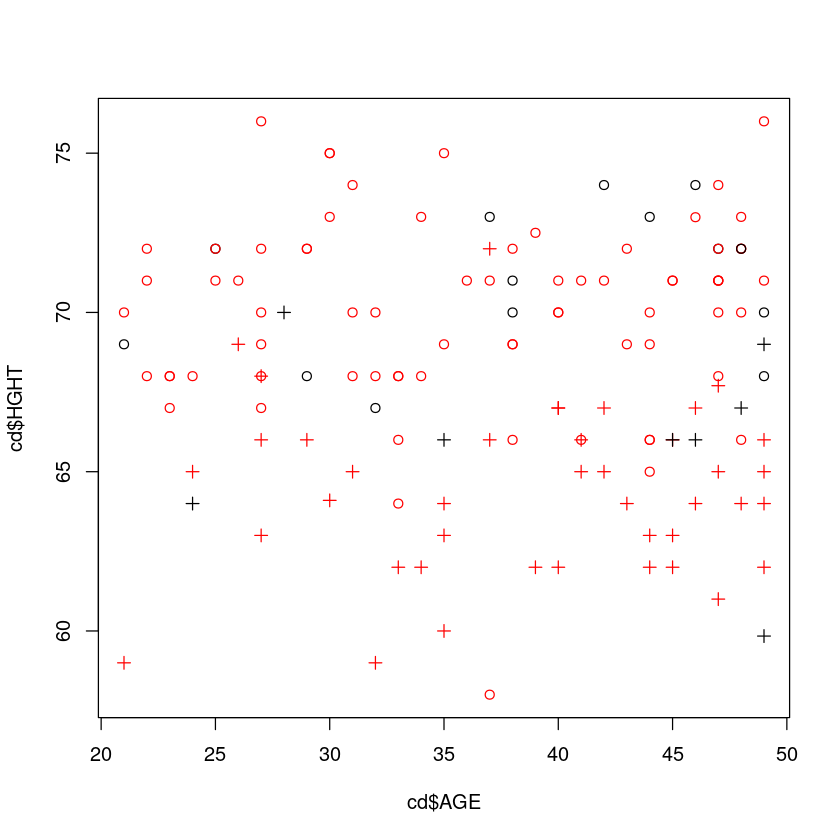

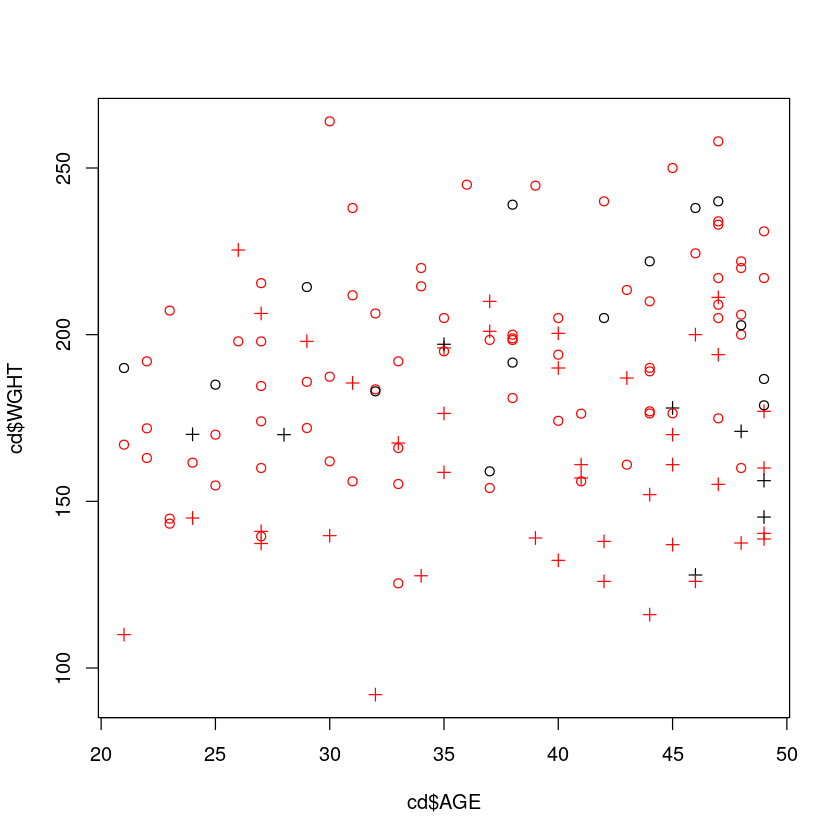

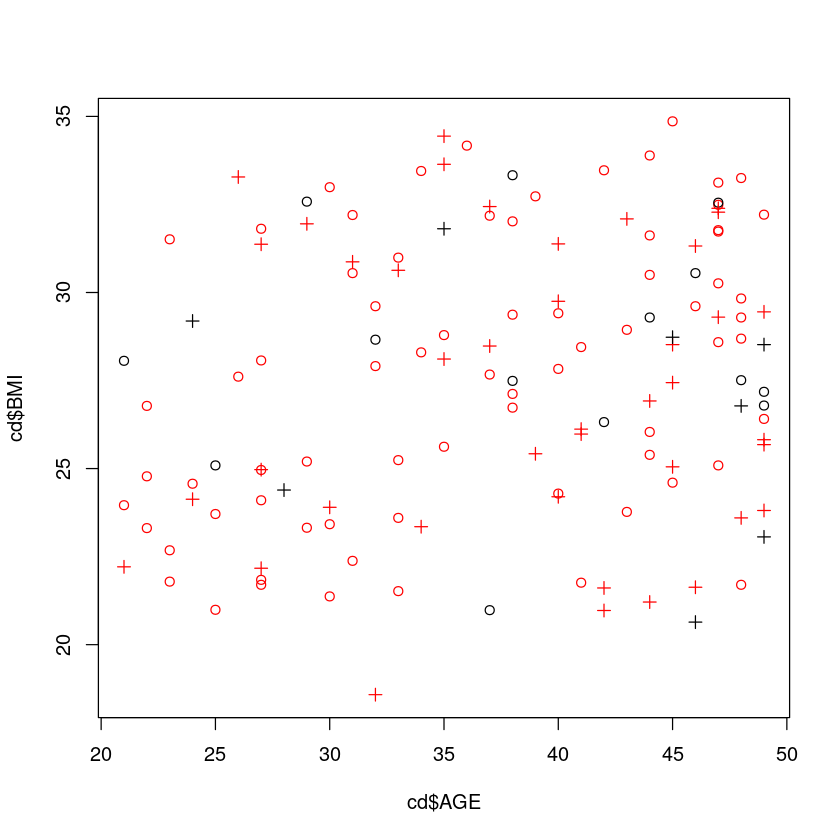

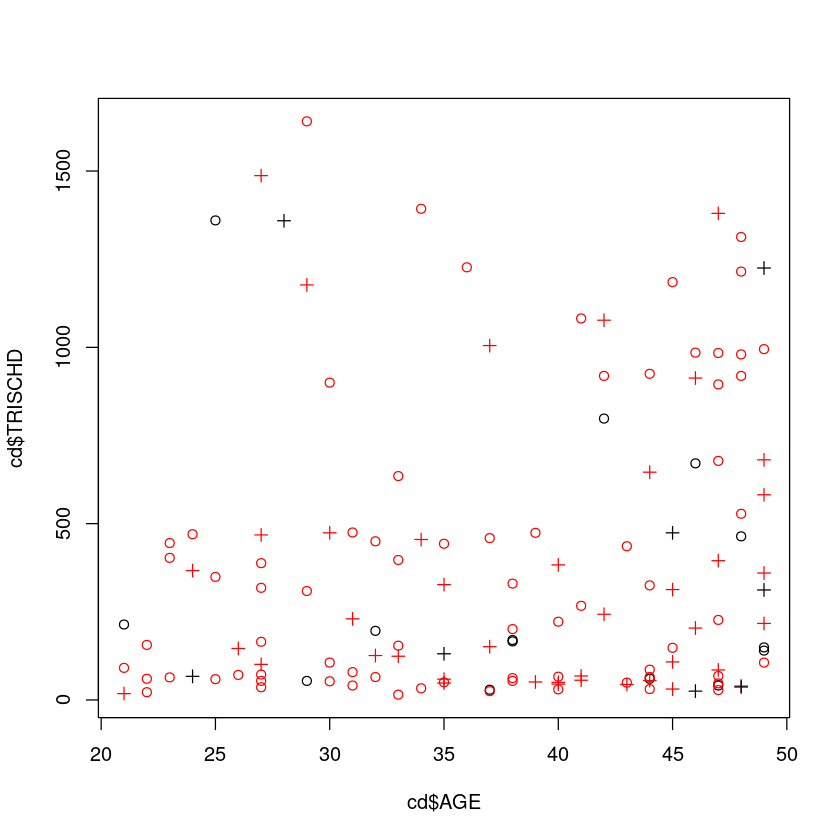

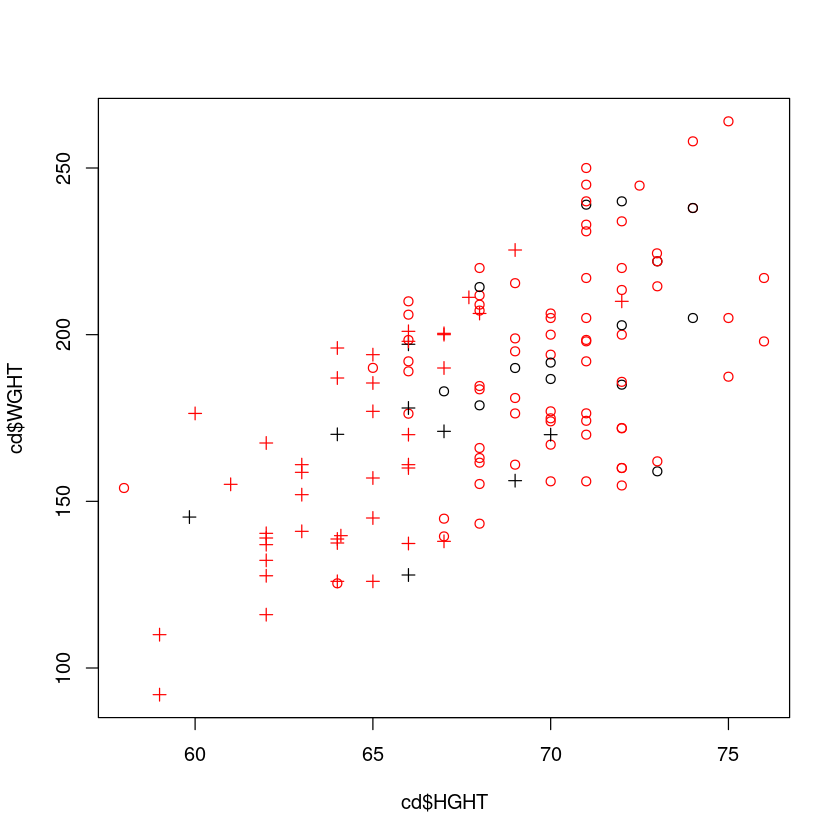

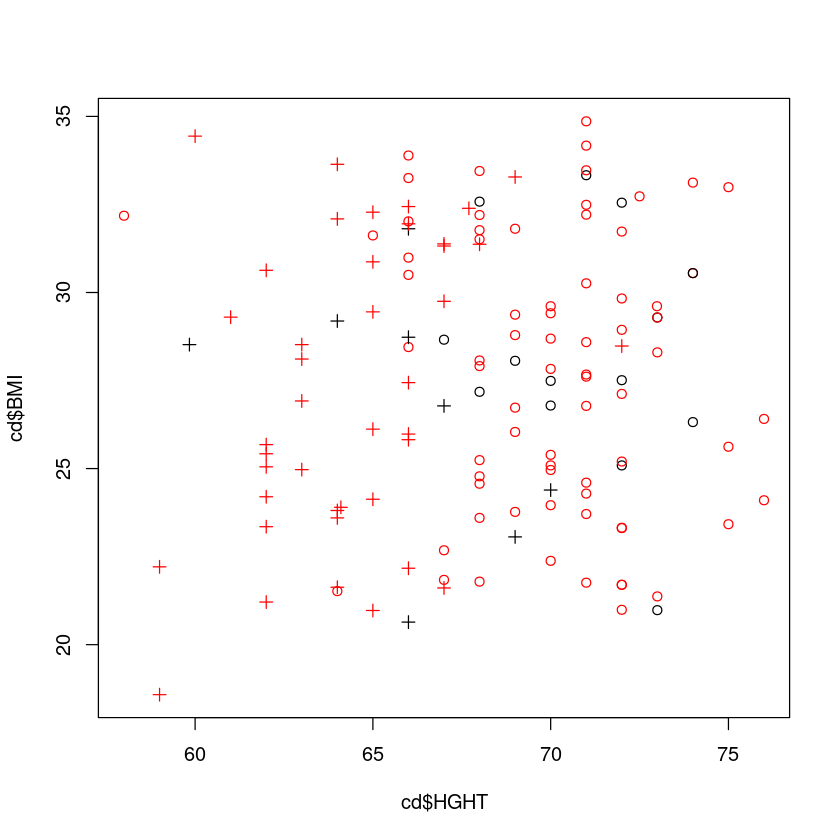

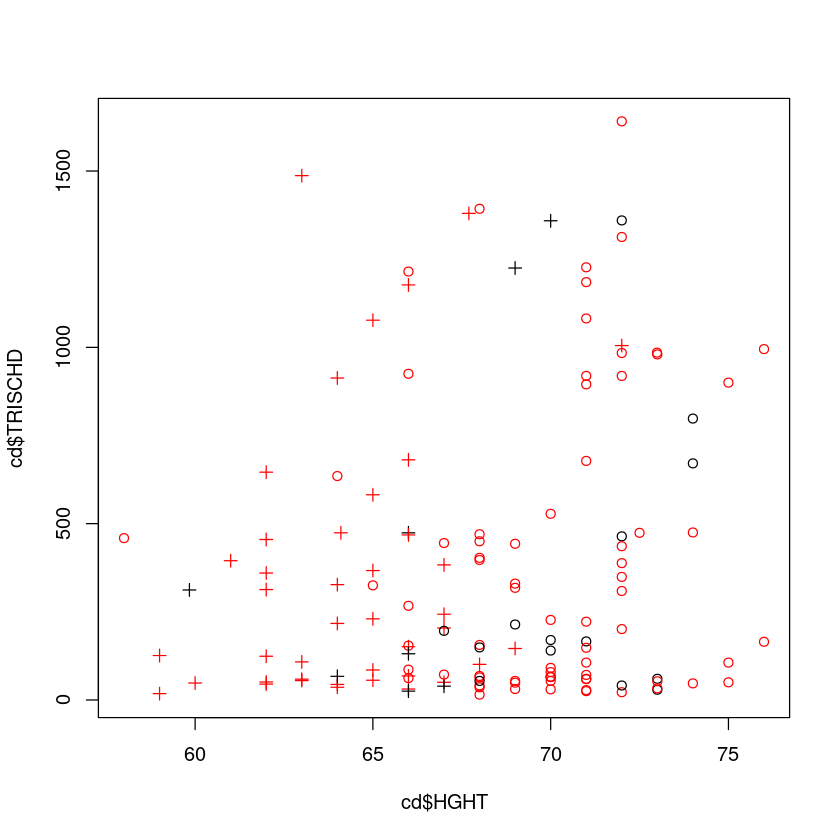

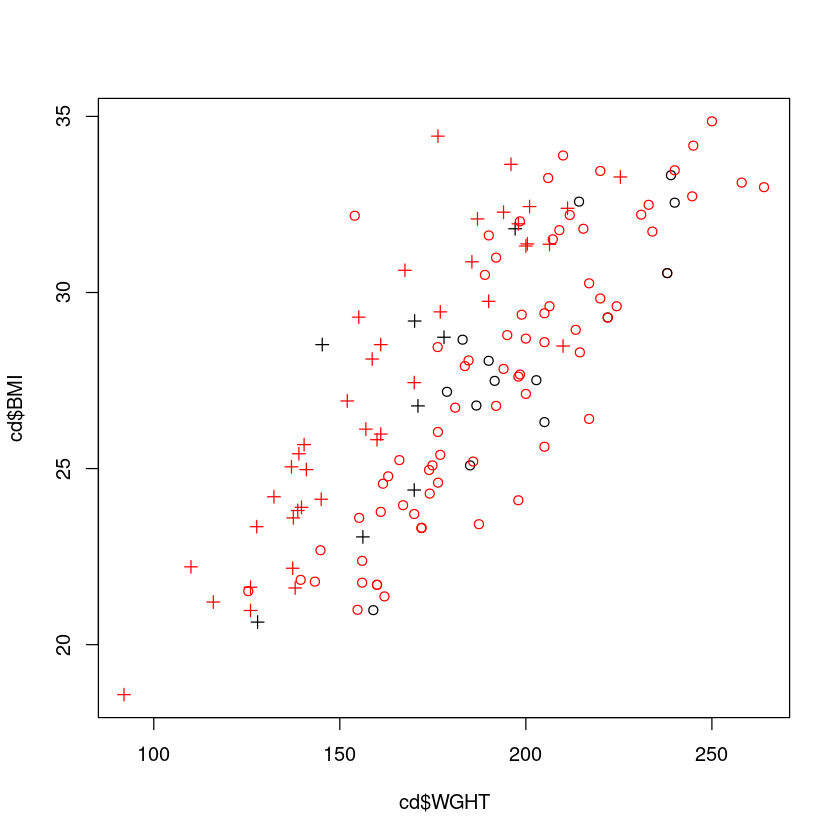

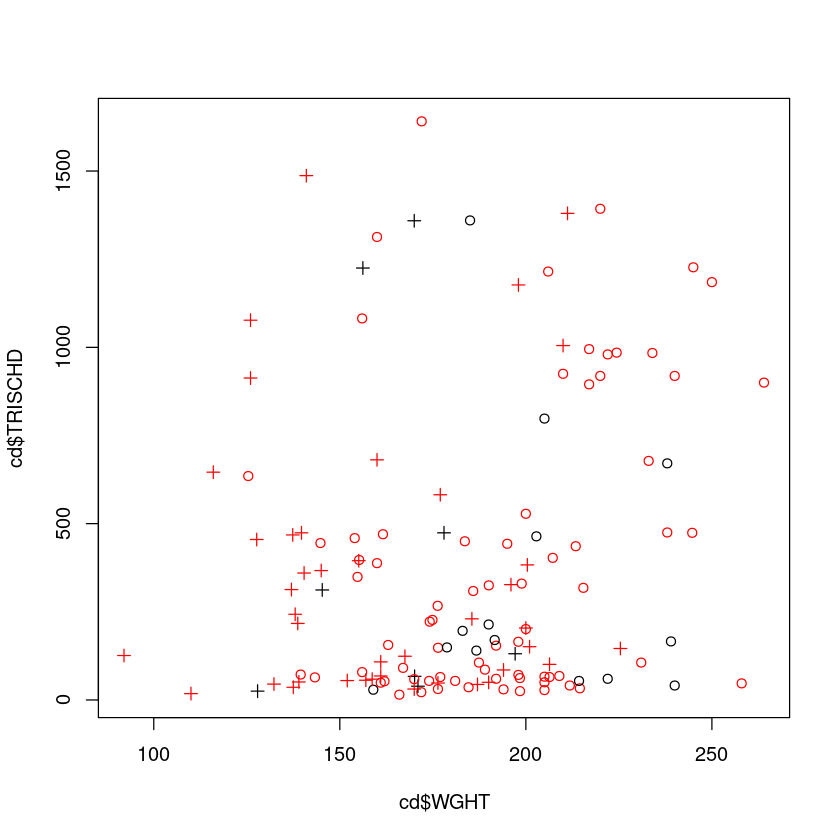

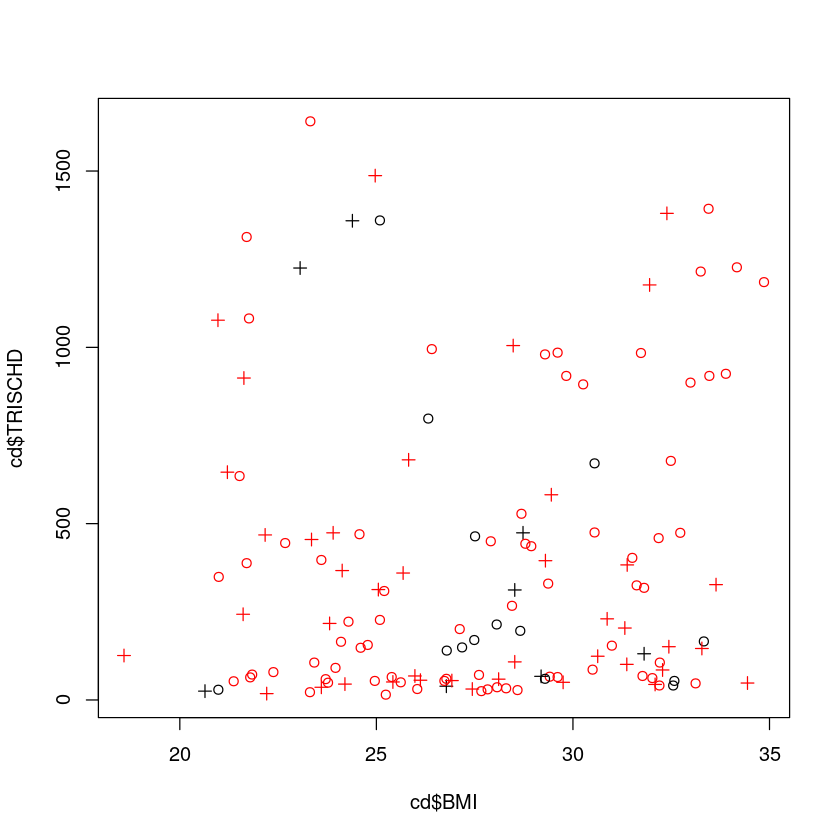

In [39]:
## Rond = Homme, Croix = Femme

s1<-plot(cd$AGE, cd$HGHT, col=clrs, pch=shapes)
s2<-plot(cd$AGE, cd$WGHT, col=clrs, pch=shapes)
s3<-plot(cd$AGE, cd$BMI, col=clrs, pch=shapes)
s4<-plot(cd$AGE, cd$TRISCHD, col=clrs, pch=shapes)
s5<-plot(cd$HGHT, cd$WGHT, col=clrs, pch=shapes)
s6<-plot(cd$HGHT, cd$BMI, col=clrs, pch=shapes)
s7<-plot(cd$HGHT, cd$TRISCHD, col=clrs, pch=shapes)
s8<-plot(cd$WGHT, cd$BMI, col=clrs, pch=shapes)
s9<-plot(cd$WGHT, cd$TRISCHD, col=clrs, pch=shapes)
s10<-plot(cd$BMI, cd$TRISCHD, col=clrs, pch=shapes)

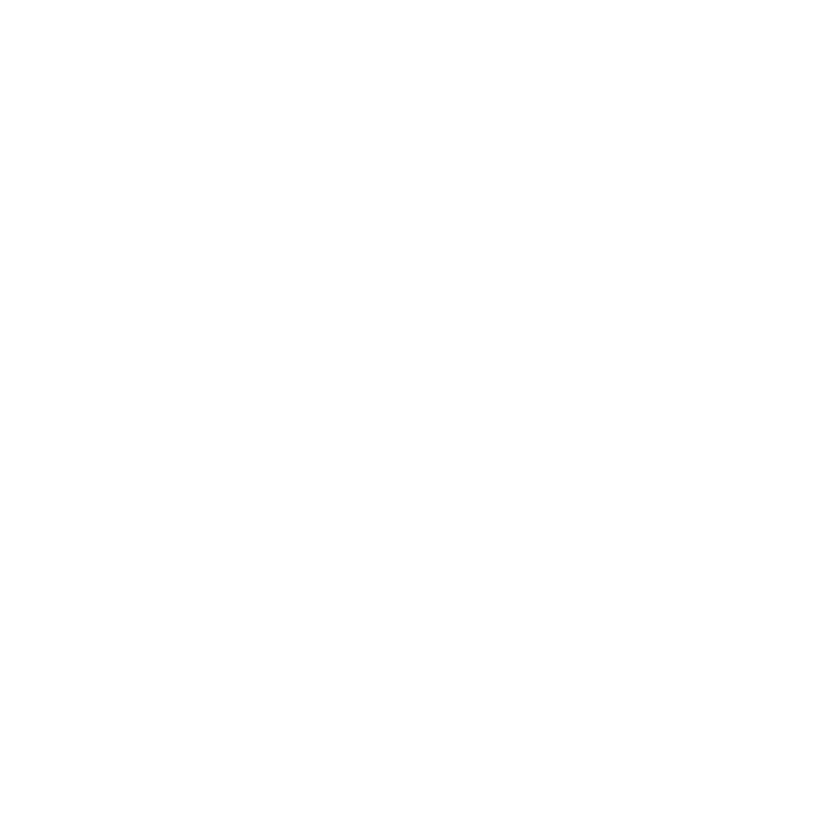

In [34]:
h<-grid.arrange(grob(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10), ncol=5)

# Question 2 

In [48]:
new_cohort <- replace(cd$COHORT, cd$COHORT=='Organ Donor (OPO)', 'Organ_Donor')
cd$COHORT <- new_cohort

In [49]:
#normalisation pour les variables numériques et changement de type pour les variable catégorielles 
numerical_variables <- list('AGE', 'HGHT', 'WGHT', 'BMI', 'TRISCHD') 
categorical_variables <- list('SEX', 'COHORT', 'DTHHRDY')
for (variable in numerical_variables){
    cd[variable] <- scale(cd[variable])
}
for (variable in categorical_variables){
    cd[variable] <- factor(cd[[variable]])
}

In [50]:
#On retire la colonne SMPLID, on garde les cluster 0 à 63 (indices 2 à 65)²
mc_red <-mc[,2:65]

In [51]:
mc_red

Mophological.cluster.0 Mophological.cluster.1 Mophological.cluster.2
1    20                     22                    107                   
2    51                     81                     87                   
3    79                     86                     51                   
4    45                    140                     34                   
5   171                    139                     44                   
6   159                     65                     31                   
7    86                    189                     40                   
8    71                    122                     13                   
9    30                    100                    323                   
10  150                    121                     64                   
11   60                     27                     68                   
12  200                    106                      7                   
13  180                    243                     50                   
14   89                      8                     27                   
15   92                     59                      3                   
16  160                    127                    162                   
17  124                     87                    226                   
18   97                      3                     11                   
19   95                     69                    531                   
20   25                     16                    384                   
21  160                     83                     34                   
22  232                    146                    106                   
23   25                     29                     91                   
24  228                    145                     21                   
25   33                     33                    359                   
26  115                    135                    136                   
27  122                    297                     32                   
28  117                     74                     18                   
29  133                    193                     33                   
30   64                    108                     31                   
⋮   ⋮                      ⋮                      ⋮                     
107 210                    122                    181                   
108 151                    237                    372                   
109  83                    219                    471                   
110  39                     38                     32                   
111  13                     30                    137                   
112  32                     14                     48                   
113  54                      9                     71                   
114 189                     74                     56                   
115 107                    195                     72                   
116 214                    650                     56                   
117  90                    194                    177                   
118 108                     75                    231                   
119  71                     67                     52                   
120  80                     15                     51                   
121 256                    147                     22                   
122 179                    235                    102                   
123 155                    168                     45                   
124 114                    182                     60                   
125 242                    172                     15                   
126 312                    141                    224                   
127  22                     88                    115                   
128  10                     26                     54                   
129  16                    152                    289         

## Pré-analyses

### Corrélation moyenne-variance

[1] 0.3793004

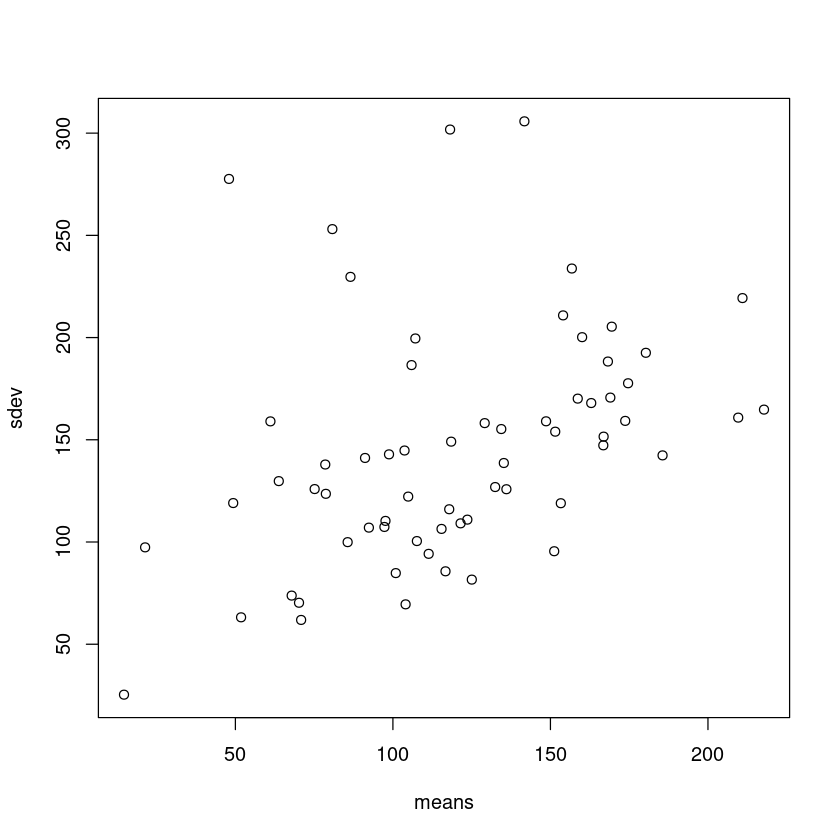

In [52]:
#Dans l'article sur DESseq2 ils parlent du fait qu'avec les rna counts on a une corrélation entre la moyenne de l'expression
#d'un gêne et sa variance, et du coup il vaut mieux faire une normalisation, par exemple pour les pca etc. du coup je voulais
#vérifier si c'est le cas aussi avec les cluster counts mais il semble que non
#après, ça ne veut pas nécessairement dire qu'il ne faut pas quand même faire de normalisation 

means <- colMeans(mc_red)
sdev <- sapply(mc_red, sd)

plot(means, sdev)
cor(means, sdev)

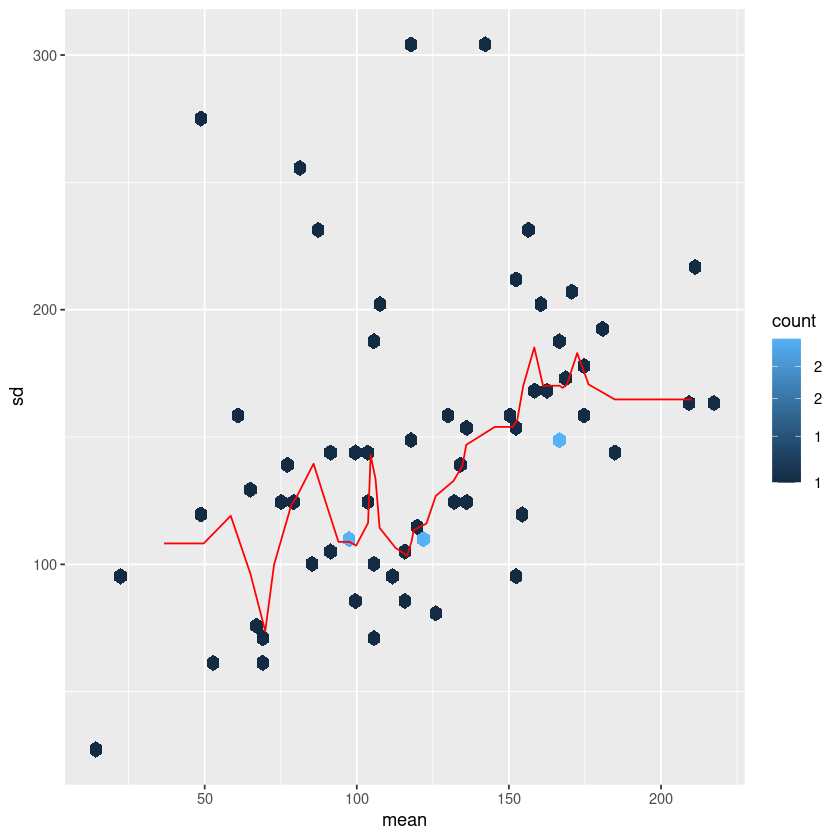

In [53]:
meanSdPlot(t(data.matrix(mc_red)), ranks=FALSE)

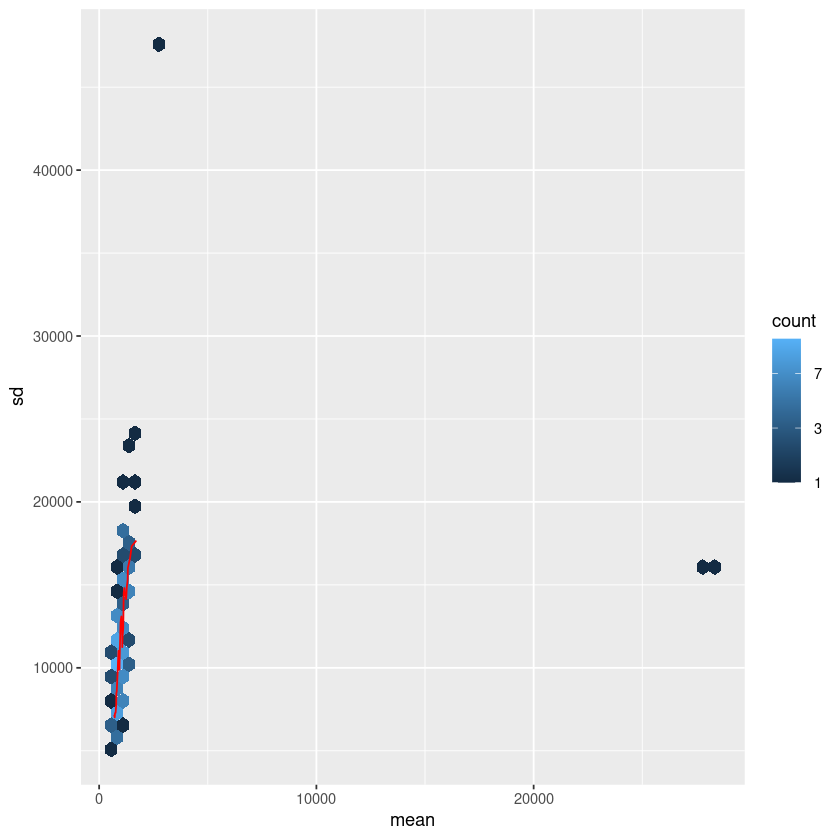

In [56]:
#par comparaison, faisons la même chose avec les rna counts
meanSdPlot(t(data.matrix(rna)), ranks=FALSE)

[1] 0.7956279

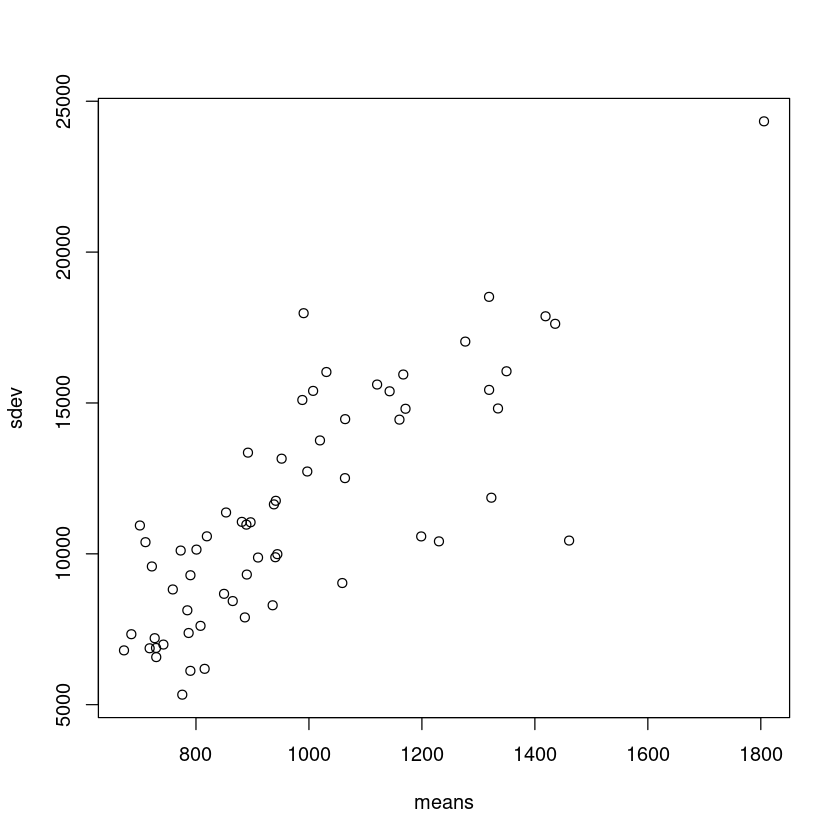

In [57]:
mrna <- rna[,3:65] #On retire la colonne name et description (indices 1 et 2)
means <- colMeans(mrna)
sdev <- sapply(mrna, sd)

plot(means, sdev)
cor(means, sdev)

#on voit que la corrélation est beaucoup plus élevée

### Corrélations des clusters morphologiques entre eux

In [82]:
corr <- cor(mc_red)
corr <- abs(corr)
corr[corr==1.0]<-0.0
max(corr)
#j'ai pas été loin dans l'analyse de la matrice de corrélation pour l'instant, mais avec une corrélation max de 0.88 on 
#pourrait éventuellement envisager d'éliminer les clusters les plus corrélés

[1] 0.8862563

### PCA des clusters

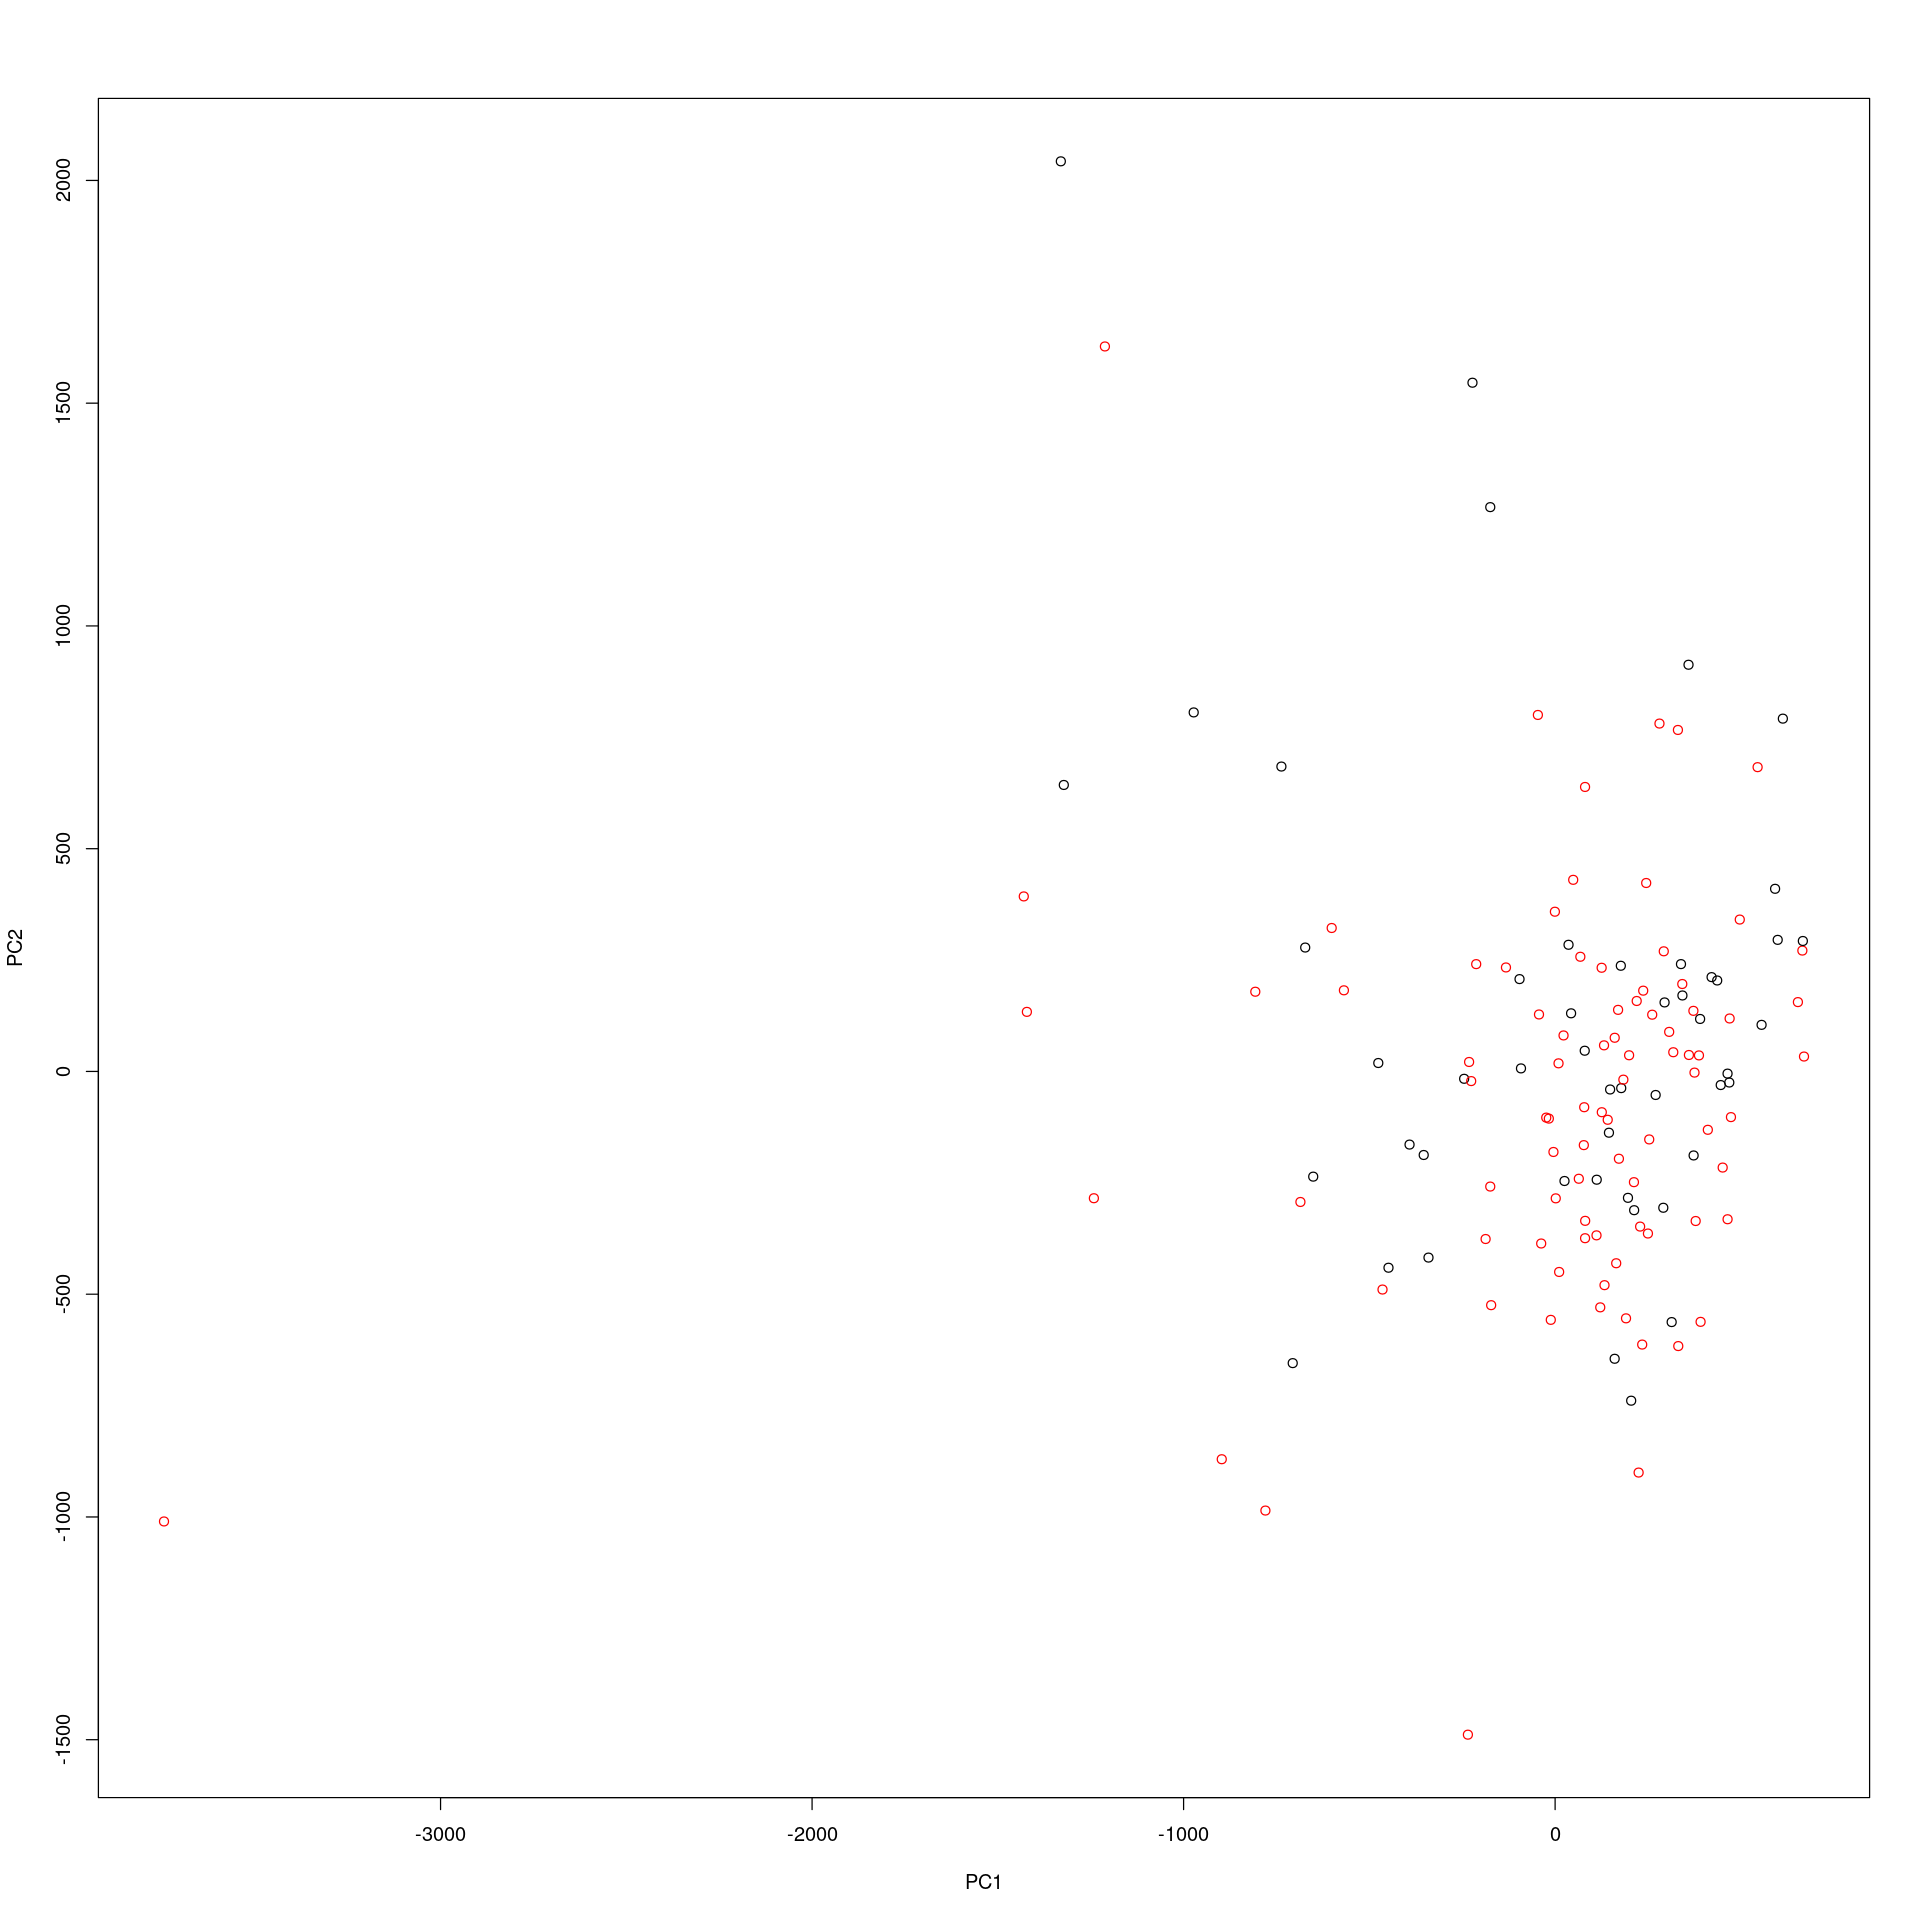

In [83]:
pca = prcomp(mc_red)
colors <- rep("black", 136)
colors[cd$SEX == 1] <- "red"
plot(pca$x[, 1:2], col=colors)

## Analyse de l'expression différentielle

In [58]:
#assoc_table va être une matrice dont les lignes correspondent aux variables cliniques et les colonnes aux clusters
#les éléments de la matrice décrivent l'association entre les variables et les clusters
#on extrait les noms des variables cliniques et des clusters pour les définir comme noms des lignes et colonnes d'assoc_table
row <- colnames(cd)[2:10]
row <- row[-6]

col <- colnames(mc[,2:65])
assoc_table <- data.frame(matrix(ncol = 64, nrow = 8))
colnames(assoc_table) <- col
rownames(assoc_table) <- row
#Tous les éléments d'assoc_table sont FALSE et vont être changés en True au fur et à mesure que les associations sont déterminées
assoc_table[,] <- 0
assoc_table

Mophological.cluster.0 Mophological.cluster.1 Mophological.cluster.2
SEX     0                      0                      0                     
AGE     0                      0                      0                     
HGHT    0                      0                      0                     
WGHT    0                      0                      0                     
BMI     0                      0                      0                     
COHORT  0                      0                      0                     
TRISCHD 0                      0                      0                     
DTHHRDY 0                      0                      0                     
        Mophological.cluster.3 Mophological.cluster.4 Mophological.cluster.5
SEX     0                      0                      0                     
AGE     0                      0                      0                     
HGHT    0                      0                      0                     
WGHT    0                      0                      0                     
BMI     0                      0                      0                     
COHORT  0                      0                      0                     
TRISCHD 0                      0                      0                     
DTHHRDY 0                      0                      0                     
        Mophological.cluster.6 Mophological.cluster.7 Mophological.cluster.8
SEX     0                      0                      0                     
AGE     0                      0                      0                     
HGHT    0                      0                      0                     
WGHT    0                      0                      0                     
BMI     0                      0                      0                     
COHORT  0                      0                      0                     
TRISCHD 0                      0                      0                     
DTHHRDY 0                      0                      0                     
        Mophological.cluster.9 ⋯ Mophological.cluster.54
SEX     0                      ⋯ 0                      
AGE     0                      ⋯ 0                      
HGHT    0                      ⋯ 0                      
WGHT    0                      ⋯ 0                      
BMI     0                      ⋯ 0                      
COHORT  0                      ⋯ 0                      
TRISCHD 0                      ⋯ 0                      
DTHHRDY 0                      ⋯ 0                      
        Mophological.cluster.55 Mophological.cluster.56 Mophological.cluster.57
SEX     0                       0                       0                      
AGE     0                       0                       0                      
HGHT    0                       0                       0                      
WGHT    0                       0                       0                      
BMI     0                       0                       0                      
COHORT  0                       0                       0                      
TRISCHD 0                       0                       0                      
DTHHRDY 0                       0                       0                      
        Mophological.cluster.58 Mophological.cluster.59 Mophological.cluster.60
SEX     0                       0                       0                      
AGE     0                       0                       0                      
HGHT    0                       0                       0                      
WGHT    0                       0                       0                      
BMI     0                       0                       0                      
COHORT  0                       0                       0                      
TRISCHD 0                       0                       0                      
DTHHRDY 0                       0                       

### Sex

In [78]:
#création de l'objet deseq dataset
dds = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = ~ SEX)
# calcul des expressions différentielles
dds <- DESeq(dds, quiet=TRUE)
res <- results(dds)
#sélection des clusters pour lesquels les p values et les pvalues ajustées sont inférieures à 0.05
res.05 <- results(dds, alpha = 0.05)
resSig <- subset(res, padj < 0.05)
resSig

converting counts to integer mode



log2 fold change (MLE): SEX 2 vs 1 
Wald test p-value: SEX 2 vs 1 
DataFrame with 7 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat
                        <numeric>      <numeric> <numeric> <numeric>
Mophological.cluster.18   79.0266       1.053218  0.268311   3.92536
Mophological.cluster.28  154.2311       0.611144  0.215170   2.84029
Mophological.cluster.29   71.3152       0.672496  0.225778   2.97857
Mophological.cluster.36  116.7020       2.803487  0.460505   6.08786
Mophological.cluster.38   92.7315       1.073725  0.294151   3.65026
Mophological.cluster.42  108.5923       1.816409  0.393394   4.61728
Mophological.cluster.57  114.7111       0.944129  0.282605   3.34081
                             pvalue        padj
                          <numeric>   <numeric>
Mophological.cluster.18 8.65987e-05 1.81857e-03
Mophological.cluster.28 4.50729e-03 4.05656e-02
Mophological.cluster.29 2.89601e-03 3.04081e-02
Mophological.cluster.36 1.14432e-09 

In [84]:
#pour voir le nombre de clusters pour lesquels la p-value est inférieure à 0.05
res.05 <- results(dds, alpha = 0.05)
table(res.05$padj < 0.05)


FALSE  TRUE 
   58     7 

In [80]:
#projet sample distances (à utiliser ou à supprimer)

#pas encore sur de quoi faire avec ça mais je me disais qu'on pourrait peut-être faire quelque chose avec une matrice
#des distances entre samples
sampleDists <- dist(t(assay(dds)))
sampleDists

            1         2         3         4         5         6         7
2    691.9588                                                            
3   1050.6912  858.8160                                                  
4    830.6269  493.9109  792.7616                                        
5   1442.0669 1308.5748 1161.6725 1278.9636                              
6    934.8765 1052.6885 1018.1532  883.1506 1526.9319                    
7   1430.2311  991.9365 1048.4918  935.6132 1333.5419 1441.3851          
8   1354.9240 1197.7045 1002.3068  925.0611 1571.2218 1068.6473 1293.6808
9   1511.3431 1700.2585 2087.6652 1881.4853 2368.3460 1824.7016 2312.4439
10  1258.8685 1105.8458 1045.5362  970.6807 1514.6594 1118.5178 1352.3006
11  1889.6383 1624.4858 1892.2846 1674.0048 1984.4349 2051.3393 1802.1121
12  1320.2011 1068.9228  876.7799  916.0448 1162.5627 1040.1360 1088.4889
13  1969.2907 1731.0081 1669.0992 1683.5757 1221.7934 1939.3184 1697.5574
14  1244.9297  773.8249  877.7551  701

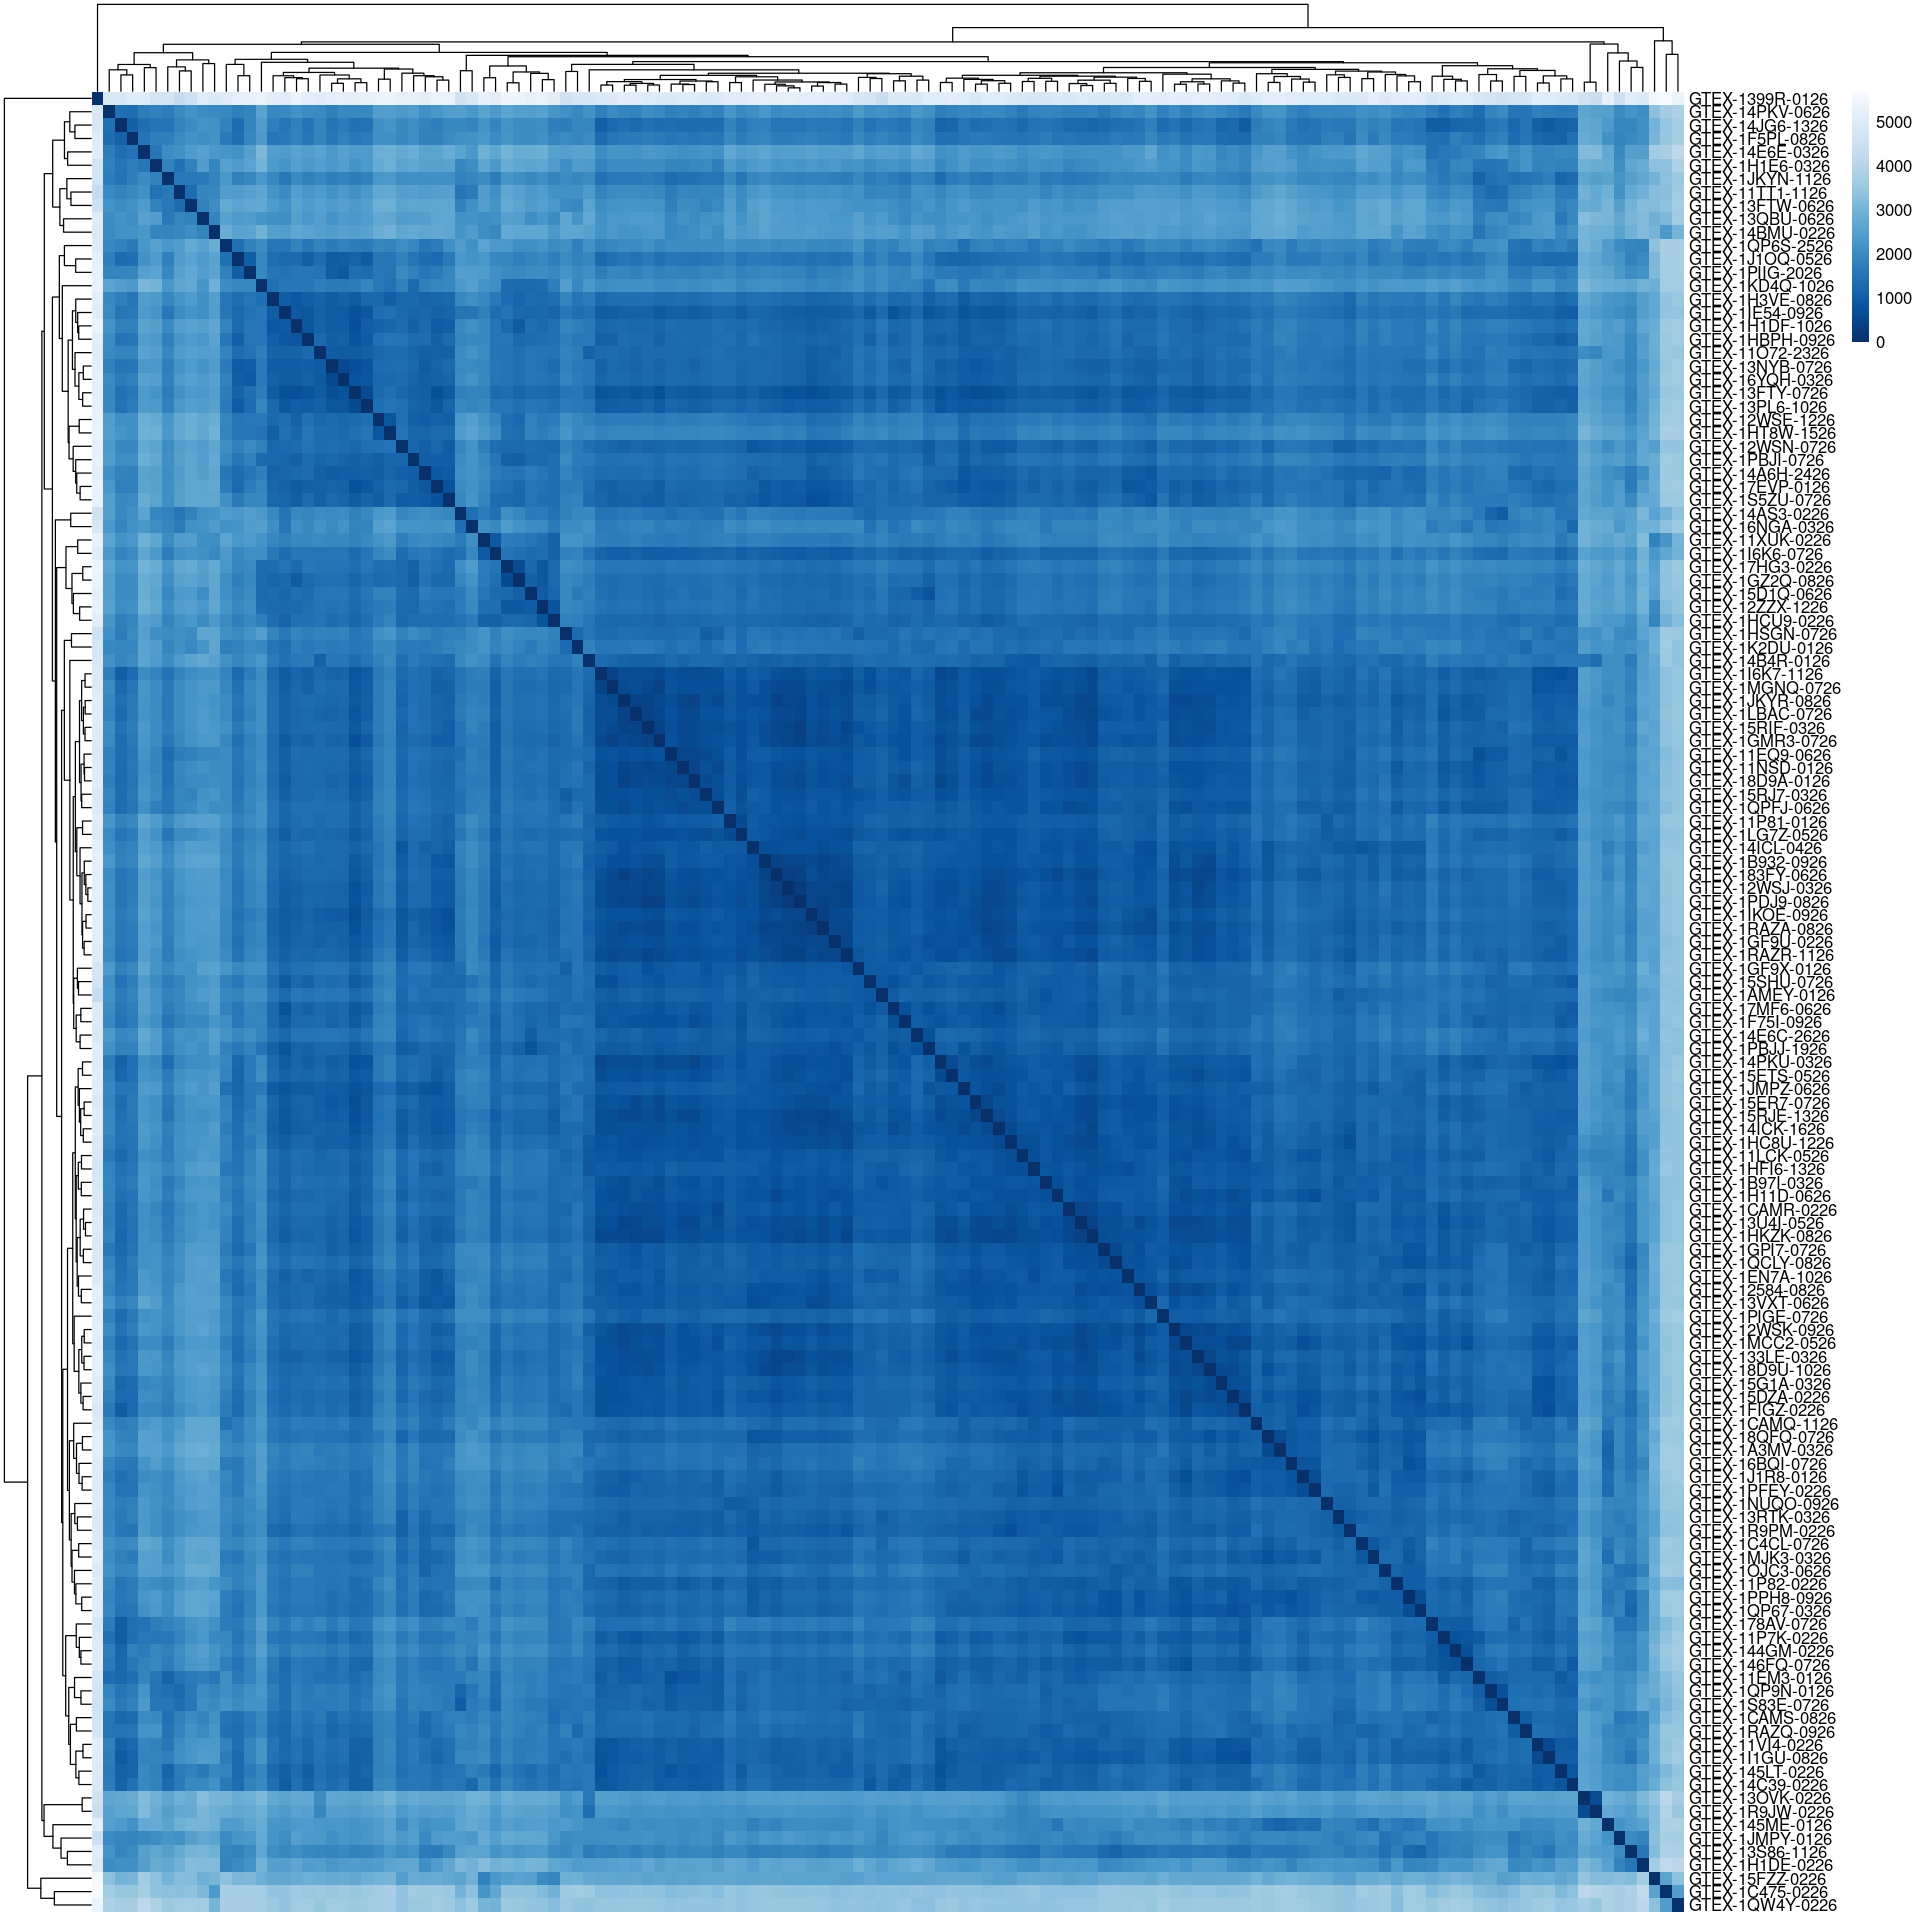

In [81]:
#projet sample distance (matrix)

sampleDistMatrix <- as.matrix( sampleDists )
rownames(sampleDistMatrix) <- paste( cd$SMPLID )
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
options(repr.plot.width=16, repr.plot.height=16)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors)

In [86]:
fill_assoc_table <- function(resSig, cond){
    names = rownames(resSig)
    lfc = resSig$log2FoldChange
    for(i in 1:length(names)){
        name = names[i]
        #print(name)
        assoc_table[cond,][name] <<- lfc[i]
        }        
    }

fill_assoc_table(resSig, "SEX")

### Hardy

In [62]:
#Il a ete choisi de rassembler les categories de l'echelle de Hardy en 2 categories : 1 correspond aux morts rapides (1 et 2) et 0 aux morts plus lentes (0,3 et 4)
levels(cd$DTHHRDY)[levels(cd$DTHHRDY)=="2"] <-"1"
levels(cd$DTHHRDY)[levels(cd$DTHHRDY)=="3"] <-"0"
levels(cd$DTHHRDY)[levels(cd$DTHHRDY)=="4"] <-"0"

In [63]:
dds = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = ~ DTHHRDY)
dds <- DESeq(dds, quiet=TRUE)
res <- results(dds)
res.05 <- results(dds, alpha = 0.05)
#table(res.05$padj < 0.05)
resSig <- subset(res, padj < 0.05)
#resSig[ order(resSig$log2FoldChange), ]
fill_assoc_table(resSig, "DTHHRDY")
#print(assoc_table['DTHHRDY',])

converting counts to integer mode



### Cohort

In [64]:
dds = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = ~ COHORT)
dds <- DESeq(dds, quiet=TRUE)
res <- results(dds)
res.05 <- results(dds, alpha = 0.05)
#table(res.05$padj < 0.05)
resSig <- subset(res, padj < 0.05)
#resSig[ order(resSig$log2FoldChange), ]
fill_assoc_table(resSig, "COHORT")
#print(assoc_table['COHORT',])

converting counts to integer mode



### Numerical variables

In [65]:
#fonction pour remplir la ligne du tableau 'assoc_table' associée avec une variable clinique numérique, dont le nom est donné dans l'argument "condition"
num_dif_exp <- function(condition, assoc_table){
    cond <- as.formula(paste("~", condition))
    print(cond)
    dds = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = cond)
    dds <- DESeq(dds, quiet=TRUE)
    res <- results(dds)
    res.05 <- results(dds, alpha = 0.05)
    resSig <- subset(res, padj < 0.05)
    #print(rownames(resSig))
    fill_assoc_table(resSig, condition)
}

In [66]:
for(variable in numerical_variables){
    num_dif_exp(variable, assoc_table)}

~AGE
<environment: 0x56467bb9e7c8>


converting counts to integer mode



~HGHT
<environment: 0x564680c96a68>


converting counts to integer mode



~WGHT
<environment: 0x564693d87000>


converting counts to integer mode



~BMI
<environment: 0x564693125e18>


converting counts to integer mode



~TRISCHD
<environment: 0x5646854cf198>


converting counts to integer mode



### Representation d'assoc_table sous forme de heatmap

Warning message in heatmap.2(data.matrix(assoc_table), Colv = NA, Rowv = NA, scale = "none", :
“Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram.”
Warning message in heatmap.2(data.matrix(assoc_table), Colv = NA, Rowv = NA, scale = "none", :
“Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram.”


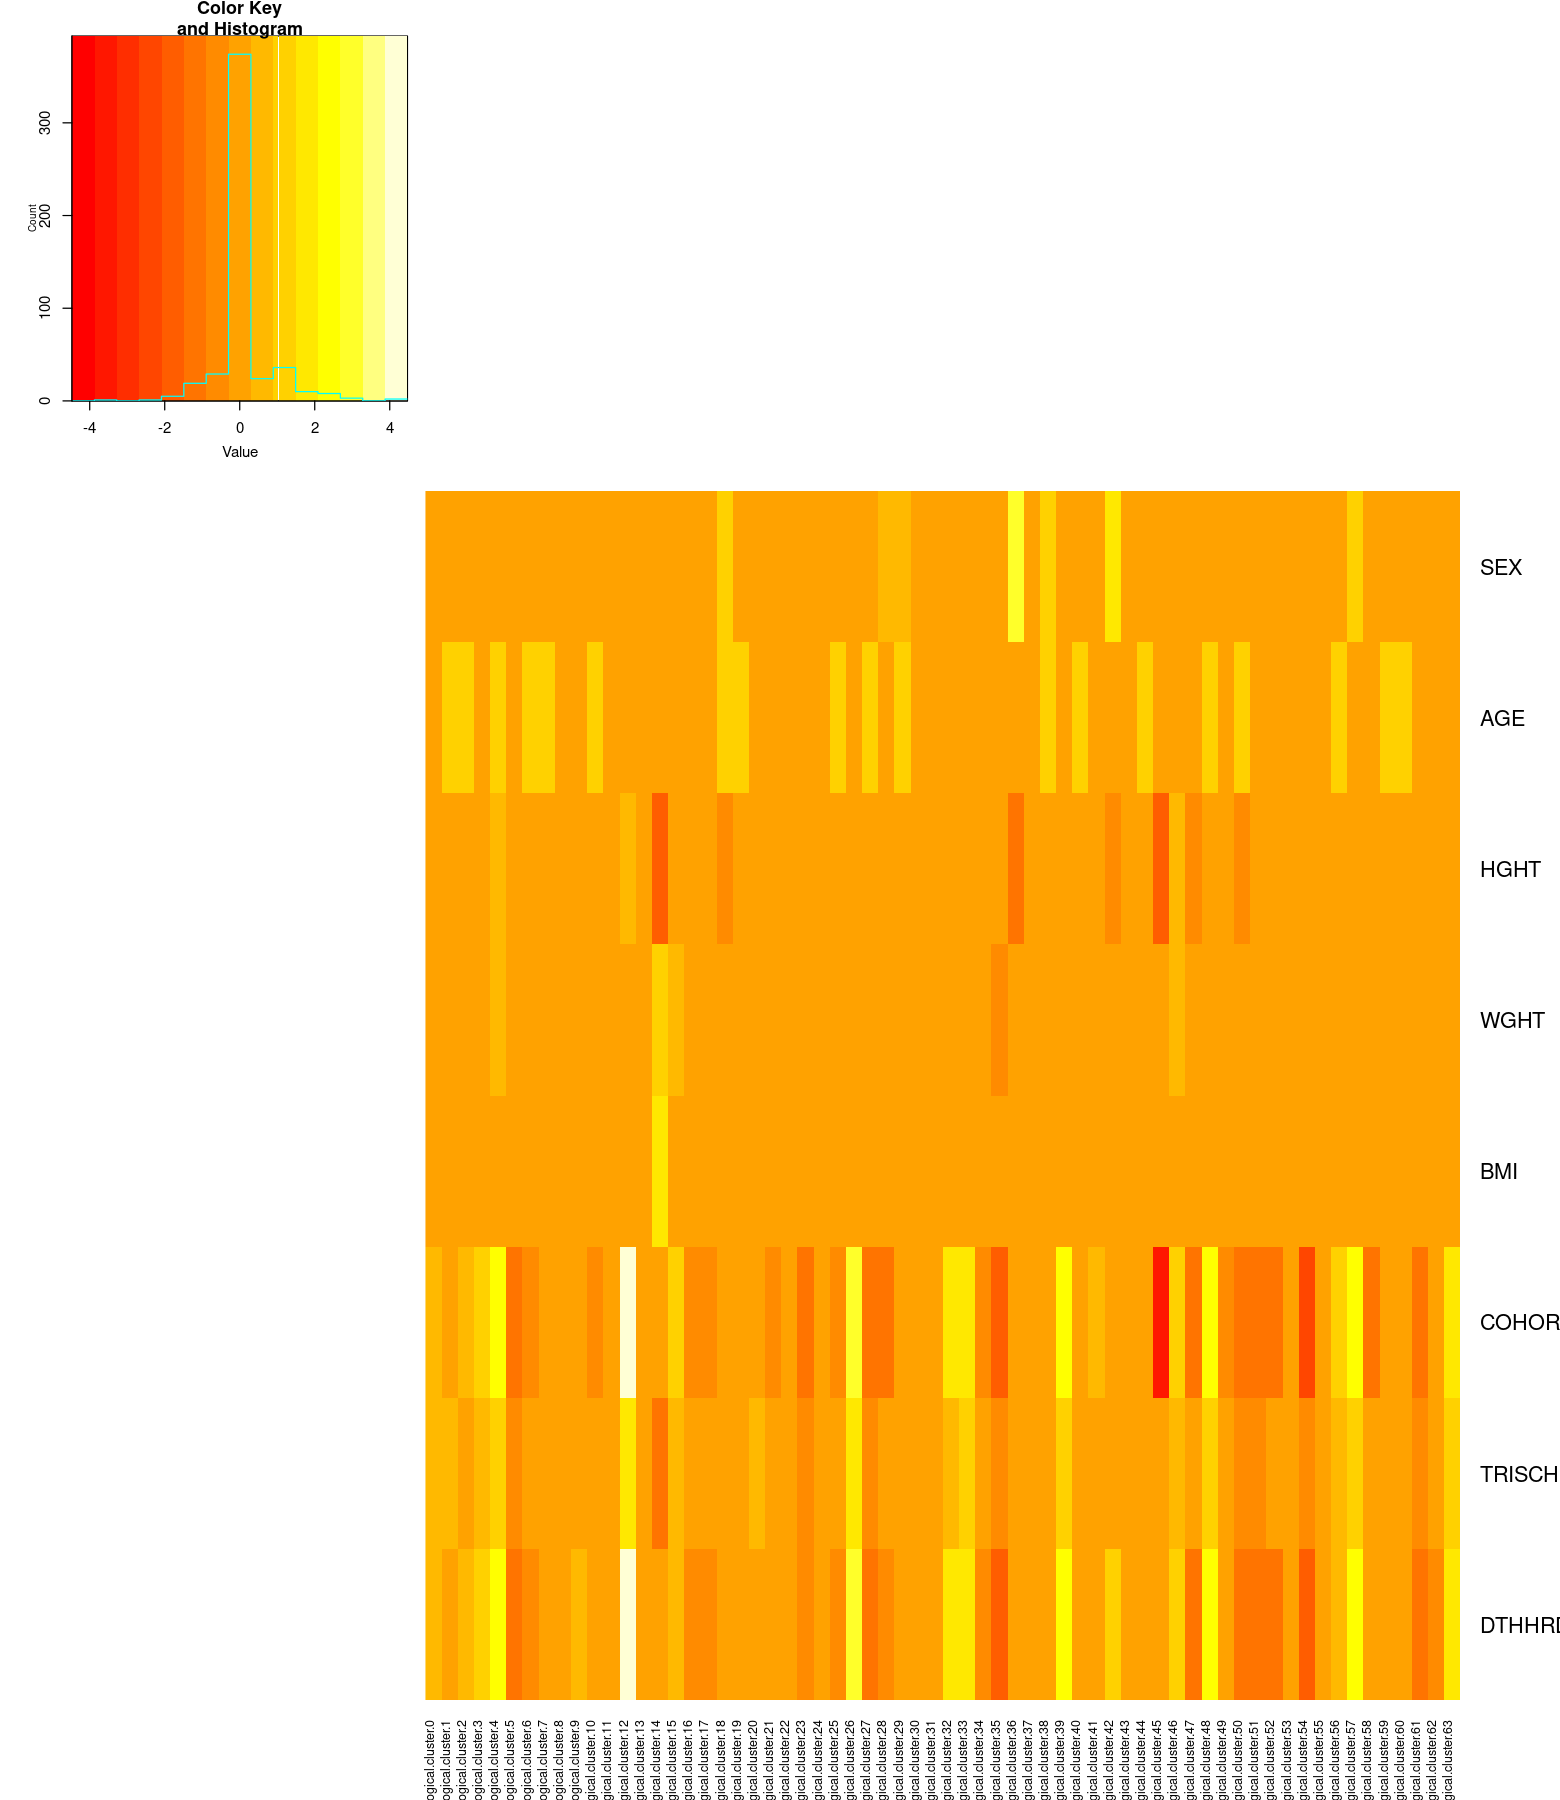

In [88]:
options(repr.plot.width=13, repr.plot.height=15)
#jpeg(file="heatmap1.jpeg")
heatmap.2(data.matrix(assoc_table), Colv = NA, Rowv = NA, scale='none', trace="none")
#dev.off()

In [70]:
colnames(assoc_table)

[1] "Mophological.cluster.0"  "Mophological.cluster.1" 
 [3] "Mophological.cluster.2"  "Mophological.cluster.3" 
 [5] "Mophological.cluster.4"  "Mophological.cluster.5" 
 [7] "Mophological.cluster.6"  "Mophological.cluster.7" 
 [9] "Mophological.cluster.8"  "Mophological.cluster.9" 
[11] "Mophological.cluster.10" "Mophological.cluster.11"
[13] "Mophological.cluster.12" "Mophological.cluster.13"
[15] "Mophological.cluster.14" "Mophological.cluster.15"
[17] "Mophological.cluster.16" "Mophological.cluster.17"
[19] "Mophological.cluster.18" "Mophological.cluster.19"
[21] "Mophological.cluster.20" "Mophological.cluster.21"
[23] "Mophological.cluster.22" "Mophological.cluster.23"
[25] "Mophological.cluster.24" "Mophological.cluster.25"
[27] "Mophological.cluster.26" "Mophological.cluster.27"
[29] "Mophological.cluster.28" "Mophological.cluster.29"
[31] "Mophological.cluster.30" "Mophological.cluster.31"
[33] "Mophological.cluster.32" "Mophological.cluster.33"
[35] "Mophological.cluster.34" "Mophological.cluster.35"
[37] "Mophological.cluster.36" "Mophological.cluster.37"
[39] "Mophological.cluster.38" "Mophological.cluster.39"
[41] "Mophological.cluster.40" "Mophological.cluster.41"
[43] "Mophological.cluster.42" "Mophological.cluster.43"
[45] "Mophological.cluster.44" "Mophological.cluster.45"
[47] "Mophological.cluster.46" "Mophological.cluster.47"
[49] "Mophological.cluster.48" "Mophological.cluster.49"
[51] "Mophological.cluster.50" "Mophological.cluster.51"
[53] "Mophological.cluster.52" "Mophological.cluster.53"
[55] "Mophological.cluster.54" "Mophological.cluster.55"
[57] "Mophological.cluster.56" "Mophological.cluster.57"
[59] "Mophological.cluster.58" "Mophological.cluster.59"
[61] "Mophological.cluster.60" "Mophological.cluster.61"
[63] "Mophological.cluster.62" "Mophological.cluster.63"

In [71]:
x <- LETTERS[1:20]
y <- paste0("var", seq(1,20))
data <- expand.grid(X=x, Y=y)
data$Z <- runif(400, 0, 5)

In [72]:
data

X Y     Z          
1   A var1  2.608919071
2   B var1  4.381650777
3   C var1  4.431280911
4   D var1  1.982507758
5   E var1  2.039031374
6   F var1  1.971611376
7   G var1  4.083222101
8   H var1  0.006509406
9   I var1  4.596353712
10  J var1  0.363023974
11  K var1  4.362693174
12  L var1  0.894015945
13  M var1  3.375800683
14  N var1  0.546493378
15  O var1  2.696258948
16  P var1  1.825151241
17  Q var1  4.422954181
18  R var1  3.614577672
19  S var1  1.865668882
20  T var1  1.835394730
21  A var2  0.913242582
22  B var2  1.477572221
23  C var2  3.621315840
24  D var2  2.533659447
25  E var2  3.243645873
26  F var2  4.161069132
27  G var2  2.678287112
28  H var2  2.091707787
29  I var2  3.891893226
30  J var2  0.509810859
⋮   ⋮ ⋮     ⋮          
371 K var19 1.0643541  
372 L var19 3.7758425  
373 M var19 4.9641252  
374 N var19 3.2356789  
375 O var19 3.5043524  
376 P var19 4.1109221  
377 Q var19 4.9411632  
378 R var19 3.9036763  
379 S var19 2.4732933  
380 T var19 4.4569040  
381 A var20 4.2150759  
382 B var20 0.8449925  
383 C var20 2.9854522  
384 D var20 4.6167823  
385 E var20 2.4655536  
386 F var20 0.2042975  
387 G var20 0.2621930  
388 H var20 0.7004778  
389 I var20 1.7288351  
390 J var20 2.5376313  
391 K var20 2.6825732  
392 L var20 2.2871931  
393 M var20 4.3195930  
394 N var20 2.6115262  
395 O var20 3.1424063  
396 P var20 4.8395984  
397 Q var20 3.4348988  
398 R var20 0.5452916  
399 S var20 2.0556631  
400 T var20 2.5007670

### Controle pour les variables confondantes

#### Age

In [73]:
dds = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = ~AGE)

converting counts to integer mode



In [74]:
dds <- DESeq(dds)
res <- results(dds)
resultsNames(dds)
res
summary(res)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 3 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept" "AGE"

log2 fold change (MLE): AGE 
Wald test p-value: AGE 
DataFrame with 65 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat
                        <numeric>      <numeric> <numeric> <numeric>
SMPLID                    72.9315     -0.0638205 0.1033469 -0.617536
Mophological.cluster.0   105.4915      0.1156102 0.0943372  1.225499
Mophological.cluster.1   103.7647     -0.2699732 0.1093565 -2.468744
Mophological.cluster.2   117.1776      0.4557804 0.1131568  4.027866
Mophological.cluster.3   125.2827      0.0296187 0.1107491  0.267440
...                           ...            ...       ...       ...
Mophological.cluster.59   13.8445     -0.4766533 0.1929738 -2.470041
Mophological.cluster.60  126.7505      0.3471631 0.0907575  3.825170
Mophological.cluster.61  139.2785     -0.0480276 0.1325792 -0.362256
Mophological.cluster.62  152.6477     -0.2667380 0.1224516 -2.178314
Mophological.cluster.63  136.0940     -0.1649759 0.1449442 -1.138203
             


out of 65 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 19, 29%
LFC < 0 (down)     : 8, 12%
outliers [1]       : 3, 4.6%
low counts [2]     : 0, 0%
(mean count < 14)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [75]:
res.05 <- results(dds, alpha = 0.05)
table(res.05$padj < 0.05)
resSig <- subset(res, padj < 0.05)
resSig[ order(resSig$log2FoldChange), ]
assoc_table[2,] <- colnames(assoc_table) %in% rownames(resSig)
assoc_table


FALSE  TRUE 
   43    19 

log2 fold change (MLE): AGE 
Wald test p-value: AGE 
DataFrame with 19 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat
                        <numeric>      <numeric> <numeric> <numeric>
Mophological.cluster.10  124.4419      -0.509399 0.1066418  -4.77673
Mophological.cluster.59   13.8445      -0.476653 0.1929738  -2.47004
Mophological.cluster.25  130.5129      -0.341241 0.1060666  -3.21724
Mophological.cluster.6   191.6982      -0.300548 0.0816063  -3.68290
Mophological.cluster.1   103.7647      -0.269973 0.1093565  -2.46874
...                           ...            ...       ...       ...
Mophological.cluster.27   107.209       0.530725  0.142141   3.73380
Mophological.cluster.7     82.350       0.536899  0.126295   4.25116
Mophological.cluster.40   125.356       0.657209  0.166233   3.95354
Mophological.cluster.4    119.062       0.668394  0.163842   4.07949
Mophological.cluster.48    98.869       0.840589  0.156712   5.36390
             

Mophological.cluster.0 Mophological.cluster.1 Mophological.cluster.2
SEX     0.0000000              0.0000000              0.0000000             
AGE     0.0000000              1.0000000              1.0000000             
HGHT    0.0000000              0.0000000              0.0000000             
WGHT    0.0000000              0.0000000              0.0000000             
BMI     0.0000000              0.0000000              0.0000000             
COHORT  0.8145371              0.0000000              0.6401291             
TRISCHD 0.4003650              0.3037061              0.0000000             
DTHHRDY 0.8100598              0.0000000              0.7172598             
        Mophological.cluster.3 Mophological.cluster.4 Mophological.cluster.5
SEX     0.0000000              0.0000000               0.0000000            
AGE     0.0000000              1.0000000               0.0000000            
HGHT    0.0000000              0.5616381               0.0000000            
WGHT    0.0000000              0.5546617               0.0000000            
BMI     0.0000000              0.0000000               0.0000000            
COHORT  1.1588813              2.1742135              -1.2041328            
TRISCHD 0.5205319              0.9444219              -0.3126888            
DTHHRDY 0.9735375              2.2200606              -1.0524702            
        Mophological.cluster.6 Mophological.cluster.7 Mophological.cluster.8
SEX      0.0000000             0                      0                     
AGE      1.0000000             1                      0                     
HGHT     0.0000000             0                      0                     
WGHT     0.0000000             0                      0                     
BMI      0.0000000             0                      0                     
COHORT  -0.5087941             0                      0                     
TRISCHD  0.0000000             0                      0                     
DTHHRDY -0.7229937             0                      0                     
        Mophological.cluster.9 ⋯ Mophological.cluster.54
SEX     0.0000000              ⋯  0.0000000             
AGE     0.0000000              ⋯  0.0000000             
HGHT    0.0000000              ⋯  0.0000000             
WGHT    0.0000000              ⋯  0.0000000             
BMI     0.0000000              ⋯  0.0000000             
COHORT  0.0000000              ⋯ -2.2271065             
TRISCHD 0.0000000              ⋯ -0.3862221             
DTHHRDY 0.6748289              ⋯ -1.5156358             
        Mophological.cluster.55 Mophological.cluster.56 Mophological.cluster.57
SEX     0                       0.0000000               0.000000               
AGE     0                       1.0000000               0.000000               
HGHT    0                       0.0000000               0.000000               
WGHT    0                       0.0000000               0.000000               
BMI     0                       0.0000000               0.000000               
COHORT  0                       1.0682160               2.356604               
TRISCHD 0                       0.5769146               1.047641               
DTHHRDY 0                       0.8168392               2.238732               
        Mophological.cluster.58 Mophological.cluster.59 Mophological.cluster.60
SEX      0.000000               0                        0.0000000             
AGE      0.000000               1                        1.0000000             
HGHT     0.000000               0                        0.0000000             
WGHT     0.000000               0                        0.0000000             
BMI      0.000000               0                        0.0000000             
COHORT  -1.173898               0                        0.0000000             
TRISCHD  0.000000               0                       -0.2916846             
DTHHRDY  0.000000               0                       

#### Controle pour tmps ischémique et cohorte

In [76]:
dds_ctrl = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = ~AGE + COHORT)
dds <- DESeq(dds)
res <- results(dds)
resultsNames(dds)
res
summary(res)

converting counts to integer mode

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 3 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept" "AGE"

log2 fold change (MLE): AGE 
Wald test p-value: AGE 
DataFrame with 65 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat
                        <numeric>      <numeric> <numeric> <numeric>
SMPLID                    72.9315     -0.0638205 0.1033469 -0.617536
Mophological.cluster.0   105.4915      0.1156102 0.0943372  1.225499
Mophological.cluster.1   103.7647     -0.2699732 0.1093565 -2.468744
Mophological.cluster.2   117.1776      0.4557804 0.1131568  4.027866
Mophological.cluster.3   125.2827      0.0296187 0.1107491  0.267440
...                           ...            ...       ...       ...
Mophological.cluster.59   13.8445     -0.4766533 0.1929738 -2.470041
Mophological.cluster.60  126.7505      0.3471631 0.0907575  3.825170
Mophological.cluster.61  139.2785     -0.0480276 0.1325792 -0.362256
Mophological.cluster.62  152.6477     -0.2667380 0.1224516 -2.178314
Mophological.cluster.63  136.0940     -0.1649759 0.1449442 -1.138203
             


out of 65 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 19, 29%
LFC < 0 (down)     : 8, 12%
outliers [1]       : 3, 4.6%
low counts [2]     : 0, 0%
(mean count < 14)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [77]:
res.05 <- results(dds, alpha = 0.05)
table(res.05$padj < 0.05)
resSig <- subset(res, padj < 0.05)
resSig[ order(resSig$log2FoldChange), ]
assoc_table[2,] <- colnames(assoc_table) %in% rownames(resSig)
assoc_tableJe vais juste voir si j'utilise la méthode que j'ai actuellement ou si je switch vers la fonction generateGSEA (https://rdrr.io/github/kevincjnixon/BinfTools/man/GenerateGSEA.html) pour faire les ranking


FALSE  TRUE 
   43    19 

log2 fold change (MLE): AGE 
Wald test p-value: AGE 
DataFrame with 19 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat
                        <numeric>      <numeric> <numeric> <numeric>
Mophological.cluster.10  124.4419      -0.509399 0.1066418  -4.77673
Mophological.cluster.59   13.8445      -0.476653 0.1929738  -2.47004
Mophological.cluster.25  130.5129      -0.341241 0.1060666  -3.21724
Mophological.cluster.6   191.6982      -0.300548 0.0816063  -3.68290
Mophological.cluster.1   103.7647      -0.269973 0.1093565  -2.46874
...                           ...            ...       ...       ...
Mophological.cluster.27   107.209       0.530725  0.142141   3.73380
Mophological.cluster.7     82.350       0.536899  0.126295   4.25116
Mophological.cluster.40   125.356       0.657209  0.166233   3.95354
Mophological.cluster.4    119.062       0.668394  0.163842   4.07949
Mophological.cluster.48    98.869       0.840589  0.156712   5.36390
             

Mophological.cluster.0 Mophological.cluster.1 Mophological.cluster.2
SEX     0.0000000              0.0000000              0.0000000             
AGE     0.0000000              1.0000000              1.0000000             
HGHT    0.0000000              0.0000000              0.0000000             
WGHT    0.0000000              0.0000000              0.0000000             
BMI     0.0000000              0.0000000              0.0000000             
COHORT  0.8145371              0.0000000              0.6401291             
TRISCHD 0.4003650              0.3037061              0.0000000             
DTHHRDY 0.8100598              0.0000000              0.7172598             
        Mophological.cluster.3 Mophological.cluster.4 Mophological.cluster.5
SEX     0.0000000              0.0000000               0.0000000            
AGE     0.0000000              1.0000000               0.0000000            
HGHT    0.0000000              0.5616381               0.0000000            
WGHT    0.0000000              0.5546617               0.0000000            
BMI     0.0000000              0.0000000               0.0000000            
COHORT  1.1588813              2.1742135              -1.2041328            
TRISCHD 0.5205319              0.9444219              -0.3126888            
DTHHRDY 0.9735375              2.2200606              -1.0524702            
        Mophological.cluster.6 Mophological.cluster.7 Mophological.cluster.8
SEX      0.0000000             0                      0                     
AGE      1.0000000             1                      0                     
HGHT     0.0000000             0                      0                     
WGHT     0.0000000             0                      0                     
BMI      0.0000000             0                      0                     
COHORT  -0.5087941             0                      0                     
TRISCHD  0.0000000             0                      0                     
DTHHRDY -0.7229937             0                      0                     
        Mophological.cluster.9 ⋯ Mophological.cluster.54
SEX     0.0000000              ⋯  0.0000000             
AGE     0.0000000              ⋯  0.0000000             
HGHT    0.0000000              ⋯  0.0000000             
WGHT    0.0000000              ⋯  0.0000000             
BMI     0.0000000              ⋯  0.0000000             
COHORT  0.0000000              ⋯ -2.2271065             
TRISCHD 0.0000000              ⋯ -0.3862221             
DTHHRDY 0.6748289              ⋯ -1.5156358             
        Mophological.cluster.55 Mophological.cluster.56 Mophological.cluster.57
SEX     0                       0.0000000               0.000000               
AGE     0                       1.0000000               0.000000               
HGHT    0                       0.0000000               0.000000               
WGHT    0                       0.0000000               0.000000               
BMI     0                       0.0000000               0.000000               
COHORT  0                       1.0682160               2.356604               
TRISCHD 0                       0.5769146               1.047641               
DTHHRDY 0                       0.8168392               2.238732               
        Mophological.cluster.58 Mophological.cluster.59 Mophological.cluster.60
SEX      0.000000               0                        0.0000000             
AGE      0.000000               1                        1.0000000             
HGHT     0.000000               0                        0.0000000             
WGHT     0.000000               0                        0.0000000             
BMI      0.000000               0                        0.0000000             
COHORT  -1.173898               0                        0.0000000             
TRISCHD  0.000000               0                       -0.2916846             
DTHHRDY  0.000000               0                       

# Question 3

In [95]:
#normalization (we use frequency instead of count)
for (i in 1:136){
    mc[i,2:65] <- mc[i,2:65]/sum(mc[i,2:65])
} 


In [96]:
#filtering the data (only take the genes in the top quartile of expression)
means <- rowMeans(rna[,3:138])
#med <- median(means)
qt <- quantile(means)[4]
cond <- means > qt
rna$cond <- cond
rna <- rna[rna$cond == TRUE,]
rna

Name               Description   GTEX-11EM3-0126 GTEX-11EQ9-0626
1     ENSG00000227232.5  WASH7P          122             174          
2     ENSG00000279457.4  RP11-34P13.18   241             388          
3     ENSG00000225972.1  MTND1P23        142             120          
4     ENSG00000225630.1  MTND2P28      12884           22597          
5     ENSG00000237973.1  MTCO1P12       3138            3534          
6     ENSG00000229344.1  MTCO2P12        470             537          
7     ENSG00000248527.1  MTATP6P1      52329           78285          
8     ENSG00000198744.5  MTCO3P12        436             782          
9     ENSG00000228327.3  RP11-206L10.2   718             682          
10    ENSG00000228794.8  LINC01128      1382            2099          
11    ENSG00000225880.5  LINC00115       126             224          
12    ENSG00000187634.11 SAMD11          476             905          
13    ENSG00000188976.10 NOC2L          3609            4555          
14    ENSG00000187961.13 KLHL17          670            1510          
15    ENSG00000272512.1  RP11-54O7.17    297             107          
16    ENSG00000188290.10 HES4            441             387          
17    ENSG00000187608.8  ISG15           458             662          
18    ENSG00000188157.14 AGRN          14883           18905          
19    ENSG00000131591.17 C1orf159       1201            1698          
20    ENSG00000272141.1  RP11-465B22.8   265             511          
21    ENSG00000186827.10 TNFRSF4         104              95          
22    ENSG00000078808.16 SDF4          11103           10551          
23    ENSG00000176022.4  B3GALT6        1223            1432          
24    ENSG00000160087.20 UBE2J2         2720            3557          
25    ENSG00000162572.20 SCNN1D          570             754          
26    ENSG00000131584.18 ACAP3          3970            7824          
27    ENSG00000169972.11 PUSL1           389             619          
28    ENSG00000127054.20 INTS11         7127           10364          
29    ENSG00000240731.1  RP5-890O3.9     234             350          
30    ENSG00000224051.6  CPTP           1399            1912          
⋮     ⋮                  ⋮             ⋮               ⋮              
14021 ENSG00000067646.11 ZFY                 0            1699        
14022 ENSG00000092377.13 TBL1Y               0             293        
14023 ENSG00000273906.1  RP11-115H13.1       0             575        
14024 ENSG00000099725.14 PRKY                5            1736        
14025 ENSG00000233864.7  TTTY15              2             361        
14026 ENSG00000114374.12 USP9Y              12            4948        
14027 ENSG00000067048.16 DDX3Y              41            7361        
14028 ENSG00000183878.15 UTY                 6            2140        
14029 ENSG00000165246.13 NLGN4Y              2             217        
14030 ENSG00000176728.7  TTTY14              0             502        
14031 ENSG00000131002.11 TXLNGY              7            4868        
14032 ENSG00000260197.1  RP11-424G14.1       0             607        
14033 ENSG00000012817.15 KDM5D              16           10617        
14034 ENSG00000198692.9  EIF1AY              2            1232        
14035 ENSG00000211459.2  MT-RNR1         35074           30998        
14036 ENSG00000210082.2  MT-RNR2        331376          348709        
14037 ENSG00000198888.2  MT-ND1         462445          604525        
14038 ENSG00000198763.3  MT-ND2         401331          644517        
14039 ENSG00000198804.2  MT-CO1        1746814         1998165        
14040 ENSG00000210151.2  MT-TS1            229             147        
14041 ENSG00000198712.1  MT-CO2         563143         1064812        
14042 ENSG00000228253.1  MT-ATP8         96445          140219        
14043 ENSG00000198899.2  MT-ATP6        550091          740166        
14044 ENSG00000198938.2  MT-CO3         591693          995376        
14045 ENSG00000198840.2  MT-ND

In [97]:
#change the structure of the dataset to have the gene names as the row names
dataset = data.frame(rna[, 3:138])
row.names(dataset) <- t(rna[1:14050,1])
head(dataset)

GTEX.11EM3.0126 GTEX.11EQ9.0626 GTEX.11LCK.0526
ENSG00000227232.5   122             174             85           
ENSG00000279457.4   241             388             84           
ENSG00000225972.1   142             120             76           
ENSG00000225630.1 12884           22597           9366           
ENSG00000237973.1  3138            3534           1719           
ENSG00000229344.1   470             537            255           
                  GTEX.11NSD.0126 GTEX.11O72.2326 GTEX.11P7K.0226
ENSG00000227232.5  115              197             263          
ENSG00000279457.4  370              368             156          
ENSG00000225972.1  125               45           21804          
ENSG00000225630.1 9301            19615            7169          
ENSG00000237973.1 3210              405            7076          
ENSG00000229344.1  934              159             361          
                  GTEX.11P81.0126 GTEX.11P82.0226 GTEX.11TT1.1126
ENSG00000227232.5  119              125             103          
ENSG00000279457.4  303              141             411          
ENSG00000225972.1   41               70              72          
ENSG00000225630.1 9587            18815           13056          
ENSG00000237973.1  570             3186            3285          
ENSG00000229344.1  107              230             221          
                  GTEX.11VI4.0226 ⋯ GTEX.1QP9N.0126 GTEX.1QPFJ.0626
ENSG00000227232.5  135            ⋯  111              183          
ENSG00000279457.4  297            ⋯  590              291          
ENSG00000225972.1   28            ⋯   38               29          
ENSG00000225630.1 7859            ⋯ 6884            14655          
ENSG00000237973.1 1711            ⋯ 1918             1384          
ENSG00000229344.1  116            ⋯  134               86          
                  GTEX.1QW4Y.0226 GTEX.1R9JW.0226 GTEX.1R9PM.0226
ENSG00000227232.5   124             74             191           
ENSG00000279457.4   422            336             288           
ENSG00000225972.1    29             25              20           
ENSG00000225630.1 10444           6079            7345           
ENSG00000237973.1  1431           1034            2473           
ENSG00000229344.1    95            119              66           
                  GTEX.1RAZA.0826 GTEX.1RAZQ.0926 GTEX.1RAZR.1126
ENSG00000227232.5   251             246             91           
ENSG00000279457.4   366             267            235           
ENSG00000225972.1    44              59             28           
ENSG00000225630.1 16137           12594           7127           
ENSG00000237973.1  2497            1311            835           
ENSG00000229344.1   179             131             33           
                  GTEX.1S5ZU.0726 GTEX.1S83E.0726
ENSG00000227232.5  169              162          
ENSG00000279457.4  240              454          
ENSG00000225972.1   38               42          
ENSG00000225630.1 7727            10520          
ENSG00000237973.1  390             1730          
ENSG00000229344.1   98              177

In [99]:
#test of differential expression computation with cluster 4
dds = DESeqDataSetFromMatrix(dataset,colData=mc, design = ~ Mophological.cluster.4)
dds <- DESeq(dds)
dds <- DESeq(dds, quiet=TRUE)
print(resultsNames(dds))
res <- results(dds)
res.05 <- results(dds, alpha = 0.05)
resSig <- subset(res, padj < 0.05)
print(rownames(resSig))

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Intercept"              "Mophological.cluster.4"
   [1] "ENSG00000237973.1"  "ENSG00000228327.3"  "ENSG00000225880.5" 
   [4] "ENSG00000162572.20" "ENSG00000169972.11" "ENSG00000149527.17"
   [7] "ENSG00000238164.6"  "ENSG00000157873.17" "ENSG00000130764.9" 
  [10] "ENSG00000069424.14" "ENSG00000116237.15" "ENSG00000215788.9" 
  [13] "ENSG00000162426.14" "ENSG00000162441.11" "ENSG00000173614.13"
  [16] "ENSG00000162444.11" "ENSG00000175206.10" "ENSG00000028137.18"
  [19] "ENSG00000184908.17" "ENSG00000142632.16" "ENSG00000117118.9" 
  [22] "ENSG00000179023.8"  "ENSG00000162543.5"  "ENSG00000090432.6" 
  [25] "ENSG00000169641.13" "ENSG00000188529.14" "ENSG00000020633.18"
  [28] "ENSG00000169442.8"  "ENSG00000204160.11" "ENSG00000142784.15"
  [31] "ENSG00000117751.17" "ENSG00000130775.15" "ENSG00000130772.13"
  [34] "ENSG00000197989.13" "ENSG00000198492.15" "ENSG00000116350.16"
  [37] "ENSG00000182866.16" "ENSG00000121903.14" "ENSG00000092850.11"
  [40] "ENSG00000116871.15" "ENSG000

In [100]:
res
res$log2FoldChange

log2 fold change (MLE): Mophological.cluster.4 
Wald test p-value: Mophological.cluster.4 
DataFrame with 14050 rows and 6 columns
                   baseMean log2FoldChange     lfcSE       stat      pvalue
                  <numeric>      <numeric> <numeric>  <numeric>   <numeric>
ENSG00000227232.5   188.322       2.415753   2.98346  0.8097145 4.18104e-01
ENSG00000279457.4   360.692       3.288385   2.32433  1.4147665 1.57137e-01
ENSG00000225972.1  1673.862     -30.000000  12.66222 -2.3692536 1.78240e-02
ENSG00000225630.1 13771.356       0.251998   3.50657  0.0718646 9.42710e-01
ENSG00000237973.1  3216.798     -30.369483   6.61011 -4.5944017 4.33993e-06
...                     ...            ...       ...        ...         ...
ENSG00000212907.2   99343.9       -4.36318   2.90978   -1.49949  0.13374654
ENSG00000198886.2  969909.5       -3.81706   2.92771   -1.30377  0.19231242
ENSG00000198786.2  198308.1       -9.77217   4.56354   -2.14136  0.03224523
ENSG00000198695.2   59198.3      

[1]  2.415753e+00  3.288385e+00 -3.000000e+01  2.519979e-01 -3.036948e+01
    [6] -2.227622e+00 -2.667817e+00  5.448971e+00  6.596877e+00  3.507306e-01
   [11]  7.824926e+00  9.849838e+00  9.554977e-01  2.649772e-01  1.177110e+00
   [16]  4.813446e+00  8.825112e+00 -1.394786e+00  4.702374e+00 -3.341803e+00
   [21] -7.288247e-01 -1.540002e+00 -4.026037e+00 -7.276050e-01  8.018823e+00
   [26]  6.192254e-01 -3.944062e+00  2.521988e+00  8.829066e-03 -1.254020e-02
   [31]  1.930691e+00  8.941063e-01 -2.963899e+00  3.970684e+00 -2.145413e+00
   [36] -2.985802e+00  3.270514e+00  6.450905e+00 -1.532491e+00  6.005725e-01
   [41]  2.639112e+00 -1.413775e+00  8.175370e-03  3.974651e+00  1.158002e+00
   [46]  2.159644e+00  2.513431e+00 -2.031803e+00  3.059854e+00  2.309269e+00
   [51]  1.253385e+00 -3.584033e+00  9.897343e-01 -1.024300e+00 -2.685862e+00
   [56] -3.549185e+00  7.484563e-01  4.307927e-01  3.439872e+00  2.392336e+00
   [61] -1.096773e+00  3.485385e-01  2.227977e+01 -1.445277e+00  1.498767e+01
   [66]  7.500088e+00 -3.822854e-02  4.861924e+00  1.888022e+00 -3.660436e+00
   [71] -1.413181e+00 -3.555502e-01 -1.859522e+00  1.576062e+00  2.364318e+00
   [76]  1.706396e+00 -3.526742e+00 -5.870639e-01  6.103435e-01  1.389811e-01
   [81]  2.180833e+00 -1.390590e+00  1.223334e+01  1.835428e+00  2.831801e+00
   [86] -4.210999e+00 -3.121201e+00 -6.715895e-01  9.906803e+00  3.583312e+00
   [91] -2.664285e+00  1.399786e+00  1.441165e+00  3.966902e+00 -2.986773e-01
   [96] -1.721873e+00  1.158930e+00  1.094043e+00  7.269083e+00 -3.965891e+00
  [101]  7.575135e+00 -6.949933e+00  9.583614e-01 -5.096379e+00 -3.295392e+00
  [106] -1.119405e+00  8.165137e-01  3.142659e+00 -1.910986e+00 -1.440798e+00
  [111]  9.926000e+00  4.930274e-01 -1.043669e+00 -4.156457e+00 -4.439854e+00
  [116]  8.074776e+00 -6.597458e-02  4.002848e-01 -3.167376e+00 -1.541929e+00
  [121] -1.287944e+00  1.662993e-01  1.517939e+00  1.492058e+00 -1.732965e+00
  [126]  3.214053e+00 -2.854429e+00  2.160857e+00  3.376338e+00 -2.266417e+00
  [131] -2.592460e+00 -2.595079e-01  4.347130e+00  3.979837e+00  4.835097e+00
  [136] -1.458873e-01 -1.571105e+00  2.916224e+00 -3.000000e+01 -1.813205e-02
  [141] -1.723021e+00  1.266589e-01  9.151419e-01  1.034187e+01  8.705513e-02
  [146]  2.301144e+00 -3.626862e+00  2.314560e+00 -1.476442e+00  1.016924e+00
  [151]  1.916490e+00 -2.094238e-01 -1.523704e+00  1.314333e+00  2.057146e+00
  [156]  3.601249e+00 -3.092256e-01  9.344219e-01  5.853273e-01  1.069975e+00
  [161]  3.426993e+00 -6.100837e+00  3.637560e+00  1.172794e+01 -3.195924e+00
  [166] -6.286131e+00  5.629536e+00  1.487595e+00 -3.666273e-01 -1.170730e+00
  [171] -5.911149e-02  6.237668e-01  4.809995e-01 -3.317724e+00  2.459497e+00
  [176]  8.386021e-01  7.565113e-01  3.195301e+00 -3.731280e+00  1.478472e-01
  [181] -4.937616e+00  1.028053e+00  1.561489e+00 -1.434123e+01 -5.447885e+00
  [186]  9.949488e-01  1.504660e+00 -1.792105e+00 -8.750176e-01 -1.923739e+00
  [191]  9.077560e-01 -9.765293e-01 -3.460366e+00  2.880234e+00  5.002417e-01
  [196]  4.663188e-01 -1.037786e+01  1.160140e+01  7.576962e-01 -5.194957e+00
  [201] -2.021925e+00 -1.276157e+00 -1.617433e+00 -2.120822e+00  5.447389e-01
  [206] -1.698145e+00 -5.477602e-01 -8.164280e-01  1.034817e+00  1.414001e+00
  [211] -8.518561e-01 -1.040884e+00  6.120825e+00 -3.532934e-01  8.972561e-01
  [216] -2.862823e+00 -5.242288e+00  3.432124e-01 -1.282703e+01 -1.216194e+01
  [221] -1.424723e+01 -7.122175e+00 -9.126396e-01 -3.616995e+00  5.218742e+00
  [226]  5.257677e-01 -4.080527e+00  5.327582e+00  3.806613e+00  1.375883e+00
  [231] -3.692206e+00  2.881236e+00 -2.405400e+00 -7.327086e-01 -3.657263e-01
  [236]  7.187169e-01 -7.967285e-01 -1.110609e+00  3.895915e+00  4.343679e+00
  [241]  1.022042e+00 -2.633197e-01 -8.655271e-01  2.654248e+00  2.330875e+00
  [246]  3.955726e-01  1.680516e-01  2.656572e+01  1.218488e+00  4.746868e+00
  [251] -1.639355e+00  9.917007e-01  8.831901e-01  6.951856e-01 -6.148155e-01
  [256] -1.096311e+00 -2.4

In [103]:
#cluster_table va être une matrice pour les resultats 
row <- rownames(dataset)
col <- colnames(mc[,2:65])
#row length of dataset
cluster_table_rowlg <- length(rownames(dataset))


cluster_table <- data.frame(matrix(ncol = 64, nrow = cluster_table_rowlg))
colnames(cluster_table) <- col
rownames(cluster_table) <- row
cluster_table

Mophological.cluster.0 Mophological.cluster.1
ENSG00000227232.5  NA                     NA                    
ENSG00000279457.4  NA                     NA                    
ENSG00000225972.1  NA                     NA                    
ENSG00000225630.1  NA                     NA                    
ENSG00000237973.1  NA                     NA                    
ENSG00000229344.1  NA                     NA                    
ENSG00000248527.1  NA                     NA                    
ENSG00000198744.5  NA                     NA                    
ENSG00000228327.3  NA                     NA                    
ENSG00000228794.8  NA                     NA                    
ENSG00000225880.5  NA                     NA                    
ENSG00000187634.11 NA                     NA                    
ENSG00000188976.10 NA                     NA                    
ENSG00000187961.13 NA                     NA                    
ENSG00000272512.1  NA                     NA                    
ENSG00000188290.10 NA                     NA                    
ENSG00000187608.8  NA                     NA                    
ENSG00000188157.14 NA                     NA                    
ENSG00000131591.17 NA                     NA                    
ENSG00000272141.1  NA                     NA                    
ENSG00000186827.10 NA                     NA                    
ENSG00000078808.16 NA                     NA                    
ENSG00000176022.4  NA                     NA                    
ENSG00000160087.20 NA                     NA                    
ENSG00000162572.20 NA                     NA                    
ENSG00000131584.18 NA                     NA                    
ENSG00000169972.11 NA                     NA                    
ENSG00000127054.20 NA                     NA                    
ENSG00000240731.1  NA                     NA                    
ENSG00000224051.6  NA                     NA                    
⋮                  ⋮                      ⋮                     
ENSG00000067646.11 NA                     NA                    
ENSG00000092377.13 NA                     NA                    
ENSG00000273906.1  NA                     NA                    
ENSG00000099725.14 NA                     NA                    
ENSG00000233864.7  NA                     NA                    
ENSG00000114374.12 NA                     NA                    
ENSG00000067048.16 NA                     NA                    
ENSG00000183878.15 NA                     NA                    
ENSG00000165246.13 NA                     NA                    
ENSG00000176728.7  NA                     NA                    
ENSG00000131002.11 NA                     NA                    
ENSG00000260197.1  NA                     NA                    
ENSG00000012817.15 NA                     NA                    
ENSG00000198692.9  NA                     NA                    
ENSG00000211459.2  NA                     NA                    
ENSG00000210082.2  NA                     NA                    
ENSG00000198888.2  NA                     NA                    
ENSG00000198763.3  NA                     NA                    
ENSG00000198804.2  NA                     NA                    
ENSG00000210151.2  NA                     NA                    
ENSG00000198712.1  NA                     NA                    
ENSG00000228253.1  NA                     NA                    
ENSG00000198899.2  NA                     NA                    
ENSG00000198938.2  NA                     NA                    
ENSG00000198840.2  NA                     NA                    
ENSG00000212907.2  NA                     NA                    
ENSG00000198886.2  NA                     NA                    
ENSG00000198786.2  NA                     NA                    
ENSG00000198695.2  NA                     NA                    
ENSG00000198727.2  NA                     NA          

In [104]:
#fonction pour remplir la ligne du tableau 'cluster_table'

num_dif_exp_cluster_table <- function(condition){
    cond <- as.formula(paste("~", condition))
    print(cond)
    dds = DESeqDataSetFromMatrix(dataset,colData=mc, design = cond)
    dds <- DESeq(dds, quiet=TRUE)
    print(resultsNames(dds))
    res <- results(dds)
    lfc = res$log2FoldChange
    cluster_table[condition] <<- lfc
    res.05 <- results(dds, alpha = 0.05)
    resSig <- subset(res, padj < 0.05)
    print(rownames(resSig))
}

In [105]:
#loop pour remplor cluster_table 

for (i in col){
    num_dif_exp_cluster_table(i)
}

~Mophological.cluster.0
<environment: 0x5646732ac928>


converting counts to integer mode



[1] "Intercept"              "Mophological.cluster.0"
   [1] "ENSG00000227232.5"  "ENSG00000279457.4"  "ENSG00000237973.1" 
   [4] "ENSG00000225880.5"  "ENSG00000187608.8"  "ENSG00000176022.4" 
   [7] "ENSG00000160087.20" "ENSG00000162572.20" "ENSG00000127054.20"
  [10] "ENSG00000221978.11" "ENSG00000224870.6"  "ENSG00000242485.5" 
  [13] "ENSG00000197530.12" "ENSG00000116151.13" "ENSG00000269896.2" 
  [16] "ENSG00000157916.19" "ENSG00000177133.10" "ENSG00000227372.11"
  [19] "ENSG00000130764.9"  "ENSG00000069424.14" "ENSG00000116251.9" 
  [22] "ENSG00000158286.12" "ENSG00000162408.10" "ENSG00000204859.12"
  [25] "ENSG00000116273.5"  "ENSG00000041988.15" "ENSG00000007923.15"
  [28] "ENSG00000171735.18" "ENSG00000116285.12" "ENSG00000074800.13"
  [31] "ENSG00000049239.12" "ENSG00000178585.14" "ENSG00000142657.20"
  [34] "ENSG00000116649.9"  "ENSG00000120942.13" "ENSG00000116661.9" 
  [37] "ENSG00000132879.13" "ENSG00000132906.17" "ENSG00000162461.7" 
  [40] "ENSG00000237276.8"  "ENSG000

converting counts to integer mode



[1] "Intercept"              "Mophological.cluster.1"
   [1] "ENSG00000227232.5"  "ENSG00000229344.1"  "ENSG00000188290.10"
   [4] "ENSG00000176022.4"  "ENSG00000162572.20" "ENSG00000127054.20"
   [7] "ENSG00000224870.6"  "ENSG00000197530.12" "ENSG00000157916.19"
  [10] "ENSG00000069424.14" "ENSG00000049245.12" "ENSG00000074800.13"
  [13] "ENSG00000228526.6"  "ENSG00000142657.20" "ENSG00000271895.2" 
  [16] "ENSG00000132879.13" "ENSG00000132906.17" "ENSG00000162461.7" 
  [19] "ENSG00000117118.9"  "ENSG00000090432.6"  "ENSG00000244038.9" 
  [22] "ENSG00000173372.16" "ENSG00000159189.11" "ENSG00000173369.15"
  [25] "ENSG00000011009.10" "ENSG00000117305.14" "ENSG00000117602.11"
  [28] "ENSG00000020633.18" "ENSG00000158014.14" "ENSG00000117682.16"
  [31] "ENSG00000117676.13" "ENSG00000090020.10" "ENSG00000142765.17"
  [34] "ENSG00000142748.12" "ENSG00000130772.13" "ENSG00000159023.19"
  [37] "ENSG00000253304.1"  "ENSG00000162511.7"  "ENSG00000060688.12"
  [40] "ENSG00000168528.11" "ENSG000

converting counts to integer mode



[1] "Intercept"              "Mophological.cluster.2"
 [1] "ENSG00000162444.11" "ENSG00000050628.20" "ENSG00000196188.10"
 [4] "ENSG00000170074.19" "ENSG00000198563.13" "ENSG00000230910.2" 
 [7] "ENSG00000165392.9"  "ENSG00000170323.8"  "ENSG00000147872.9" 
[10] "ENSG00000170525.19" "ENSG00000214290.8"  "ENSG00000184613.10"
[13] "ENSG00000135447.16" "ENSG00000121741.16" "ENSG00000181827.14"
[16] "ENSG00000135740.16" "ENSG00000079435.9"  "ENSG00000154736.5" 
[19] "ENSG00000183036.10" "ENSG00000189060.5" 
~Mophological.cluster.3
<environment: 0x56467ccadeb0>


converting counts to integer mode



[1] "Intercept"              "Mophological.cluster.3"
   [1] "ENSG00000237973.1"  "ENSG00000198744.5"  "ENSG00000187608.8" 
   [4] "ENSG00000176022.4"  "ENSG00000160087.20" "ENSG00000175756.13"
   [7] "ENSG00000224870.6"  "ENSG00000242485.5"  "ENSG00000197530.12"
  [10] "ENSG00000157916.19" "ENSG00000130764.9"  "ENSG00000069424.14"
  [13] "ENSG00000162408.10" "ENSG00000116273.5"  "ENSG00000007923.15"
  [16] "ENSG00000049245.12" "ENSG00000116285.12" "ENSG00000074800.13"
  [19] "ENSG00000228526.6"  "ENSG00000009724.16" "ENSG00000120942.13"
  [22] "ENSG00000058453.16" "ENSG00000117118.9"  "ENSG00000179023.8" 
  [25] "ENSG00000040487.12" "ENSG00000090432.6"  "ENSG00000117242.7" 
  [28] "ENSG00000117245.12" "ENSG00000173372.16" "ENSG00000159189.11"
  [31] "ENSG00000173369.15" "ENSG00000189266.11" "ENSG00000020633.18"
  [34] "ENSG00000158014.14" "ENSG00000130695.14" "ENSG00000169442.8" 
  [37] "ENSG00000117682.16" "ENSG00000142751.14" "ENSG00000198746.12"
  [40] "ENSG00000117751.17" "ENSG000

converting counts to integer mode



[1] "Intercept"              "Mophological.cluster.4"
   [1] "ENSG00000237973.1"  "ENSG00000228327.3"  "ENSG00000225880.5" 
   [4] "ENSG00000162572.20" "ENSG00000169972.11" "ENSG00000149527.17"
   [7] "ENSG00000238164.6"  "ENSG00000157873.17" "ENSG00000130764.9" 
  [10] "ENSG00000069424.14" "ENSG00000116237.15" "ENSG00000215788.9" 
  [13] "ENSG00000162426.14" "ENSG00000162441.11" "ENSG00000173614.13"
  [16] "ENSG00000162444.11" "ENSG00000175206.10" "ENSG00000028137.18"
  [19] "ENSG00000184908.17" "ENSG00000142632.16" "ENSG00000117118.9" 
  [22] "ENSG00000179023.8"  "ENSG00000162543.5"  "ENSG00000090432.6" 
  [25] "ENSG00000169641.13" "ENSG00000188529.14" "ENSG00000020633.18"
  [28] "ENSG00000169442.8"  "ENSG00000204160.11" "ENSG00000142784.15"
  [31] "ENSG00000117751.17" "ENSG00000130775.15" "ENSG00000130772.13"
  [34] "ENSG00000197989.13" "ENSG00000198492.15" "ENSG00000116350.16"
  [37] "ENSG00000182866.16" "ENSG00000121903.14" "ENSG00000092850.11"
  [40] "ENSG00000116871.15" "ENSG000

converting counts to integer mode



[1] "Intercept"              "Mophological.cluster.5"
   [1] "ENSG00000227232.5"  "ENSG00000279457.4"  "ENSG00000237973.1" 
   [4] "ENSG00000198744.5"  "ENSG00000225880.5"  "ENSG00000187608.8" 
   [7] "ENSG00000078808.16" "ENSG00000176022.4"  "ENSG00000160087.20"
  [10] "ENSG00000162572.20" "ENSG00000169972.11" "ENSG00000127054.20"
  [13] "ENSG00000175756.13" "ENSG00000221978.11" "ENSG00000224870.6" 
  [16] "ENSG00000242485.5"  "ENSG00000160072.19" "ENSG00000160075.11"
  [19] "ENSG00000197530.12" "ENSG00000248333.8"  "ENSG00000116151.13"
  [22] "ENSG00000269896.2"  "ENSG00000157916.19" "ENSG00000238164.6" 
  [25] "ENSG00000157873.17" "ENSG00000162591.15" "ENSG00000158109.14"
  [28] "ENSG00000227372.11" "ENSG00000130764.9"  "ENSG00000158286.12"
  [31] "ENSG00000215788.9"  "ENSG00000171680.21" "ENSG00000204859.12"
  [34] "ENSG00000116273.5"  "ENSG00000007923.15" "ENSG00000049245.12"
  [37] "ENSG00000116288.12" "ENSG00000116285.12" "ENSG00000074800.13"
  [40] "ENSG00000180758.11" "ENSG000

converting counts to integer mode



[1] "Intercept"              "Mophological.cluster.6"
   [1] "ENSG00000269896.2"  "ENSG00000149527.17" "ENSG00000238164.6" 
   [4] "ENSG00000157873.17" "ENSG00000130764.9"  "ENSG00000069424.14"
   [7] "ENSG00000215788.9"  "ENSG00000171608.15" "ENSG00000175206.10"
  [10] "ENSG00000189337.16" "ENSG00000090432.6"  "ENSG00000004487.15"
  [13] "ENSG00000020633.18" "ENSG00000157978.11" "ENSG00000169442.8" 
  [16] "ENSG00000142765.17" "ENSG00000130775.15" "ENSG00000198492.15"
  [19] "ENSG00000162511.7"  "ENSG00000162517.12" "ENSG00000182866.16"
  [22] "ENSG00000160062.14" "ENSG00000119535.17" "ENSG00000084070.11"
  [25] "ENSG00000066322.14" "ENSG00000173846.12" "ENSG00000162415.6" 
  [28] "ENSG00000117450.13" "ENSG00000132128.16" "ENSG00000185104.19"
  [31] "ENSG00000081870.11" "ENSG00000116212.14" "ENSG00000162407.8" 
  [34] "ENSG00000079739.15" "ENSG00000184588.17" "ENSG00000137959.15"
  [37] "ENSG00000097096.8"  "ENSG00000117228.9"  "ENSG00000162645.12"
  [40] "ENSG00000154451.14" "ENSG000

converting counts to integer mode



[1] "Intercept"              "Mophological.cluster.7"
[1] "ENSG00000170074.19" "ENSG00000011347.9"  "ENSG00000179715.12"
~Mophological.cluster.8
<environment: 0x56468eb43c60>


converting counts to integer mode



[1] "Intercept"              "Mophological.cluster.8"
  [1] "ENSG00000162511.7"  "ENSG00000174348.13" "ENSG00000177954.11"
  [4] "ENSG00000027869.11" "ENSG00000266094.7"  "ENSG00000163219.11"
  [7] "ENSG00000163013.11" "ENSG00000138378.17" "ENSG00000116106.11"
 [10] "ENSG00000067066.16" "ENSG00000168918.13" "ENSG00000188042.7" 
 [13] "ENSG00000144712.11" "ENSG00000153551.13" "ENSG00000012223.12"
 [16] "ENSG00000080200.9"  "ENSG00000170854.17" "ENSG00000173226.16"
 [19] "ENSG00000196455.7"  "ENSG00000213186.7"  "ENSG00000173890.16"
 [22] "ENSG00000163584.17" "ENSG00000125089.16" "ENSG00000091490.10"
 [25] "ENSG00000138795.9"  "ENSG00000196159.11" "ENSG00000268471.6" 
 [28] "ENSG00000164104.11" "ENSG00000083857.13" "ENSG00000177721.4" 
 [31] "ENSG00000224032.6"  "ENSG00000019582.14" "ENSG00000198055.10"
 [34] "ENSG00000239264.8"  "ENSG00000111913.17" "ENSG00000124508.16"
 [37] "ENSG00000026950.16" "ENSG00000204642.13" "ENSG00000206341.7" 
 [40] "ENSG00000206503.12" "ENSG00000204592.8"  "

converting counts to integer mode



[1] "Intercept"              "Mophological.cluster.9"
[1] "ENSG00000156976.16"
~Mophological.cluster.10
<environment: 0x56468f247ac0>


converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.10"
  [1] "ENSG00000244038.9"  "ENSG00000121769.7"  "ENSG00000269113.3" 
  [4] "ENSG00000118729.11" "ENSG00000116824.4"  "ENSG00000203814.6" 
  [7] "ENSG00000143416.20" "ENSG00000173110.7"  "ENSG00000188404.8" 
 [10] "ENSG00000135842.16" "ENSG00000081237.18" "ENSG00000163431.12"
 [13] "ENSG00000077157.21" "ENSG00000203685.9"  "ENSG00000077522.12"
 [16] "ENSG00000143870.12" "ENSG00000049323.15" "ENSG00000213553.4" 
 [19] "ENSG00000042445.13" "ENSG00000153563.15" "ENSG00000115541.10"
 [22] "ENSG00000079308.16" "ENSG00000175084.11" "ENSG00000072195.14"
 [25] "ENSG00000132329.10" "ENSG00000188389.10" "ENSG00000071282.11"
 [28] "ENSG00000173705.8"  "ENSG00000157036.12" "ENSG00000168032.8" 
 [31] "ENSG00000196653.11" "ENSG00000012223.12" "ENSG00000162267.12"
 [34] "ENSG00000272573.5"  "ENSG00000163931.15" "ENSG00000163378.13"
 [37] "ENSG00000121440.14" "ENSG00000121577.13" "ENSG00000173175.14"
 [40] "ENSG00000065534.18" "ENSG00000229619.3" 

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.11"
  [1] "ENSG00000069424.14" "ENSG00000020633.18" "ENSG00000130775.15"
  [4] "ENSG00000162511.7"  "ENSG00000084070.11" "ENSG00000097096.8" 
  [7] "ENSG00000143119.12" "ENSG00000183508.4"  "ENSG00000118292.8" 
 [10] "ENSG00000169291.9"  "ENSG00000158714.10" "ENSG00000066294.14"
 [13] "ENSG00000186517.13" "ENSG00000244682.7"  "ENSG00000225217.1" 
 [16] "ENSG00000072694.20" "ENSG00000198821.10" "ENSG00000198771.10"
 [19] "ENSG00000116191.17" "ENSG00000116701.14" "ENSG00000081237.18"
 [22] "ENSG00000116852.14" "ENSG00000143851.15" "ENSG00000266094.7" 
 [25] "ENSG00000162757.4"  "ENSG00000082512.14" "ENSG00000204923.3" 
 [28] "ENSG00000163013.11" "ENSG00000115523.16" "ENSG00000153563.15"
 [31] "ENSG00000232931.5"  "ENSG00000115085.13" "ENSG00000144218.18"
 [34] "ENSG00000115165.9"  "ENSG00000115232.13" "ENSG00000138378.17"
 [37] "ENSG00000065413.18" "ENSG00000064012.21" "ENSG00000067066.16"
 [40] "ENSG00000168918.13" "ENSG00000188042.7" 

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.12"
   [1] "ENSG00000225972.1"  "ENSG00000237973.1"  "ENSG00000187634.11"
   [4] "ENSG00000188290.10" "ENSG00000187608.8"  "ENSG00000176022.4" 
   [7] "ENSG00000162572.20" "ENSG00000182873.5"  "ENSG00000157916.19"
  [10] "ENSG00000238164.6"  "ENSG00000130764.9"  "ENSG00000116251.9" 
  [13] "ENSG00000215788.9"  "ENSG00000162408.10" "ENSG00000116273.5" 
  [16] "ENSG00000007923.15" "ENSG00000074800.13" "ENSG00000180758.11"
  [19] "ENSG00000171603.16" "ENSG00000009724.16" "ENSG00000198793.12"
  [22] "ENSG00000116663.10" "ENSG00000116670.14" "ENSG00000116138.12"
  [25] "ENSG00000237276.8"  "ENSG00000179023.8"  "ENSG00000188257.10"
  [28] "ENSG00000162543.5"  "ENSG00000090432.6"  "ENSG00000090686.15"
  [31] "ENSG00000004487.15" "ENSG00000204219.9"  "ENSG00000142676.12"
  [34] "ENSG00000011007.12" "ENSG00000189266.11" "ENSG00000236155.6" 
  [37] "ENSG00000130695.14" "ENSG00000117682.16" "ENSG00000198830.10"
  [40] "ENSG00000117713.18" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.13"
  [1] "ENSG00000069424.14" "ENSG00000159189.11" "ENSG00000020633.18"
  [4] "ENSG00000162511.7"  "ENSG00000084070.11" "ENSG00000174151.14"
  [7] "ENSG00000177301.14" "ENSG00000259834.1"  "ENSG00000143119.12"
 [10] "ENSG00000134255.13" "ENSG00000162777.16" "ENSG00000183508.4" 
 [13] "ENSG00000186517.13" "ENSG00000244682.7"  "ENSG00000225217.1" 
 [16] "ENSG00000072694.20" "ENSG00000198821.10" "ENSG00000116191.17"
 [19] "ENSG00000116701.14" "ENSG00000081237.18" "ENSG00000116852.14"
 [22] "ENSG00000240219.1"  "ENSG00000162757.4"  "ENSG00000082512.14"
 [25] "ENSG00000116903.7"  "ENSG00000163219.11" "ENSG00000163013.11"
 [28] "ENSG00000153563.15" "ENSG00000144021.2"  "ENSG00000144218.18"
 [31] "ENSG00000115232.13" "ENSG00000065413.18" "ENSG00000064012.21"
 [34] "ENSG00000116106.11" "ENSG00000135905.18" "ENSG00000168918.13"
 [37] "ENSG00000188042.7"  "ENSG00000134115.12" "ENSG00000144554.10"
 [40] "ENSG00000154814.13" "ENSG00000090097.21"

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.14"
 [1] "ENSG00000186510.11" "ENSG00000018625.14" "ENSG00000230630.4" 
 [4] "ENSG00000173705.8"  "ENSG00000061455.10" "ENSG00000198523.5" 
 [7] "ENSG00000146555.18" "ENSG00000009950.15" "ENSG00000005249.12"
[10] "ENSG00000120049.18" "ENSG00000197614.10" "ENSG00000135447.16"
[13] "ENSG00000133083.14" "ENSG00000165300.7"  "ENSG00000258498.8" 
[16] "ENSG00000138615.5"  "ENSG00000140807.6"  "ENSG00000166473.17"
[19] "ENSG00000197291.8"  "ENSG00000154856.12" "ENSG00000167676.4" 
[22] "ENSG00000079435.9"  "ENSG00000064205.10" "ENSG00000133424.20"
[25] "ENSG00000056998.19" "ENSG00000165197.4"  "ENSG00000173698.17"
[28] "ENSG00000067992.12" "ENSG00000260822.1" 
~Mophological.cluster.15
<environment: 0x56468be35ad8>


converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.15"
   [1] "ENSG00000227232.5"  "ENSG00000131591.17" "ENSG00000176022.4" 
   [4] "ENSG00000160087.20" "ENSG00000107404.19" "ENSG00000221978.11"
   [7] "ENSG00000224870.6"  "ENSG00000116151.13" "ENSG00000130764.9" 
  [10] "ENSG00000069424.14" "ENSG00000162408.10" "ENSG00000116273.5" 
  [13] "ENSG00000007923.15" "ENSG00000049245.12" "ENSG00000116285.12"
  [16] "ENSG00000180758.11" "ENSG00000228526.6"  "ENSG00000171608.15"
  [19] "ENSG00000120942.13" "ENSG00000132906.17" "ENSG00000237276.8" 
  [22] "ENSG00000186715.10" "ENSG00000058453.16" "ENSG00000179051.13"
  [25] "ENSG00000090432.6"  "ENSG00000117245.12" "ENSG00000184677.16"
  [28] "ENSG00000173372.16" "ENSG00000159189.11" "ENSG00000189266.11"
  [31] "ENSG00000169504.14" "ENSG00000158014.14" "ENSG00000117682.16"
  [34] "ENSG00000117676.13" "ENSG00000117713.18" "ENSG00000142751.14"
  [37] "ENSG00000198746.12" "ENSG00000142765.17" "ENSG00000117751.17"
  [40] "ENSG00000169403.11" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.16"
   [1] "ENSG00000176022.4"  "ENSG00000197530.12" "ENSG00000116151.13"
   [4] "ENSG00000069424.14" "ENSG00000162408.10" "ENSG00000116285.12"
   [7] "ENSG00000009724.16" "ENSG00000116661.9"  "ENSG00000189337.16"
  [10] "ENSG00000132906.17" "ENSG00000184908.17" "ENSG00000237276.8" 
  [13] "ENSG00000055070.16" "ENSG00000186301.8"  "ENSG00000090432.6" 
  [16] "ENSG00000184677.16" "ENSG00000173372.16" "ENSG00000159189.11"
  [19] "ENSG00000173369.15" "ENSG00000020633.18" "ENSG00000204178.9" 
  [22] "ENSG00000117682.16" "ENSG00000142751.14" "ENSG00000198746.12"
  [25] "ENSG00000142748.12" "ENSG00000169403.11" "ENSG00000130772.13"
  [28] "ENSG00000180098.9"  "ENSG00000198492.15" "ENSG00000162511.7" 
  [31] "ENSG00000084636.17" "ENSG00000182866.16" "ENSG00000162521.18"
  [34] "ENSG00000160097.16" "ENSG00000142920.16" "ENSG00000171812.12"
  [37] "ENSG00000163877.10" "ENSG00000084070.11" "ENSG00000164002.11"
  [40] "ENSG00000186409.14" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.17"
   [1] "ENSG00000225880.5"  "ENSG00000176022.4"  "ENSG00000127054.20"
   [4] "ENSG00000175756.13" "ENSG00000242485.5"  "ENSG00000160075.11"
   [7] "ENSG00000197530.12" "ENSG00000227372.11" "ENSG00000130764.9" 
  [10] "ENSG00000162408.10" "ENSG00000116273.5"  "ENSG00000116288.12"
  [13] "ENSG00000116285.12" "ENSG00000142657.20" "ENSG00000116731.22"
  [16] "ENSG00000215908.10" "ENSG00000058453.16" "ENSG00000117118.9" 
  [19] "ENSG00000173436.13" "ENSG00000090432.6"  "ENSG00000173372.16"
  [22] "ENSG00000159189.11" "ENSG00000173369.15" "ENSG00000117305.14"
  [25] "ENSG00000204178.9"  "ENSG00000182749.5"  "ENSG00000175087.9" 
  [28] "ENSG00000117682.16" "ENSG00000142751.14" "ENSG00000130772.13"
  [31] "ENSG00000198492.15" "ENSG00000060688.12" "ENSG00000160058.18"
  [34] "ENSG00000176261.15" "ENSG00000162521.18" "ENSG00000126067.11"
  [37] "ENSG00000171812.12" "ENSG00000116871.15" "ENSG00000181817.5" 
  [40] "ENSG00000163877.10" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.18"
  [1] "ENSG00000069424.14" "ENSG00000228526.6"  "ENSG00000171608.15"
  [4] "ENSG00000028137.18" "ENSG00000157191.19" "ENSG00000173372.16"
  [7] "ENSG00000159189.11" "ENSG00000173369.15" "ENSG00000020633.18"
 [10] "ENSG00000142765.17" "ENSG00000130775.15" "ENSG00000169403.11"
 [13] "ENSG00000162511.7"  "ENSG00000182866.16" "ENSG00000160062.14"
 [16] "ENSG00000084070.11" "ENSG00000157077.14" "ENSG00000142875.19"
 [19] "ENSG00000162645.12" "ENSG00000162654.8"  "ENSG00000154451.14"
 [22] "ENSG00000122483.17" "ENSG00000162639.15" "ENSG00000177301.14"
 [25] "ENSG00000259834.1"  "ENSG00000143119.12" "ENSG00000134255.13"
 [28] "ENSG00000162777.16" "ENSG00000143110.11" "ENSG00000116824.4" 
 [31] "ENSG00000183508.4"  "ENSG00000271383.6"  "ENSG00000163131.10"
 [34] "ENSG00000027869.11" "ENSG00000163563.7"  "ENSG00000158714.10"
 [37] "ENSG00000066294.14" "ENSG00000117091.9"  "ENSG00000186517.13"
 [40] "ENSG00000158869.10" "ENSG00000143226.13"

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.19"
 [1] "ENSG00000228327.3"  "ENSG00000116661.9"  "ENSG00000011021.21"
 [4] "ENSG00000116209.11" "ENSG00000162402.13" "ENSG00000117155.16"
 [7] "ENSG00000203761.5"  "ENSG00000234171.2"  "ENSG00000279873.2" 
[10] "ENSG00000239474.6"  "ENSG00000163596.16" "ENSG00000114933.15"
[13] "ENSG00000169814.12" "ENSG00000172888.11" "ENSG00000090989.17"
[16] "ENSG00000170522.9"  "ENSG00000145908.12" "ENSG00000050393.11"
[19] "ENSG00000124733.3"  "ENSG00000135541.20" "ENSG00000136247.14"
[22] "ENSG00000009950.15" "ENSG00000197343.10" "ENSG00000165392.9" 
[25] "ENSG00000107036.11" "ENSG00000166228.8"  "ENSG00000095564.13"
[28] "ENSG00000119927.13" "ENSG00000134909.18" "ENSG00000171792.10"
[31] "ENSG00000123268.8"  "ENSG00000196465.10" "ENSG00000130787.13"
[34] "ENSG00000134882.15" "ENSG00000165792.17" "ENSG00000182107.6" 
[37] "ENSG00000119707.13" "ENSG00000181827.14" "ENSG00000260565.6" 
[40] "ENSG00000226232.8"  "ENSG00000197912.14" "ENSG00000278

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.20"
 [1] "ENSG00000162654.8"  "ENSG00000158887.15" "ENSG00000198821.10"
 [4] "ENSG00000009790.14" "ENSG00000082512.14" "ENSG00000115085.13"
 [7] "ENSG00000144218.18" "ENSG00000115165.9"  "ENSG00000114270.17"
[10] "ENSG00000074966.10" "ENSG00000125347.13" "ENSG00000081853.14"
[13] "ENSG00000019582.14" "ENSG00000113263.12" "ENSG00000026950.16"
[16] "ENSG00000111801.15" "ENSG00000204642.13" "ENSG00000234745.10"
[19] "ENSG00000206337.10" "ENSG00000196735.11" "ENSG00000204261.8" 
[22] "ENSG00000204252.13" "ENSG00000231389.7"  "ENSG00000223865.10"
[25] "ENSG00000198286.9"  "ENSG00000211772.11" "ENSG00000042980.12"
[28] "ENSG00000130948.9"  "ENSG00000254838.5"  "ENSG00000166793.10"
[31] "ENSG00000168071.21" "ENSG00000160593.18" "ENSG00000069493.14"
[34] "ENSG00000213809.8"  "ENSG00000179715.12" "ENSG00000123329.17"
[37] "ENSG00000184445.11" "ENSG00000100918.12" "ENSG00000015133.18"
[40] "ENSG00000137841.11" "ENSG00000247982.6"  "ENSG00000280

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.21"
   [1] "ENSG00000279457.4"  "ENSG00000237973.1"  "ENSG00000198744.5" 
   [4] "ENSG00000228327.3"  "ENSG00000187961.13" "ENSG00000272512.1" 
   [7] "ENSG00000131591.17" "ENSG00000078808.16" "ENSG00000176022.4" 
  [10] "ENSG00000162572.20" "ENSG00000131584.18" "ENSG00000175756.13"
  [13] "ENSG00000221978.11" "ENSG00000242485.5"  "ENSG00000235098.8" 
  [16] "ENSG00000160075.11" "ENSG00000197530.12" "ENSG00000248333.8" 
  [19] "ENSG00000008128.22" "ENSG00000162585.16" "ENSG00000157916.19"
  [22] "ENSG00000238164.6"  "ENSG00000157873.17" "ENSG00000162591.15"
  [25] "ENSG00000158109.14" "ENSG00000227372.11" "ENSG00000130764.9" 
  [28] "ENSG00000169598.15" "ENSG00000069424.14" "ENSG00000116237.15"
  [31] "ENSG00000215788.9"  "ENSG00000171680.21" "ENSG00000116273.5" 
  [34] "ENSG00000116288.12" "ENSG00000074800.13" "ENSG00000180758.11"
  [37] "ENSG00000171608.15" "ENSG00000162441.11" "ENSG00000173614.13"
  [40] "ENSG00000142657.20" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.22"
character(0)
~Mophological.cluster.23
<environment: 0x564696404590>


converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.23"
   [1] "ENSG00000279457.4"  "ENSG00000237973.1"  "ENSG00000225880.5" 
   [4] "ENSG00000187608.8"  "ENSG00000176022.4"  "ENSG00000160087.20"
   [7] "ENSG00000162572.20" "ENSG00000169972.11" "ENSG00000127054.20"
  [10] "ENSG00000175756.13" "ENSG00000221978.11" "ENSG00000242485.5" 
  [13] "ENSG00000160072.19" "ENSG00000160075.11" "ENSG00000197530.12"
  [16] "ENSG00000157916.19" "ENSG00000149527.17" "ENSG00000238164.6" 
  [19] "ENSG00000157873.17" "ENSG00000130764.9"  "ENSG00000169598.15"
  [22] "ENSG00000069424.14" "ENSG00000215788.9"  "ENSG00000171680.21"
  [25] "ENSG00000116288.12" "ENSG00000074800.13" "ENSG00000178585.14"
  [28] "ENSG00000173614.13" "ENSG00000120942.13" "ENSG00000132879.13"
  [31] "ENSG00000177674.15" "ENSG00000011021.21" "ENSG00000175206.10"
  [34] "ENSG00000162496.8"  "ENSG00000197312.11" "ENSG00000162461.7" 
  [37] "ENSG00000237276.8"  "ENSG00000058453.16" "ENSG00000117118.9" 
  [40] "ENSG00000179023.8"  "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.24"
  [1] "ENSG00000162591.15" "ENSG00000142657.20" "ENSG00000037637.10"
  [4] "ENSG00000117122.13" "ENSG00000117118.9"  "ENSG00000173436.13"
  [7] "ENSG00000244038.9"  "ENSG00000117245.12" "ENSG00000173372.16"
 [10] "ENSG00000159189.11" "ENSG00000173369.15" "ENSG00000020633.18"
 [13] "ENSG00000162512.15" "ENSG00000168653.10" "ENSG00000117410.13"
 [16] "ENSG00000117425.13" "ENSG00000117448.13" "ENSG00000173660.11"
 [19] "ENSG00000177606.6"  "ENSG00000142871.16" "ENSG00000154451.14"
 [22] "ENSG00000023909.9"  "ENSG00000143106.12" "ENSG00000168710.17"
 [25] "ENSG00000143119.12" "ENSG00000116459.10" "ENSG00000116824.4" 
 [28] "ENSG00000189334.8"  "ENSG00000163354.14" "ENSG00000163463.11"
 [31] "ENSG00000169231.13" "ENSG00000173171.14" "ENSG00000160752.14"
 [34] "ENSG00000143314.12" "ENSG00000066294.14" "ENSG00000186517.13"
 [37] "ENSG00000143252.14" "ENSG00000143198.12" "ENSG00000143149.12"
 [40] "ENSG00000197959.13" "ENSG00000117592.8" 

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.25"
 [1] "ENSG00000118729.11" "ENSG00000196754.10" "ENSG00000189334.8" 
 [4] "ENSG00000159166.13" "ENSG00000196188.10" "ENSG00000163017.13"
 [7] "ENSG00000115221.10" "ENSG00000173705.8"  "ENSG00000157036.12"
[10] "ENSG00000196653.11" "ENSG00000162267.12" "ENSG00000272573.5" 
[13] "ENSG00000150471.16" "ENSG00000145703.15" "ENSG00000120725.12"
[16] "ENSG00000145936.8"  "ENSG00000169223.14" "ENSG00000164379.6" 
[19] "ENSG00000156711.16" "ENSG00000096384.19" "ENSG00000198523.5" 
[22] "ENSG00000112425.14" "ENSG00000180233.10" "ENSG00000196275.13"
[25] "ENSG00000174428.16" "ENSG00000128590.4"  "ENSG00000133872.13"
[28] "ENSG00000147789.15" "ENSG00000198467.13" "ENSG00000106772.17"
[31] "ENSG00000148660.20" "ENSG00000119938.8"  "ENSG00000134825.15"
[34] "ENSG00000172935.8"  "ENSG00000166002.6"  "ENSG00000149418.10"
[37] "ENSG00000111404.6"  "ENSG00000139160.13" "ENSG00000111666.10"
[40] "ENSG00000126822.16" "ENSG00000140538.16" "ENSG00000162

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.26"
   [1] "ENSG00000237973.1"  "ENSG00000225880.5"  "ENSG00000188290.10"
   [4] "ENSG00000187608.8"  "ENSG00000176022.4"  "ENSG00000160087.20"
   [7] "ENSG00000162572.20" "ENSG00000169972.11" "ENSG00000224870.6" 
  [10] "ENSG00000269737.2"  "ENSG00000182873.5"  "ENSG00000116151.13"
  [13] "ENSG00000157916.19" "ENSG00000238164.6"  "ENSG00000130764.9" 
  [16] "ENSG00000116251.9"  "ENSG00000215788.9"  "ENSG00000162408.10"
  [19] "ENSG00000116273.5"  "ENSG00000007923.15" "ENSG00000171735.18"
  [22] "ENSG00000049245.12" "ENSG00000049246.14" "ENSG00000116285.12"
  [25] "ENSG00000074800.13" "ENSG00000180758.11" "ENSG00000228526.6" 
  [28] "ENSG00000049239.12" "ENSG00000188807.12" "ENSG00000171603.16"
  [31] "ENSG00000173614.13" "ENSG00000120948.16" "ENSG00000009724.16"
  [34] "ENSG00000198793.12" "ENSG00000120942.13" "ENSG00000116661.9" 
  [37] "ENSG00000132879.13" "ENSG00000116670.14" "ENSG00000177000.10"
  [40] "ENSG00000162493.16" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.27"
[1] "ENSG00000130294.15" "ENSG00000196455.7"  "ENSG00000130349.9" 
[4] "ENSG00000011347.9"  "ENSG00000119685.19" "ENSG00000198003.11"
[7] "ENSG00000147255.18"
~Mophological.cluster.28
<environment: 0x56467ab46278>


converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.28"
   [1] "ENSG00000227232.5"  "ENSG00000188290.10" "ENSG00000187608.8" 
   [4] "ENSG00000078808.16" "ENSG00000176022.4"  "ENSG00000162572.20"
   [7] "ENSG00000221978.11" "ENSG00000160072.19" "ENSG00000197530.12"
  [10] "ENSG00000116151.13" "ENSG00000269896.2"  "ENSG00000157916.19"
  [13] "ENSG00000130764.9"  "ENSG00000196581.10" "ENSG00000116251.9" 
  [16] "ENSG00000215788.9"  "ENSG00000171680.21" "ENSG00000204859.12"
  [19] "ENSG00000041988.15" "ENSG00000007923.15" "ENSG00000049245.12"
  [22] "ENSG00000116285.12" "ENSG00000074800.13" "ENSG00000178585.14"
  [25] "ENSG00000142657.20" "ENSG00000120942.13" "ENSG00000116661.9" 
  [28] "ENSG00000132879.13" "ENSG00000175206.10" "ENSG00000116688.16"
  [31] "ENSG00000162496.8"  "ENSG00000132906.17" "ENSG00000237276.8" 
  [34] "ENSG00000055070.16" "ENSG00000080947.14" "ENSG00000117118.9" 
  [37] "ENSG00000162543.5"  "ENSG00000162545.5"  "ENSG00000090432.6" 
  [40] "ENSG00000244038.9"  "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.29"
character(0)
~Mophological.cluster.30
<environment: 0x564680a69f68>


converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.30"
   [1] "ENSG00000078808.16" "ENSG00000196581.10" "ENSG00000069424.14"
   [4] "ENSG00000215788.9"  "ENSG00000116288.12" "ENSG00000074800.13"
   [7] "ENSG00000171608.15" "ENSG00000142657.20" "ENSG00000177674.15"
  [10] "ENSG00000175206.10" "ENSG00000028137.18" "ENSG00000117118.9" 
  [13] "ENSG00000159423.16" "ENSG00000173436.13" "ENSG00000090432.6" 
  [16] "ENSG00000244038.9"  "ENSG00000076864.19" "ENSG00000133216.16"
  [19] "ENSG00000117305.14" "ENSG00000020633.18" "ENSG00000117632.22"
  [22] "ENSG00000130695.14" "ENSG00000169442.8"  "ENSG00000117682.16"
  [25] "ENSG00000142765.17" "ENSG00000126709.14" "ENSG00000130775.15"
  [28] "ENSG00000270605.1"  "ENSG00000162511.7"  "ENSG00000121769.7" 
  [31] "ENSG00000168528.11" "ENSG00000220785.7"  "ENSG00000182866.16"
  [34] "ENSG00000162522.10" "ENSG00000116497.17" "ENSG00000121900.18"
  [37] "ENSG00000004455.16" "ENSG00000168653.10" "ENSG00000084070.11"
  [40] "ENSG00000117016.9"  "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.31"
  [1] "ENSG00000149527.17" "ENSG00000238164.6"  "ENSG00000157873.17"
  [4] "ENSG00000215788.9"  "ENSG00000175206.10" "ENSG00000020633.18"
  [7] "ENSG00000169442.8"  "ENSG00000182866.16" "ENSG00000117425.13"
 [10] "ENSG00000137959.15" "ENSG00000162654.8"  "ENSG00000154451.14"
 [13] "ENSG00000134201.10" "ENSG00000177301.14" "ENSG00000259834.1" 
 [16] "ENSG00000064886.13" "ENSG00000116824.4"  "ENSG00000183508.4" 
 [19] "ENSG00000155761.13" "ENSG00000203814.6"  "ENSG00000184678.10"
 [22] "ENSG00000143390.17" "ENSG00000185499.16" "ENSG00000143320.8" 
 [25] "ENSG00000162739.13" "ENSG00000066294.14" "ENSG00000117091.9" 
 [28] "ENSG00000158887.15" "ENSG00000173110.7"  "ENSG00000225217.1" 
 [31] "ENSG00000198821.10" "ENSG00000120332.15" "ENSG00000073756.11"
 [34] "ENSG00000081237.18" "ENSG00000116852.14" "ENSG00000143851.15"
 [37] "ENSG00000240219.1"  "ENSG00000158711.13" "ENSG00000162894.11"
 [40] "ENSG00000009790.14" "ENSG00000162757.4" 

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.32"
   [1] "ENSG00000237973.1"  "ENSG00000248527.1"  "ENSG00000198744.5" 
   [4] "ENSG00000187608.8"  "ENSG00000188157.14" "ENSG00000160087.20"
   [7] "ENSG00000162572.20" "ENSG00000107404.19" "ENSG00000224870.6" 
  [10] "ENSG00000272455.1"  "ENSG00000228594.3"  "ENSG00000269737.2" 
  [13] "ENSG00000078369.17" "ENSG00000182873.5"  "ENSG00000116151.13"
  [16] "ENSG00000157916.19" "ENSG00000157911.9"  "ENSG00000157881.13"
  [19] "ENSG00000235169.7"  "ENSG00000130764.9"  "ENSG00000116198.12"
  [22] "ENSG00000116251.9"  "ENSG00000162408.10" "ENSG00000116273.5" 
  [25] "ENSG00000007923.15" "ENSG00000171735.18" "ENSG00000049245.12"
  [28] "ENSG00000116285.12" "ENSG00000228526.6"  "ENSG00000171621.13"
  [31] "ENSG00000171603.16" "ENSG00000173614.13" "ENSG00000009724.16"
  [34] "ENSG00000271895.2"  "ENSG00000120942.13" "ENSG00000175206.10"
  [37] "ENSG00000083444.16" "ENSG00000116138.12" "ENSG00000197312.11"
  [40] "ENSG00000162458.12" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.33"
   [1] "ENSG00000279457.4"  "ENSG00000225630.1"  "ENSG00000237973.1" 
   [4] "ENSG00000229344.1"  "ENSG00000248527.1"  "ENSG00000225880.5" 
   [7] "ENSG00000188290.10" "ENSG00000187608.8"  "ENSG00000176022.4" 
  [10] "ENSG00000160087.20" "ENSG00000162572.20" "ENSG00000169972.11"
  [13] "ENSG00000127054.20" "ENSG00000175756.13" "ENSG00000221978.11"
  [16] "ENSG00000224870.6"  "ENSG00000242485.5"  "ENSG00000197785.13"
  [19] "ENSG00000197530.12" "ENSG00000269737.2"  "ENSG00000182873.5" 
  [22] "ENSG00000116151.13" "ENSG00000269896.2"  "ENSG00000157916.19"
  [25] "ENSG00000157881.13" "ENSG00000227372.11" "ENSG00000235169.7" 
  [28] "ENSG00000130764.9"  "ENSG00000069424.14" "ENSG00000116251.9" 
  [31] "ENSG00000215788.9"  "ENSG00000171680.21" "ENSG00000162408.10"
  [34] "ENSG00000116273.5"  "ENSG00000007923.15" "ENSG00000171735.18"
  [37] "ENSG00000049245.12" "ENSG00000049246.14" "ENSG00000116285.12"
  [40] "ENSG00000074800.13" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.34"
   [1] "ENSG00000225880.5"  "ENSG00000187961.13" "ENSG00000176022.4" 
   [4] "ENSG00000162572.20" "ENSG00000127054.20" "ENSG00000175756.13"
   [7] "ENSG00000221978.11" "ENSG00000242485.5"  "ENSG00000197530.12"
  [10] "ENSG00000248333.8"  "ENSG00000008128.22" "ENSG00000116151.13"
  [13] "ENSG00000238164.6"  "ENSG00000157873.17" "ENSG00000158109.14"
  [16] "ENSG00000227372.11" "ENSG00000130764.9"  "ENSG00000069424.14"
  [19] "ENSG00000116237.15" "ENSG00000215788.9"  "ENSG00000116273.5" 
  [22] "ENSG00000116288.12" "ENSG00000116285.12" "ENSG00000162426.14"
  [25] "ENSG00000074800.13" "ENSG00000171608.15" "ENSG00000178585.14"
  [28] "ENSG00000162441.11" "ENSG00000173614.13" "ENSG00000142657.20"
  [31] "ENSG00000132879.13" "ENSG00000116670.14" "ENSG00000116691.10"
  [34] "ENSG00000028137.18" "ENSG00000116731.22" "ENSG00000171729.13"
  [37] "ENSG00000116809.11" "ENSG00000055070.16" "ENSG00000215908.10"
  [40] "ENSG00000058453.16" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.35"
   [1] "ENSG00000227232.5"  "ENSG00000131591.17" "ENSG00000078808.16"
   [4] "ENSG00000176022.4"  "ENSG00000160087.20" "ENSG00000107404.19"
   [7] "ENSG00000175756.13" "ENSG00000221978.11" "ENSG00000224870.6" 
  [10] "ENSG00000242485.5"  "ENSG00000160072.19" "ENSG00000197530.12"
  [13] "ENSG00000157916.19" "ENSG00000130764.9"  "ENSG00000069424.14"
  [16] "ENSG00000171680.21" "ENSG00000116273.5"  "ENSG00000007923.15"
  [19] "ENSG00000049245.12" "ENSG00000116288.12" "ENSG00000116285.12"
  [22] "ENSG00000142599.17" "ENSG00000074800.13" "ENSG00000180758.11"
  [25] "ENSG00000142657.20" "ENSG00000116649.9"  "ENSG00000120942.13"
  [28] "ENSG00000132906.17" "ENSG00000055070.16" "ENSG00000186715.10"
  [31] "ENSG00000117118.9"  "ENSG00000077549.17" "ENSG00000173436.13"
  [34] "ENSG00000090432.6"  "ENSG00000244038.9"  "ENSG00000117245.12"
  [37] "ENSG00000070831.15" "ENSG00000184677.16" "ENSG00000173372.16"
  [40] "ENSG00000159189.11" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.36"
   [1] "ENSG00000225972.1"  "ENSG00000187634.11" "ENSG00000187961.13"
   [4] "ENSG00000188157.14" "ENSG00000272141.1"  "ENSG00000224051.6" 
   [7] "ENSG00000107404.19" "ENSG00000162576.16" "ENSG00000235098.8" 
  [10] "ENSG00000272106.1"  "ENSG00000008128.22" "ENSG00000215790.6" 
  [13] "ENSG00000067606.16" "ENSG00000116151.13" "ENSG00000157911.9" 
  [16] "ENSG00000149527.17" "ENSG00000238164.6"  "ENSG00000157873.17"
  [19] "ENSG00000177133.10" "ENSG00000142611.16" "ENSG00000130762.14"
  [22] "ENSG00000116213.15" "ENSG00000235169.7"  "ENSG00000169598.15"
  [25] "ENSG00000131697.17" "ENSG00000069424.14" "ENSG00000116237.15"
  [28] "ENSG00000097021.19" "ENSG00000215788.9"  "ENSG00000162408.10"
  [31] "ENSG00000171735.18" "ENSG00000049245.12" "ENSG00000116285.12"
  [34] "ENSG00000162426.14" "ENSG00000228526.6"  "ENSG00000171612.6" 
  [37] "ENSG00000171608.15" "ENSG00000162444.11" "ENSG00000054523.17"
  [40] "ENSG00000175279.21" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.37"
[1] "ENSG00000055163.19"
~Mophological.cluster.38
<environment: 0x5646792cdba0>


converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.38"
   [1] "ENSG00000187961.13" "ENSG00000188157.14" "ENSG00000272141.1" 
   [4] "ENSG00000162576.16" "ENSG00000235098.8"  "ENSG00000067606.16"
   [7] "ENSG00000238164.6"  "ENSG00000157873.17" "ENSG00000142611.16"
  [10] "ENSG00000130762.14" "ENSG00000069424.14" "ENSG00000215788.9" 
  [13] "ENSG00000171612.6"  "ENSG00000171608.15" "ENSG00000142657.20"
  [16] "ENSG00000028137.18" "ENSG00000189337.16" "ENSG00000173641.17"
  [19] "ENSG00000142627.12" "ENSG00000142632.16" "ENSG00000157191.19"
  [22] "ENSG00000186301.8"  "ENSG00000179051.13" "ENSG00000159423.16"
  [25] "ENSG00000184677.16" "ENSG00000159189.11" "ENSG00000173369.15"
  [28] "ENSG00000088280.18" "ENSG00000117318.8"  "ENSG00000117602.11"
  [31] "ENSG00000020633.18" "ENSG00000117616.17" "ENSG00000157978.11"
  [34] "ENSG00000117632.22" "ENSG00000142675.17" "ENSG00000142669.14"
  [37] "ENSG00000169442.8"  "ENSG00000142765.17" "ENSG00000158195.10"
  [40] "ENSG00000000938.12" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.39"
   [1] "ENSG00000237973.1"  "ENSG00000248527.1"  "ENSG00000225880.5" 
   [4] "ENSG00000187608.8"  "ENSG00000176022.4"  "ENSG00000162572.20"
   [7] "ENSG00000169972.11" "ENSG00000221978.11" "ENSG00000242485.5" 
  [10] "ENSG00000197530.12" "ENSG00000116151.13" "ENSG00000238164.6" 
  [13] "ENSG00000227372.11" "ENSG00000130764.9"  "ENSG00000116251.9" 
  [16] "ENSG00000215788.9"  "ENSG00000171680.21" "ENSG00000162408.10"
  [19] "ENSG00000116273.5"  "ENSG00000007923.15" "ENSG00000171735.18"
  [22] "ENSG00000049245.12" "ENSG00000074800.13" "ENSG00000180758.11"
  [25] "ENSG00000228526.6"  "ENSG00000049239.12" "ENSG00000188807.12"
  [28] "ENSG00000116649.9"  "ENSG00000198793.12" "ENSG00000120942.13"
  [31] "ENSG00000116661.9"  "ENSG00000132879.13" "ENSG00000116670.14"
  [34] "ENSG00000177000.10" "ENSG00000175206.10" "ENSG00000116731.22"
  [37] "ENSG00000162461.7"  "ENSG00000173641.17" "ENSG00000237276.8" 
  [40] "ENSG00000117118.9"  "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.40"
   [1] "ENSG00000198744.5"  "ENSG00000269737.2"  "ENSG00000149527.17"
   [4] "ENSG00000238164.6"  "ENSG00000157873.17" "ENSG00000069424.14"
   [7] "ENSG00000116237.15" "ENSG00000215788.9"  "ENSG00000162426.14"
  [10] "ENSG00000171612.6"  "ENSG00000171608.15" "ENSG00000120948.16"
  [13] "ENSG00000175206.10" "ENSG00000028137.18" "ENSG00000184908.17"
  [16] "ENSG00000162552.14" "ENSG00000184677.16" "ENSG00000117602.11"
  [19] "ENSG00000020633.18" "ENSG00000157978.11" "ENSG00000169442.8" 
  [22] "ENSG00000142765.17" "ENSG00000130775.15" "ENSG00000159023.19"
  [25] "ENSG00000186056.9"  "ENSG00000162511.7"  "ENSG00000162517.12"
  [28] "ENSG00000084636.17" "ENSG00000182866.16" "ENSG00000160062.14"
  [31] "ENSG00000116497.17" "ENSG00000187513.8"  "ENSG00000241014.1" 
  [34] "ENSG00000134698.10" "ENSG00000119535.17" "ENSG00000084070.11"
  [37] "ENSG00000066056.13" "ENSG00000070759.16" "ENSG00000117450.13"
  [40] "ENSG00000085832.16" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.41"
  [1] "ENSG00000179403.11" "ENSG00000069424.14" "ENSG00000215788.9" 
  [4] "ENSG00000162511.7"  "ENSG00000121769.7"  "ENSG00000084070.11"
  [7] "ENSG00000162775.14" "ENSG00000162777.16" "ENSG00000183508.4" 
 [10] "ENSG00000143067.4"  "ENSG00000275131.2"  "ENSG00000163131.10"
 [13] "ENSG00000198837.9"  "ENSG00000160712.12" "ENSG00000198771.10"
 [16] "ENSG00000143196.4"  "ENSG00000116191.17" "ENSG00000162783.10"
 [19] "ENSG00000240219.1"  "ENSG00000266094.7"  "ENSG00000082512.14"
 [22] "ENSG00000143772.9"  "ENSG00000115875.18" "ENSG00000119844.15"
 [25] "ENSG00000179833.4"  "ENSG00000115956.9"  "ENSG00000163219.11"
 [28] "ENSG00000163013.11" "ENSG00000197635.9"  "ENSG00000152256.13"
 [31] "ENSG00000115935.17" "ENSG00000138378.17" "ENSG00000081320.10"
 [34] "ENSG00000065413.18" "ENSG00000064012.21" "ENSG00000155760.2" 
 [37] "ENSG00000135905.18" "ENSG00000135899.17" "ENSG00000185404.16"
 [40] "ENSG00000168918.13" "ENSG00000188042.7" 

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.42"
   [1] "ENSG00000187634.11" "ENSG00000235098.8"  "ENSG00000149527.17"
   [4] "ENSG00000238164.6"  "ENSG00000157873.17" "ENSG00000142611.16"
   [7] "ENSG00000131697.17" "ENSG00000069424.14" "ENSG00000215788.9" 
  [10] "ENSG00000142599.17" "ENSG00000228526.6"  "ENSG00000171621.13"
  [13] "ENSG00000171612.6"  "ENSG00000171608.15" "ENSG00000116663.10"
  [16] "ENSG00000028137.18" "ENSG00000048707.13" "ENSG00000162496.8" 
  [19] "ENSG00000189337.16" "ENSG00000171729.13" "ENSG00000157191.19"
  [22] "ENSG00000117122.13" "ENSG00000179051.13" "ENSG00000169991.10"
  [25] "ENSG00000158825.5"  "ENSG00000158828.7"  "ENSG00000076864.19"
  [28] "ENSG00000184677.16" "ENSG00000173372.16" "ENSG00000159189.11"
  [31] "ENSG00000173369.15" "ENSG00000117602.11" "ENSG00000020633.18"
  [34] "ENSG00000157978.11" "ENSG00000142669.14" "ENSG00000169442.8" 
  [37] "ENSG00000142765.17" "ENSG00000000938.12" "ENSG00000117758.13"
  [40] "ENSG00000130775.15" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.43"
   [1] "ENSG00000198744.5"  "ENSG00000187634.11" "ENSG00000188157.14"
   [4] "ENSG00000175756.13" "ENSG00000242485.5"  "ENSG00000238164.6" 
   [7] "ENSG00000157873.17" "ENSG00000142611.16" "ENSG00000130764.9" 
  [10] "ENSG00000069424.14" "ENSG00000215788.9"  "ENSG00000074800.13"
  [13] "ENSG00000171608.15" "ENSG00000177674.15" "ENSG00000028137.18"
  [16] "ENSG00000189337.16" "ENSG00000179023.8"  "ENSG00000169991.10"
  [19] "ENSG00000162543.5"  "ENSG00000090432.6"  "ENSG00000020633.18"
  [22] "ENSG00000175707.8"  "ENSG00000142765.17" "ENSG00000000938.12"
  [25] "ENSG00000130775.15" "ENSG00000130768.14" "ENSG00000169403.11"
  [28] "ENSG00000162511.7"  "ENSG00000168528.11" "ENSG00000142910.15"
  [31] "ENSG00000162517.12" "ENSG00000182866.16" "ENSG00000160062.14"
  [34] "ENSG00000116497.17" "ENSG00000119535.17" "ENSG00000084070.11"
  [37] "ENSG00000127124.14" "ENSG00000066322.14" "ENSG00000117419.14"
  [40] "ENSG00000173846.12" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.44"
[1] "ENSG00000239474.6"  "ENSG00000170522.9"  "ENSG00000185482.7" 
[4] "ENSG00000196296.13" "ENSG00000196218.12"
~Mophological.cluster.45
<environment: 0x56468f0696c8>


converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.45"
   [1] "ENSG00000188157.14" "ENSG00000272141.1"  "ENSG00000107404.19"
   [4] "ENSG00000162576.16" "ENSG00000235098.8"  "ENSG00000067606.16"
   [7] "ENSG00000238164.6"  "ENSG00000157873.17" "ENSG00000177133.10"
  [10] "ENSG00000142611.16" "ENSG00000130762.14" "ENSG00000131697.17"
  [13] "ENSG00000069424.14" "ENSG00000116237.15" "ENSG00000097021.19"
  [16] "ENSG00000215788.9"  "ENSG00000162408.10" "ENSG00000049245.12"
  [19] "ENSG00000171621.13" "ENSG00000171608.15" "ENSG00000054523.17"
  [22] "ENSG00000130940.14" "ENSG00000120942.13" "ENSG00000116663.10"
  [25] "ENSG00000175206.10" "ENSG00000083444.16" "ENSG00000028137.18"
  [28] "ENSG00000189337.16" "ENSG00000186510.11" "ENSG00000142627.12"
  [31] "ENSG00000157191.19" "ENSG00000186301.8"  "ENSG00000117122.13"
  [34] "ENSG00000179051.13" "ENSG00000074964.16" "ENSG00000159423.16"
  [37] "ENSG00000188257.10" "ENSG00000158828.7"  "ENSG00000117298.14"
  [40] "ENSG00000076864.19" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.46"
   [1] "ENSG00000225880.5"  "ENSG00000187608.8"  "ENSG00000131591.17"
   [4] "ENSG00000176022.4"  "ENSG00000160087.20" "ENSG00000162572.20"
   [7] "ENSG00000131584.18" "ENSG00000169972.11" "ENSG00000221978.11"
  [10] "ENSG00000224870.6"  "ENSG00000242485.5"  "ENSG00000116151.13"
  [13] "ENSG00000149527.17" "ENSG00000177133.10" "ENSG00000227372.11"
  [16] "ENSG00000130764.9"  "ENSG00000069424.14" "ENSG00000158286.12"
  [19] "ENSG00000162408.10" "ENSG00000007923.15" "ENSG00000049245.12"
  [22] "ENSG00000116285.12" "ENSG00000074800.13" "ENSG00000180758.11"
  [25] "ENSG00000120942.13" "ENSG00000011021.21" "ENSG00000184908.17"
  [28] "ENSG00000058453.16" "ENSG00000117118.9"  "ENSG00000179051.13"
  [31] "ENSG00000179023.8"  "ENSG00000127463.13" "ENSG00000162543.5" 
  [34] "ENSG00000090432.6"  "ENSG00000117245.12" "ENSG00000173372.16"
  [37] "ENSG00000159189.11" "ENSG00000173369.15" "ENSG00000004487.15"
  [40] "ENSG00000249087.6"  "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.47"
 [1] "ENSG00000130294.15" "ENSG00000196455.7"  "ENSG00000112062.10"
 [4] "ENSG00000104267.9"  "ENSG00000148606.12" "ENSG00000107771.15"
 [7] "ENSG00000062282.14" "ENSG00000135447.16" "ENSG00000111581.9" 
[10] "ENSG00000196510.12" "ENSG00000119685.19" "ENSG00000258498.8" 
[13] "ENSG00000138615.5"  "ENSG00000167676.4"  "ENSG00000127666.9" 
[16] "ENSG00000132002.7"  "ENSG00000130522.5"  "ENSG00000079435.9" 
[19] "ENSG00000087074.7"  "ENSG00000167747.13" "ENSG00000088827.12"
[22] "ENSG00000165197.4"  "ENSG00000155659.14"
~Mophological.cluster.48
<environment: 0x5646785c9d40>


converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.48"
   [1] "ENSG00000237973.1"  "ENSG00000248527.1"  "ENSG00000198744.5" 
   [4] "ENSG00000225880.5"  "ENSG00000187608.8"  "ENSG00000176022.4" 
   [7] "ENSG00000160087.20" "ENSG00000162572.20" "ENSG00000169972.11"
  [10] "ENSG00000224870.6"  "ENSG00000242485.5"  "ENSG00000182873.5" 
  [13] "ENSG00000116151.13" "ENSG00000269896.2"  "ENSG00000157881.13"
  [16] "ENSG00000142611.16" "ENSG00000227372.11" "ENSG00000130764.9" 
  [19] "ENSG00000069424.14" "ENSG00000116251.9"  "ENSG00000162408.10"
  [22] "ENSG00000116273.5"  "ENSG00000007923.15" "ENSG00000049245.12"
  [25] "ENSG00000116285.12" "ENSG00000171603.16" "ENSG00000009724.16"
  [28] "ENSG00000120942.13" "ENSG00000116670.14" "ENSG00000177000.10"
  [31] "ENSG00000175206.10" "ENSG00000116138.12" "ENSG00000184908.17"
  [34] "ENSG00000237276.8"  "ENSG00000117118.9"  "ENSG00000179051.13"
  [37] "ENSG00000179023.8"  "ENSG00000162543.5"  "ENSG00000162545.5" 
  [40] "ENSG00000090432.6"  "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.49"
  [1] "ENSG00000198744.5"  "ENSG00000069424.14" "ENSG00000125945.14"
  [4] "ENSG00000117602.11" "ENSG00000020633.18" "ENSG00000169442.8" 
  [7] "ENSG00000142765.17" "ENSG00000130775.15" "ENSG00000159023.19"
 [10] "ENSG00000162511.7"  "ENSG00000182866.16" "ENSG00000119535.17"
 [13] "ENSG00000084070.11" "ENSG00000174348.13" "ENSG00000154451.14"
 [16] "ENSG00000259834.1"  "ENSG00000143119.12" "ENSG00000162777.16"
 [19] "ENSG00000118729.11" "ENSG00000116824.4"  "ENSG00000183508.4" 
 [22] "ENSG00000265107.2"  "ENSG00000158473.6"  "ENSG00000162739.13"
 [25] "ENSG00000066294.14" "ENSG00000117091.9"  "ENSG00000186517.13"
 [28] "ENSG00000198821.10" "ENSG00000198771.10" "ENSG00000188404.8" 
 [31] "ENSG00000116191.17" "ENSG00000135842.16" "ENSG00000090104.11"
 [34] "ENSG00000081237.18" "ENSG00000116852.14" "ENSG00000163431.12"
 [37] "ENSG00000143851.15" "ENSG00000077157.21" "ENSG00000266094.7" 
 [40] "ENSG00000162894.11" "ENSG00000009790.14"

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.50"
  [1] "ENSG00000131591.17" "ENSG00000173614.13" "ENSG00000020633.18"
  [4] "ENSG00000169442.8"  "ENSG00000130772.13" "ENSG00000162511.7" 
  [7] "ENSG00000182866.16" "ENSG00000084070.11" "ENSG00000162396.5" 
 [10] "ENSG00000143119.12" "ENSG00000116824.4"  "ENSG00000143374.16"
 [13] "ENSG00000163374.19" "ENSG00000066294.14" "ENSG00000117091.9" 
 [16] "ENSG00000186517.13" "ENSG00000198821.10" "ENSG00000198771.10"
 [19] "ENSG00000188404.8"  "ENSG00000010165.19" "ENSG00000116679.15"
 [22] "ENSG00000157181.15" "ENSG00000073756.11" "ENSG00000081237.18"
 [25] "ENSG00000143851.15" "ENSG00000163485.16" "ENSG00000009790.14"
 [28] "ENSG00000162757.4"  "ENSG00000143799.12" "ENSG00000203666.12"
 [31] "ENSG00000143952.19" "ENSG00000163013.11" "ENSG00000152284.4" 
 [34] "ENSG00000226479.3"  "ENSG00000247626.4"  "ENSG00000123999.4" 
 [37] "ENSG00000079263.18" "ENSG00000130294.15" "ENSG00000188389.10"
 [40] "ENSG00000134107.4"  "ENSG00000144554.10"

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.51"
  [1] "ENSG00000198744.5"  "ENSG00000182873.5"  "ENSG00000162543.5" 
  [4] "ENSG00000189266.11" "ENSG00000117614.9"  "ENSG00000116514.16"
  [7] "ENSG00000269113.3"  "ENSG00000137959.15" "ENSG00000137941.16"
 [10] "ENSG00000142867.12" "ENSG00000153936.16" "ENSG00000117226.11"
 [13] "ENSG00000162654.8"  "ENSG00000116455.13" "ENSG00000155367.15"
 [16] "ENSG00000203865.9"  "ENSG00000183508.4"  "ENSG00000143320.8" 
 [19] "ENSG00000132694.18" "ENSG00000173110.7"  "ENSG00000157064.10"
 [22] "ENSG00000143653.9"  "ENSG00000283766.1"  "ENSG00000143867.6" 
 [25] "ENSG00000162961.13" "ENSG00000124380.10" "ENSG00000163017.13"
 [28] "ENSG00000168906.12" "ENSG00000115525.17" "ENSG00000071082.10"
 [31] "ENSG00000135966.12" "ENSG00000125629.14" "ENSG00000115866.10"
 [34] "ENSG00000128655.16" "ENSG00000115252.18" "ENSG00000196141.13"
 [37] "ENSG00000144589.21" "ENSG00000085449.14" "ENSG00000135916.15"
 [40] "ENSG00000187514.16" "ENSG00000085978.21"

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.52"
character(0)
~Mophological.cluster.53
<environment: 0x56467da9fa80>


converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.53"
   [1] "ENSG00000279457.4"  "ENSG00000198744.5"  "ENSG00000078808.16"
   [4] "ENSG00000162572.20" "ENSG00000175756.13" "ENSG00000235098.8" 
   [7] "ENSG00000197785.13" "ENSG00000067606.16" "ENSG00000238164.6" 
  [10] "ENSG00000157873.17" "ENSG00000130764.9"  "ENSG00000169598.15"
  [13] "ENSG00000069424.14" "ENSG00000215788.9"  "ENSG00000171680.21"
  [16] "ENSG00000116288.12" "ENSG00000074800.13" "ENSG00000171608.15"
  [19] "ENSG00000178585.14" "ENSG00000142657.20" "ENSG00000271895.2" 
  [22] "ENSG00000171824.13" "ENSG00000226849.1"  "ENSG00000132879.13"
  [25] "ENSG00000116688.16" "ENSG00000028137.18" "ENSG00000197312.11"
  [28] "ENSG00000055070.16" "ENSG00000058453.16" "ENSG00000117118.9" 
  [31] "ENSG00000173436.13" "ENSG00000169914.5"  "ENSG00000090432.6" 
  [34] "ENSG00000158828.7"  "ENSG00000244038.9"  "ENSG00000075151.20"
  [37] "ENSG00000133216.16" "ENSG00000117305.14" "ENSG00000020633.18"
  [40] "ENSG00000117616.17" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.54"
 [1] "ENSG00000007923.15" "ENSG00000117593.9"  "ENSG00000162772.16"
 [4] "ENSG00000069248.11" "ENSG00000158050.4"  "ENSG00000019169.10"
 [7] "ENSG00000130294.15" "ENSG00000196455.7"  "ENSG00000196549.10"
[10] "ENSG00000248144.5"  "ENSG00000113161.15" "ENSG00000131730.15"
[13] "ENSG00000204574.12" "ENSG00000112062.10" "ENSG00000105953.14"
[16] "ENSG00000009950.15" "ENSG00000005249.12" "ENSG00000091140.13"
[19] "ENSG00000165392.9"  "ENSG00000185585.19" "ENSG00000151632.17"
[22] "ENSG00000243660.9"  "ENSG00000042286.14" "ENSG00000107771.15"
[25] "ENSG00000138207.13" "ENSG00000120053.10" "ENSG00000148908.14"
[28] "ENSG00000110492.15" "ENSG00000149115.13" "ENSG00000173153.13"
[31] "ENSG00000062282.14" "ENSG00000152556.15" "ENSG00000167588.12"
[34] "ENSG00000135447.16" "ENSG00000062485.18" "ENSG00000017427.15"
[37] "ENSG00000180660.7"  "ENSG00000133083.14" "ENSG00000119689.14"
[40] "ENSG00000119685.19" "ENSG00000100629.16" "ENSG00000138

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.55"
   [1] "ENSG00000227232.5"  "ENSG00000078808.16" "ENSG00000176022.4" 
   [4] "ENSG00000240731.1"  "ENSG00000175756.13" "ENSG00000221978.11"
   [7] "ENSG00000224870.6"  "ENSG00000242485.5"  "ENSG00000160075.11"
  [10] "ENSG00000197530.12" "ENSG00000157916.19" "ENSG00000158109.14"
  [13] "ENSG00000069424.14" "ENSG00000116288.12" "ENSG00000116285.12"
  [16] "ENSG00000074800.13" "ENSG00000178585.14" "ENSG00000142657.20"
  [19] "ENSG00000116649.9"  "ENSG00000226849.1"  "ENSG00000120942.13"
  [22] "ENSG00000116663.10" "ENSG00000116670.14" "ENSG00000011021.21"
  [25] "ENSG00000116685.15" "ENSG00000028137.18" "ENSG00000162496.8" 
  [28] "ENSG00000189337.16" "ENSG00000132906.17" "ENSG00000055070.16"
  [31] "ENSG00000157191.19" "ENSG00000226029.1"  "ENSG00000080947.14"
  [34] "ENSG00000186715.10" "ENSG00000058453.16" "ENSG00000117118.9" 
  [37] "ENSG00000053372.4"  "ENSG00000077549.17" "ENSG00000173436.13"
  [40] "ENSG00000090432.6"  "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.56"
   [1] "ENSG00000228327.3"  "ENSG00000131591.17" "ENSG00000248333.8" 
   [4] "ENSG00000158109.14" "ENSG00000130764.9"  "ENSG00000116237.15"
   [7] "ENSG00000162441.11" "ENSG00000162444.11" "ENSG00000120948.16"
  [10] "ENSG00000171824.13" "ENSG00000083444.16" "ENSG00000142632.16"
  [13] "ENSG00000219481.10" "ENSG00000179023.8"  "ENSG00000159423.16"
  [16] "ENSG00000053371.12" "ENSG00000244038.9"  "ENSG00000173369.15"
  [19] "ENSG00000133216.16" "ENSG00000261326.2"  "ENSG00000179163.11"
  [22] "ENSG00000188529.14" "ENSG00000060642.10" "ENSG00000158246.7" 
  [25] "ENSG00000142733.14" "ENSG00000116350.16" "ENSG00000163867.16"
  [28] "ENSG00000116560.10" "ENSG00000116883.8"  "ENSG00000119535.17"
  [31] "ENSG00000043514.15" "ENSG00000131238.16" "ENSG00000117000.8" 
  [34] "ENSG00000177868.11" "ENSG00000117448.13" "ENSG00000132780.16"
  [37] "ENSG00000159588.14" "ENSG00000085832.16" "ENSG00000157077.14"
  [40] "ENSG00000116209.11" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.57"
   [1] "ENSG00000237973.1"  "ENSG00000198744.5"  "ENSG00000225880.5" 
   [4] "ENSG00000188290.10" "ENSG00000187608.8"  "ENSG00000176022.4" 
   [7] "ENSG00000160087.20" "ENSG00000162572.20" "ENSG00000169972.11"
  [10] "ENSG00000127054.20" "ENSG00000107404.19" "ENSG00000224870.6" 
  [13] "ENSG00000197530.12" "ENSG00000182873.5"  "ENSG00000116151.13"
  [16] "ENSG00000269896.2"  "ENSG00000157916.19" "ENSG00000149527.17"
  [19] "ENSG00000157881.13" "ENSG00000238164.6"  "ENSG00000157873.17"
  [22] "ENSG00000227372.11" "ENSG00000235169.7"  "ENSG00000130764.9" 
  [25] "ENSG00000116251.9"  "ENSG00000171680.21" "ENSG00000162408.10"
  [28] "ENSG00000116273.5"  "ENSG00000007923.15" "ENSG00000171735.18"
  [31] "ENSG00000049245.12" "ENSG00000116285.12" "ENSG00000074800.13"
  [34] "ENSG00000180758.11" "ENSG00000228526.6"  "ENSG00000171603.16"
  [37] "ENSG00000178585.14" "ENSG00000173614.13" "ENSG00000009724.16"
  [40] "ENSG00000120942.13" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.58"
[1] "ENSG00000101040.19"
~Mophological.cluster.59
<environment: 0x564673019610>


converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.59"
character(0)
~Mophological.cluster.60
<environment: 0x5646891db7a8>


converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.60"
   [1] "ENSG00000198744.5"  "ENSG00000187634.11" "ENSG00000187608.8" 
   [4] "ENSG00000162572.20" "ENSG00000067606.16" "ENSG00000238164.6" 
   [7] "ENSG00000157873.17" "ENSG00000215788.9"  "ENSG00000171680.21"
  [10] "ENSG00000074800.13" "ENSG00000171608.15" "ENSG00000271895.2" 
  [13] "ENSG00000132879.13" "ENSG00000116688.16" "ENSG00000028137.18"
  [16] "ENSG00000048707.13" "ENSG00000171729.13" "ENSG00000132906.17"
  [19] "ENSG00000162461.7"  "ENSG00000237276.8"  "ENSG00000058453.16"
  [22] "ENSG00000090432.6"  "ENSG00000158828.7"  "ENSG00000075151.20"
  [25] "ENSG00000020633.18" "ENSG00000117616.17" "ENSG00000117632.22"
  [28] "ENSG00000158014.14" "ENSG00000169442.8"  "ENSG00000000938.12"
  [31] "ENSG00000117758.13" "ENSG00000130775.15" "ENSG00000130766.4" 
  [34] "ENSG00000134644.15" "ENSG00000168528.11" "ENSG00000220785.7" 
  [37] "ENSG00000183615.5"  "ENSG00000182866.16" "ENSG00000134684.10"
  [40] "ENSG00000116497.17" "ENSG0

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.61"
 [1] "ENSG00000182873.5"  "ENSG00000175206.10" "ENSG00000118194.18"
 [4] "ENSG00000204305.13" "ENSG00000229391.7"  "ENSG00000237541.3" 
 [7] "ENSG00000244734.3"  "ENSG00000110076.18" "ENSG00000205420.10"
[10] "ENSG00000170477.12" "ENSG00000159251.6"  "ENSG00000140465.13"
[13] "ENSG00000188536.12" "ENSG00000206172.8"  "ENSG00000171401.14"
[16] "ENSG00000197971.14" "ENSG00000088836.12" "ENSG00000277287.1" 
[19] "ENSG00000101040.19" "ENSG00000198125.12"
~Mophological.cluster.62
<environment: 0x56468fbe3f98>


converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.62"
  [1] "ENSG00000272141.1"  "ENSG00000162426.14" "ENSG00000175206.10"
  [4] "ENSG00000020633.18" "ENSG00000169442.8"  "ENSG00000162511.7" 
  [7] "ENSG00000162512.15" "ENSG00000182866.16" "ENSG00000146463.11"
 [10] "ENSG00000119535.17" "ENSG00000084070.11" "ENSG00000117480.15"
 [13] "ENSG00000097096.8"  "ENSG00000154451.14" "ENSG00000143119.12"
 [16] "ENSG00000064703.11" "ENSG00000203865.9"  "ENSG00000116824.4" 
 [19] "ENSG00000143375.14" "ENSG00000163346.16" "ENSG00000162739.13"
 [22] "ENSG00000066294.14" "ENSG00000117091.9"  "ENSG00000026751.16"
 [25] "ENSG00000186517.13" "ENSG00000143226.13" "ENSG00000173110.7" 
 [28] "ENSG00000244682.7"  "ENSG00000225217.1"  "ENSG00000072694.20"
 [31] "ENSG00000198821.10" "ENSG00000188404.8"  "ENSG00000197959.13"
 [34] "ENSG00000116701.14" "ENSG00000143341.11" "ENSG00000081237.18"
 [37] "ENSG00000116852.14" "ENSG00000118194.18" "ENSG00000143851.15"
 [40] "ENSG00000162894.11" "ENSG00000009790.14"

converting counts to integer mode



[1] "Intercept"               "Mophological.cluster.63"
   [1] "ENSG00000227232.5"  "ENSG00000237973.1"  "ENSG00000248527.1" 
   [4] "ENSG00000225880.5"  "ENSG00000188290.10" "ENSG00000187608.8" 
   [7] "ENSG00000176022.4"  "ENSG00000160087.20" "ENSG00000162572.20"
  [10] "ENSG00000169972.11" "ENSG00000127054.20" "ENSG00000107404.19"
  [13] "ENSG00000175756.13" "ENSG00000221978.11" "ENSG00000224870.6" 
  [16] "ENSG00000242485.5"  "ENSG00000197785.13" "ENSG00000197530.12"
  [19] "ENSG00000269737.2"  "ENSG00000116151.13" "ENSG00000157916.19"
  [22] "ENSG00000157881.13" "ENSG00000227372.11" "ENSG00000130764.9" 
  [25] "ENSG00000069424.14" "ENSG00000116251.9"  "ENSG00000171680.21"
  [28] "ENSG00000162408.10" "ENSG00000116273.5"  "ENSG00000007923.15"
  [31] "ENSG00000171735.18" "ENSG00000049245.12" "ENSG00000049246.14"
  [34] "ENSG00000116285.12" "ENSG00000074800.13" "ENSG00000228526.6" 
  [37] "ENSG00000049239.12" "ENSG00000171603.16" "ENSG00000178585.14"
  [40] "ENSG00000173614.13" "ENSG0

In [106]:
head(cluster_table)

Mophological.cluster.0 Mophological.cluster.1
ENSG00000227232.5  23.092674              14.956715            
ENSG00000279457.4  12.740895               5.641961            
ENSG00000225972.1  -5.473773              21.472882            
ENSG00000225630.1 -10.948954              -6.181880            
ENSG00000237973.1 -38.067027             -18.365856            
ENSG00000229344.1  -8.440806             -32.765781            
                  Mophological.cluster.2 Mophological.cluster.3
ENSG00000227232.5  -0.6887464              6.692536            
ENSG00000279457.4   3.8694956              1.750228            
ENSG00000225972.1 -30.0000000            -30.000000            
ENSG00000225630.1   7.0974352             -8.053532            
ENSG00000237973.1   5.2438468            -28.157696            
ENSG00000229344.1  -5.0024273             13.687167            
                  Mophological.cluster.4 Mophological.cluster.5
ENSG00000227232.5   2.4157528            -8.3409227            
ENSG00000279457.4   3.2883846            -6.3167746            
ENSG00000225972.1 -30.0000000            -0.1132019            
ENSG00000225630.1   0.2519979            -0.9568846            
ENSG00000237973.1 -30.3694829            20.7974072            
ENSG00000229344.1  -2.2276216             6.9213112            
                  Mophological.cluster.6 Mophological.cluster.7
ENSG00000227232.5  3.0364905              -5.495583            
ENSG00000279457.4 -4.0692426              -3.151928            
ENSG00000225972.1 17.0467688             -17.569519            
ENSG00000225630.1  3.9484704              -4.436952            
ENSG00000237973.1 10.7433713              -3.011592            
ENSG00000229344.1 -0.7044187              27.129679            
                  Mophological.cluster.8 Mophological.cluster.9 ⋯
ENSG00000227232.5   1.218346              -6.7257177            ⋯
ENSG00000279457.4  -1.352901               0.3227045            ⋯
ENSG00000225972.1  14.761394             -30.0000000            ⋯
ENSG00000225630.1   2.496602             -19.6445335            ⋯
ENSG00000237973.1  10.813028             -30.0000000            ⋯
ENSG00000229344.1 -14.659046             -19.3638900            ⋯
                  Mophological.cluster.54 Mophological.cluster.55
ENSG00000227232.5 -4.232228                11.325487             
ENSG00000279457.4 -1.860583                 4.013739             
ENSG00000225972.1 13.248473                28.602967             
ENSG00000225630.1  1.170288                -1.322561             
ENSG00000237973.1 -4.866488               -13.932660             
ENSG00000229344.1 -6.398108               -10.315964             
                  Mophological.cluster.56 Mophological.cluster.57
ENSG00000227232.5   3.6700838               6.235699             
ENSG00000279457.4   6.2913037               5.340116             
ENSG00000225972.1 -30.0000000             -30.000000             
ENSG00000225630.1   2.1693757              -5.369283             
ENSG00000237973.1 -22.5214244             -32.066505             
ENSG00000229344.1   0.3904857               1.213891             
                  Mophological.cluster.58 Mophological.cluster.59
ENSG00000227232.5  -1.0383069               7.562584             
ENSG00000279457.4 -11.7717891             -14.403232             
ENSG00000225972.1  30.0000000              30.000000             
ENSG00000225630.1  -5.8277323             -18.679572             
ENSG00000237973.1   0.4466644              30.000000             
ENSG00000229344.1  -9.8375619              30.000000             
                  Mophological.cluster.60 Mophological.cluster.61
ENSG00000227232.5  -8.025373               2.8652868             
ENSG00000279457.4  -3.538594               0.2443175             
ENSG00000225972.1 -13.374338              13.0593670             
ENSG00000225630.1  -4.295670               2.0815449             
ENSG00000237973.1   5.155355              -0.700

In [107]:
cluster_table$"Mophological.cluster.5"

[1]  -8.340922720  -6.316774573  -0.113201859  -0.956884610  20.797407229
    [6]   6.921311215   2.723031557  21.552313287  -4.126498332  -0.713035415
   [11]  -6.077905758  -6.388278881  -0.587530720  -1.410428350  -6.846891542
   [16]  -6.246825738 -11.138679465  -0.318751030  -4.008439240  -1.986863048
   [21]  -6.297407999   4.360217352   7.686501514   3.293492261  -9.688336285
   [26]  -3.515647400   3.756893532  -3.200377608  -3.310627776   1.813484220
   [31]  -1.801269293  -3.033593140   7.045831869  -7.470521457   3.405650664
   [36]   6.035545234   0.061190953  -4.375695489  -0.001307383  -4.949725080
   [41]  -5.915160472   2.853241781   3.294320037  -4.588202364   1.957102033
   [46]  -5.674548111  -2.209994611  -0.361299855   3.343287238  -3.754496270
   [51]  -2.345718459   0.804399840   0.350508189   1.341969794   2.332403327
   [56]  -0.709132560   1.962967969  -1.557748318  -5.628274122  -7.055571135
   [61]   3.270548579   0.884270764 -11.307582442   1.801550991  -8.489617637
   [66]  -7.056752351  -0.882065680  -6.032301251  -4.584870684   3.141937485
   [71]   0.256726236  -8.249162341   2.765507108  -1.796474435  -3.435157109
   [76]   0.356057365   4.306019513   1.324485561  -4.306424651  -0.194457015
   [81]  -6.762992689   0.695085610   2.116335173  -2.478727630  -6.028916641
   [86]   1.978576952  -3.270408919   1.316713740 -11.202703922  -8.031538502
   [91]   2.101484145  -3.450162099   2.250711398  -4.258443573  -2.137755580
   [96]   2.717043900  -0.485218647  -3.141821313  -8.523818030   6.268137413
  [101] -13.748731582  -0.998288722  -1.978909579  12.991073591   4.398970725
  [106]   2.343226531   1.707327448   3.857805194   2.263905643   0.746806349
  [111]  -2.022896710  -2.202339271   6.620742626   1.273537446   3.466604459
  [116]  -3.971383395   0.599575055   1.012144093   9.254489871   0.116447473
  [121]   0.793045552   1.798965240   2.584291935   0.303765033   4.136694524
  [126]  -6.187227149   6.569442058  -2.204236077  -5.254406805   1.511472818
  [131]   5.632169334  -2.971916455  -5.338480587   1.867432959  -1.026404059
  [136]   4.701756468   0.805399969  -2.382781178  30.000000000   1.706334928
  [141]   1.355453739   2.881027142  -2.527892619  -0.980218989   3.460957280
  [146]   7.573101307  -1.008796947  -2.276684462   0.019323806   0.338864707
  [151]   0.065669782  -7.497528302  -0.092212994  -3.210467272  -0.180112340
  [156]  -9.104280199  -3.137144475   1.977315504   0.629454163  -0.433935015
  [161]  -3.138066362   4.898160072  -1.650943462  -5.229079050   0.689392488
  [166]  -1.105497142 -13.234863215   0.850881235  -0.361249995   4.816073234
  [171]   1.077472955  -2.957000132  -4.835999233  -2.991367700  -4.576579228
  [176]  -5.232732561  -5.619327246  -6.445896376  -3.187964545   0.650904286
  [181]   8.725612349   1.635234379  -0.809340203  12.111165851   4.934350538
  [186]  -3.987254560   1.122297165   2.878987416   5.237240644   3.913036683
  [191]   2.917639058   3.634064985   5.908244461  -4.245223399   0.649455101
  [196]  -0.309609911  -4.511941916  -6.005495096  -3.192771681   8.466255550
  [201]  -2.317643177   3.038203071   0.785962126   6.028612509  -5.460564209
  [206]  -4.004381442   1.396234769   1.798405311  -1.771979020   0.564408257
  [211]   7.638620256  -0.330994047  -7.667955080   0.081067653  -0.999921862
  [216]   4.178218264  -2.291642332   1.730083981  12.775315306  16.721961941
  [221]  16.574893094   9.587757862   1.723426425   1.796172621  -4.319342183
  [226]   2.864788943  -0.652740783  -9.239096707  -1.362780790  -2.205966895
  [231]   4.027810904  -0.829090122   2.713580100   2.000994154   4.979054261
  [236]   2.312646969   4.457967146   3.088524258  -4.628658014  -2.653488926
  [241]   0.411857139  -1.204282322   1.810029935   2.613164835   8.854308933
  [246]  -0.972557998  -4.471593869   6.128128716   0.040206133  -6.674068868
  [251]   2.068477305   2.516609835  -0.565531733  -3.461868724   1.332946665
  [256]   1.356712800   1.

## Q3.2

fgsea is an R-package for fast preranked gene set enrichment analysis (GSEA). This package allows to quickly and accurately calculate arbitrarily low GSEA P-values for a collection of gene sets. P-value estimation is based on an adaptive multi-level split Monte-Carlo scheme. 

Gene Set Enrichment Analysis (GSEA) is a computational method that determines whether an a priori defined set of genes shows statistically significant, concordant differences between two biological states
(e.g. phenotypes).
https://www.gsea-msigdb.org/gsea/index.jsp

How to analyse the enrichment score : 
https://www.gsea-msigdb.org/gsea/doc/GSEAUserGuideFrame.html

In [128]:
str(head(examplePathways))
str(head(exampleRanks))

List of 6
 $ 1221633_Meiotic_Synapsis                                                : chr [1:64] "12189" "13006" "15077" "15078" ...
 $ 1368092_Rora_activates_gene_expression                                  : chr [1:9] "11865" "12753" "12894" "18143" ...
 $ 1368110_Bmal1:Clock,Npas2_activates_circadian_gene_expression           : chr [1:16] "11865" "11998" "12753" "12952" ...
 $ 1445146_Translocation_of_Glut4_to_the_Plasma_Membrane                   : chr [1:55] "11461" "11465" "11651" "11652" ...
 $ 186574_Endocrine-committed_Ngn3+_progenitor_cells                       : chr [1:4] "18012" "18088" "18506" "53626"
 $ 186589_Late_stage_branching_morphogenesis_pancreatic_bud_precursor_cells: chr [1:4] "11925" "15205" "21410" "246086"
 Named num [1:6] -63.3 -49.7 -43.6 -41.5 -33.3 ...
 - attr(*, "names")= chr [1:6] "170942" "109711" "18124" "12775" ...


In [129]:
head(examplePathways)

$`1221633_Meiotic_Synapsis`
 [1] "12189"     "13006"     "15077"     "15078"     "15270"     "15512"    
 [7] "16905"     "16906"     "19357"     "20842"     "20843"     "20957"    
[13] "20962"     "21749"     "21750"     "22196"     "23856"     "24061"    
[19] "28113"     "50878"     "56739"     "57321"     "64009"     "66654"    
[25] "69386"     "71846"     "74075"     "77053"     "94244"     "97114"    
[31] "97122"     "97908"     "101185"    "140557"    "223697"    "260423"   
[37] "319148"    "319149"    "319150"    "319151"    "319152"    "319153"   
[43] "319154"    "319155"    "319156"    "319157"    "319158"    "319159"   
[49] "319160"    "319161"    "319565"    "320332"    "320558"    "326619"   
[55] "326620"    "360198"    "497652"    "544973"    "625328"    "667250"   
[61] "100041230" "102641229" "102641751" "102642045"

$`1368092_Rora_activates_gene_expression`
[1] "11865"  "12753"  "12894"  "18143"  "19017"  "19883"  "20787"  "217166"
[9] "328572"

$`1368110_Bmal1:Clock,Npas2_activates_circadian_gene_expression`
 [1] "11865"  "11998"  "12753"  "12952"  "12953"  "13170"  "14068"  "18143" 
 [9] "18626"  "18627"  "19013"  "19883"  "20893"  "59027"  "79362"  "217166"

$`1445146_Translocation_of_Glut4_to_the_Plasma_Membrane`
 [1] "11461"     "11465"     "11651"     "11652"     "12313"     "12314"    
 [7] "12315"     "16568"     "16569"     "16579"     "17274"     "17884"    
[13] "17886"     "17913"     "17918"     "19079"     "19082"     "19325"    
[19] "19341"     "20336"     "20528"     "20619"     "20909"     "20912"    
[25] "22318"     "22627"     "22628"     "22629"     "22630"     "22631"    
[31] "53413"     "54401"     "55948"     "56044"     "57915"     "66482"    
[37] "68328"     "68365"     "68938"     "69940"     "102058"    "105504"   
[43] "107371"    "108079"    "108097"    "108099"    "210789"    "211446"   
[49] "240028"    "241113"    "241694"    "100039786" "102634437" "102641200"
[55] "102641764"

$`186574_Endocrine-committed_Ngn3+_progenitor_cells`
[1] "18012" "18088" "18506" "53626"

$`186589_Late_stage_branching_morphogenesis_pancreatic_bud_precursor_cells`
[1] "11925"  "15205"  "21410"  "246086"

In [110]:
print(type(exampleRanks))
exampleRanks[1]
exampleRanks[2]

[1] "double"


170942 
-63.33703

109711 
-49.74779

In [119]:
#test fgsea with example 

fgseaRes <- fgsea(pathways = examplePathways, 
                  stats    = exampleRanks,
                  eps      = 0.0,
                  minSize  = 15,
                  maxSize  = 500)

In [120]:
#test fgsea with example 
head(fgseaRes[order(pval), ])

pathway                                         pval         padj        
1 5990980_Cell_Cycle                              2.535645e-26 1.485888e-23
2 5990979_Cell_Cycle,_Mitotic                     9.351994e-26 2.740134e-23
3 5991851_Mitotic_Prometaphase                    3.633805e-19 7.098033e-17
4 5992217_Resolution_of_Sister_Chromatid_Cohesion 2.077985e-17 3.044248e-15
5 5991454_M_Phase                                 2.251818e-14 2.639131e-12
6 5991502_Mitotic_Metaphase_and_Anaphase          3.196758e-14 3.122167e-12
  log2err   ES        NES      size
1 1.3344975 0.5388497 2.664606 369 
2 1.3188888 0.5594755 2.740246 317 
3 1.1330899 0.7253270 2.926512  82 
4 1.0768682 0.7347987 2.920436  74 
5 0.9759947 0.5576247 2.547515 173 
6 0.9653278 0.6052907 2.639370 123 
  leadingEdge                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
1 66336 , 66977 , 12442 , 107995, 66442 , 19361 , 12571 , 52276 , 54392 , 66311 , 215387, 67629 , 12649 , 72415 , 56150 , 57441 , 20877 , 67121 , 12615 , 21973 , 11799 , 66468 , 20135 , 67849 , 73804 , 70454 , 76044 , 20878 , 15270 , 13555 , 60411 , 12580 , 17219 , 69270 , 12575 , 69263 , 12448 , 14211 , 20873 , 18005 , 71988 , 12189 , 17215 , 12534 , 208628, 22390 , 68240 , 228421, 71846 , 68014 , 269582, 19348 , 12236 , 72151 , 18817 , 21781 , 18968 , 217653, 66934 , 272551, 227613, 67141 , 68612 , 68298 , 13361 , 108000, 23834 , 106344, 56452 , 242705, 18141 , 223921, 26886 , 13557 , 268697, 72155 , 56371 , 12531 , 327762, 12567 , 229841, 67052 , 16319 , 66634 , 67203 , 17865 , 12235 , 19891 , 74470 , 381318, 66570 , 17216 , 19687 , 17218 , 102920, 18973 , 16881 , 17463 , 75786 , 19645 , 19075 , 69736 , 19357 , 76816 , 70385 , 70645 , 22628 , 22627 , 52683 , 19076 , 18972 , 12544 , 17997 , 26440 , 68549 , 19088 , 269113, 26444 , 19324 , 103733, 19179 , 12579 , 232987, 17420 , 228769, 26445 , 105988, 69745 , 18538 , 69928 , 57296 , 14235 , 22171 , 19170 , 17246 , 17220 , 12144 , 50793 , 18392 , 236930, 67151 , 70024 , 59126 , 66296 , 16906 , 109145, 71819 , 67733 , 50883 , 12447 , 12532 , 14156 , 26442 , 19177 , 245688
2 66336 , 66977 , 12442 , 107995, 66442 , 12571 , 52276 , 54392 , 215387, 67629 , 72415 , 56150 , 57441 , 20877 , 67121 , 12615 , 21973 , 11799 , 66468 , 20135 , 67849 , 73804 , 70454 , 76044 , 20878 , 13555 , 60411 , 12580 , 17219 , 69270 , 12575 , 69263 , 12448 , 14211 , 20873 , 18005 , 71988 , 17215 , 12534 , 208628, 22390 , 68240 , 228421, 68014 , 19348 , 12236 , 72151 , 18817 , 21781 , 18968 , 66934 , 272551, 227613, 67141 , 68612 , 68298 , 13361 , 108000, 23834 , 106344, 56452 , 242705, 18141 , 223921, 26886 , 13557 , 268697, 72155 , 56371 , 12531 , 327762, 12567 , 229841, 67052 , 16319 , 66634 , 67203 , 17865 , 12235 , 19891 , 74470 , 381318, 66570 , 17216 , 19687 , 17218 , 102920, 18973 , 16881 , 17463 , 75786 , 19645 

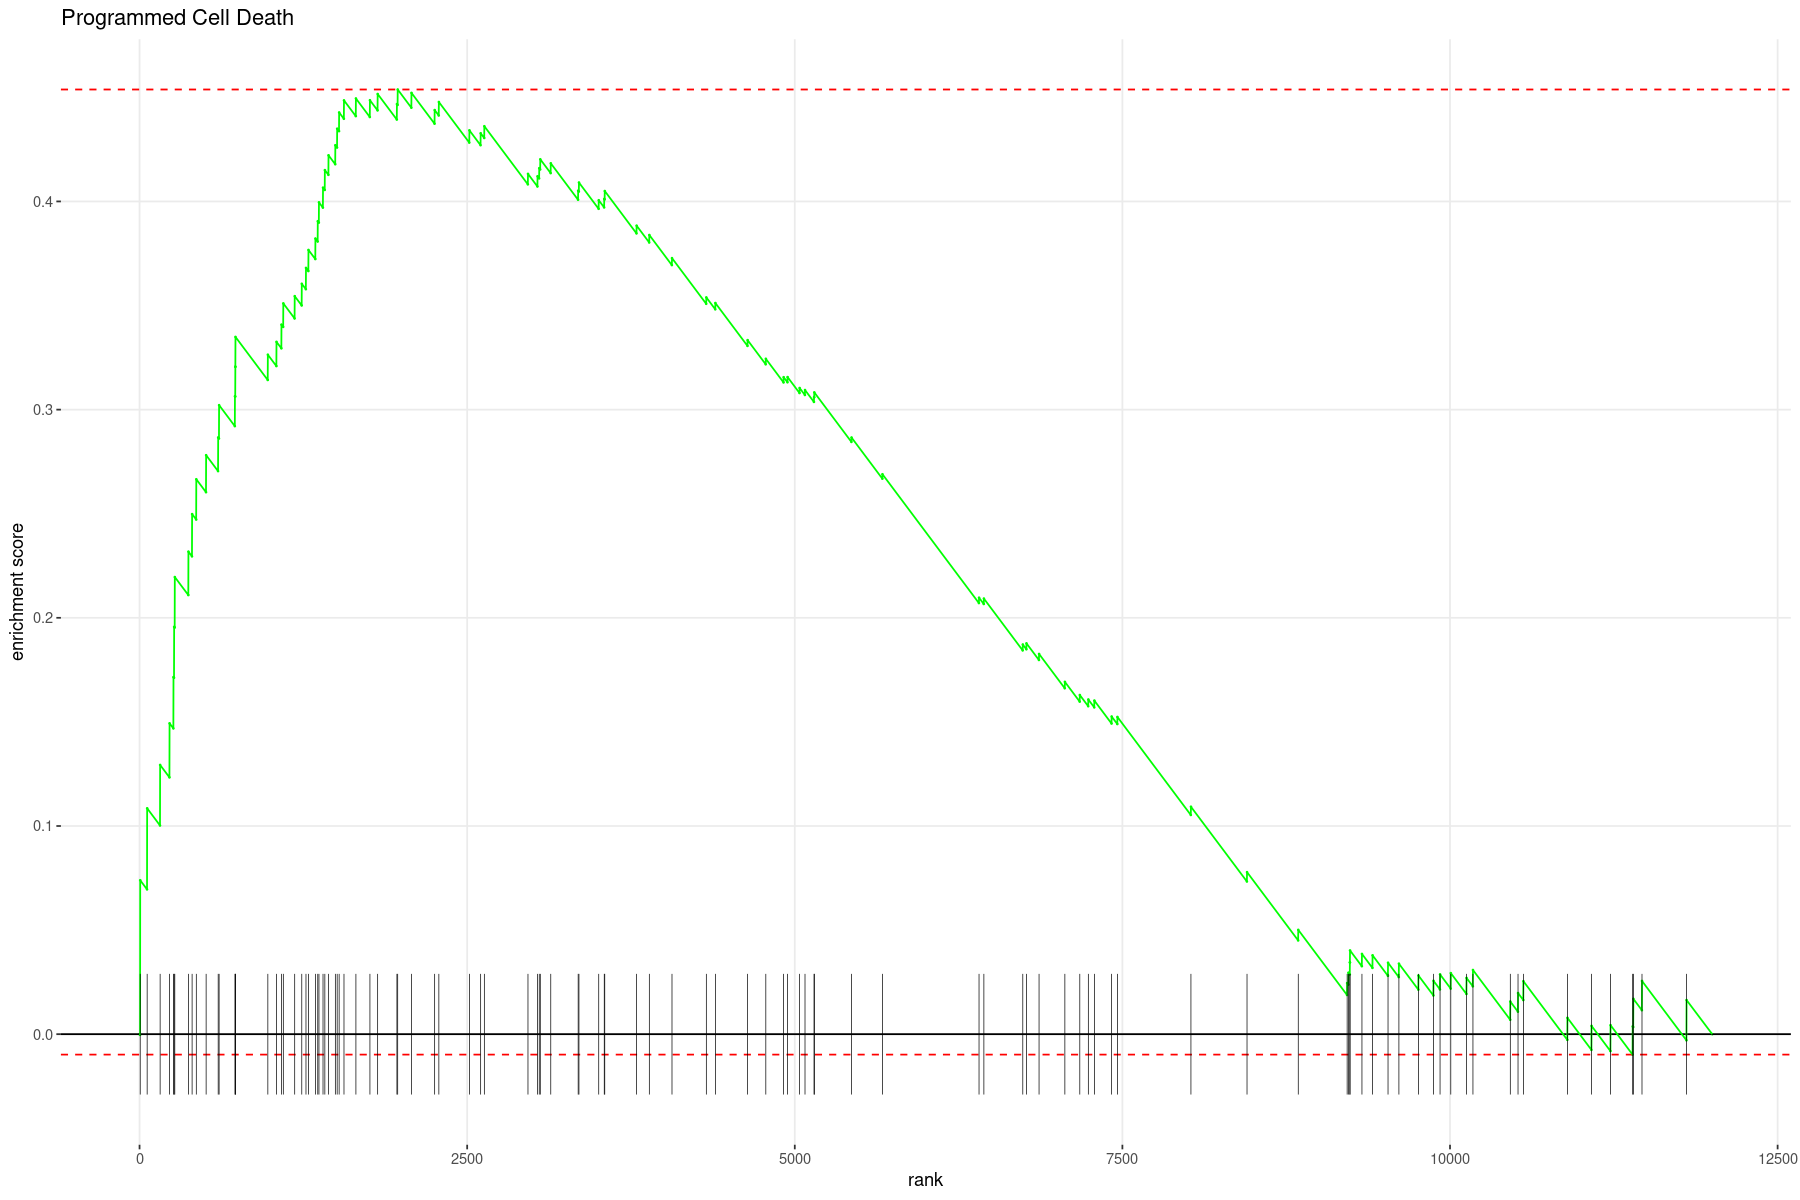

In [121]:
#test fgsea with ex
plotEnrichment(examplePathways[["5991130_Programmed_Cell_Death"]],
               exampleRanks) + labs(title="Programmed Cell Death")

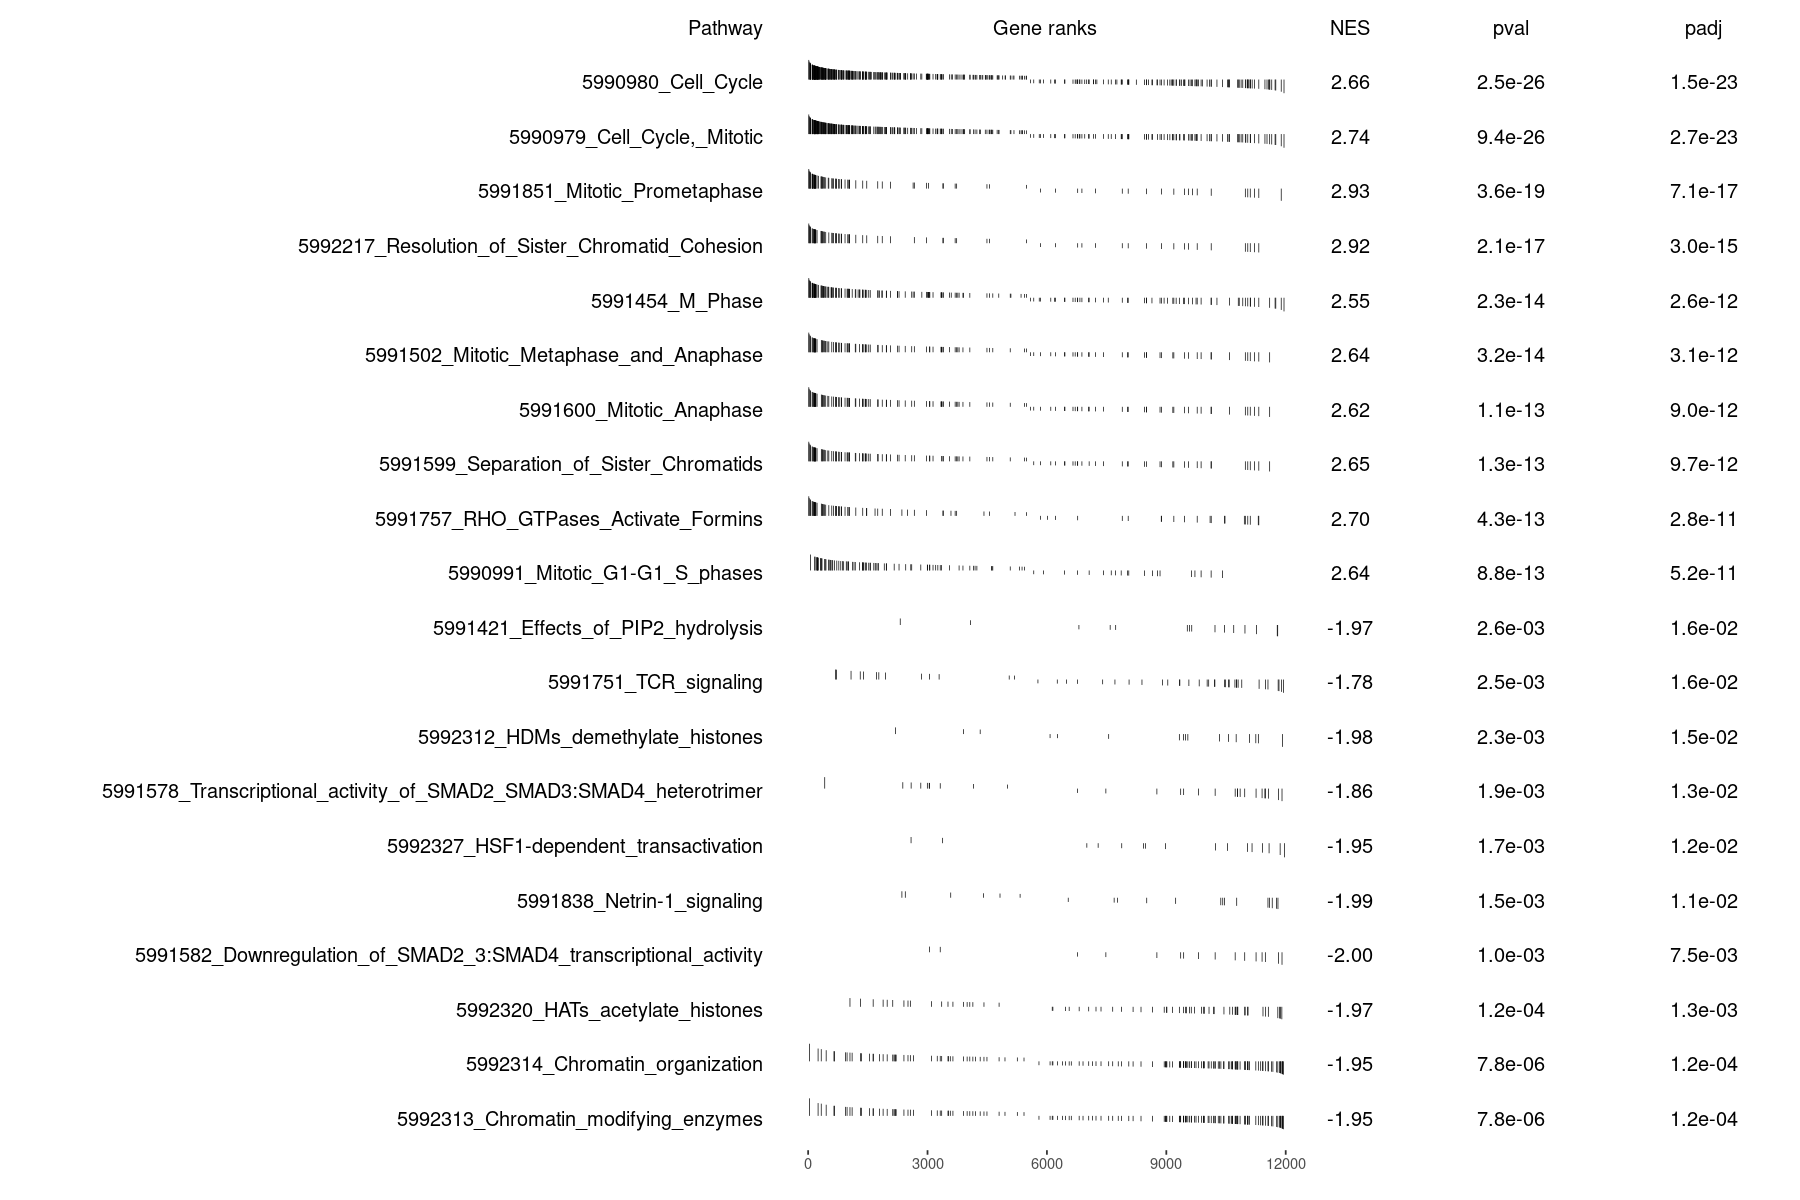

In [124]:
#Table for selected pathways 
topPathwaysUp <- fgseaRes[ES > 0][head(order(pval), n=10), pathway]
topPathwaysDown <- fgseaRes[ES < 0][head(order(pval), n=10), pathway]
topPathways <- c(topPathwaysUp, rev(topPathwaysDown))
plotGseaTable(examplePathways[topPathways], exampleRanks, fgseaRes, 
              gseaParam=0.5)

### 3.2 ex with cluster 5

In [126]:
pathways <- gmtPathways(system.file(
     "extdata", "c2.cp.reactome.v7.5.1.symbols.gmt", package="fgsea"))

In [127]:
head(pathways)

$REACTOME_INTERLEUKIN_6_SIGNALING
 [1] "JAK2"   "TYK2"   "CBL"    "STAT1"  "IL6ST"  "IL6"    "IL6R"   "JAK1"  
 [9] "STAT3"  "PTPN11" "SOCS3" 

$REACTOME_APOPTOSIS
  [1] "BAD"       "CFLAR"     "PSMB1"     "PSMC4"     "BID"       "VIM"      
  [7] "FAS"       "BAK1"      "DAPK2"     "CDH1"      "PSMA4"     "DSG2"     
 [13] "CASP8"     "PRKCQ"     "ROCK1"     "PSME4"     "ARHGAP10"  "TP63"     
 [19] "TP73"      "PKP1"      "BAX"       "PSMC5"     "ADD1"      "DNM1L"    
 [25] "PPP1R13B"  "DYNLL1"    "PSME1"     "CLSPN"     "PSMD5"     "DSP"      
 [31] "PSMD8"     "MAPK1"     "GZMB"      "PSMC6"     "PSMA3"     "PSMC1"    
 [37] "PSMB5"     "ACIN1"     "PSMA6"     "PSME2"     "PSMA7"     "E2F1"     
 [43] "PSMD10"    "XIAP"      "BMX"       "STK24"     "TRADD"     "MAPK3"    
 [49] "PSMD7"     "TJP1"      "BMF"       "GSDMD"     "TNFRSF10A" "AKT2"     
 [55] "BBC3"      "CARD8"     "GSDME"     "PSMA2"     "MAPK8"     "UNC5B"    
 [61] "PSMD3"     "SEPTIN4"   "KPNB1"     "C1QBP"     "PSMD11"    "YWHAE"    
 [67] "BIRC2"     "PSMD9"     "LMNB1"     "UNC5A"     "KPNA1"     "TFDP2"    
 [73] "PSMD14"    "AKT3"      "FASLG"     "TJP2"      "APAF1"     "TNFRSF10B"
 [79] "PPP3CC"    "TNFSF10"   "H1-3"      "H1-1"      "PSMF1"     "PSMB2"    
 [85] "TRAF2"     "TICAM1"    "SEM1"      "YWHAH"     "PSMA1"     "PSME3"    
 [91] "CASP9"     "YWHAQ"     "STK26"     "DSG3"      "DSG1"      "APC"      
 [97] "DBNL"      "NMT1"      "TLR4"      "PSMB7"     "RIPK1"     "UACA"     
[103] "CASP6"     "TP53"      "PMAIP1"    "AKT1"      "PSMB6"     "PSMA5"    
[109] "TP53BP2"   "RPS27A"    "CDKN2A"    "GSN"       "GAS2"      "APIP"     
[115] "UBC"       "BCL2L11"   "LY96"      "PSMA8"     "APPL1"     "PSMD4"    
[121] "PSMB4"     "DFFA"      "LMNA"      "PSMC2"     "OMA1"      "PSMD6"    
[127] "PRKCD"     "HMGB2"     "CASP3"     "YWHAZ"     "CASP7"     "PSMC3"    
[133] "YWHAB"     "DAPK3"     "CTNNB1"    "FADD"      "H1-4"      "FNTA"     
[139] "STAT3"     "PTK2"      "DFFB"      "AVEN"      "YWHAG"     "UBB"      
[145] "CD14"      "BCL2L1"    "BCL2"      "CYCS"      "PSMD1"     "PSMD2"    
[151] "SFN"       "PLEC"      "MAGED1"    "PAK2"      "SATB1"     "DIABLO"   
[157] "H1-5"      "PSMD13"    "BCAP31"    "MAPT"      "DCC"       "H1-2"     
[163] "H1-0"      "HMGB1"     "DAPK1"     "PSMD12"    "SPTAN1"    "OCLN"     
[169] "TFDP1"     "OPA1"      "PSMB8"     "PSMB10"    "PPP3R1"    "UBA52"    
[175] "PSMB11"    "PSMB9"     "TICAM2"    "DYNLL2"    "PSMB3"    

$REACTOME_HEMOSTASIS
  [1] "FGR"       "CD99"      "TFPI"      "KDM1A"     "PRKAR2B"   "ITGAL"    
  [7] "ITGA3"     "LAMP2"     "ITGA2B"    "TBXA2R"    "NOS2"      "SELE"     
 [13] "CD9"       "FYN"       "PLAUR"     "EHD3"      "IGF1"      "CD74"     
 [19] "HGF"       "SLC7A9"    "EHD2"      "CD44"      "PRKCH"     "VCL"      
 [25] "RAB27B"    "LCP2"      "HSPA5"     "BCAR1"     "PIK3CB"    "KIF1B"    
 [31] "ITIH4"     "F7"        "ATP2B4"    "DGKG"      "GNA15"     "GUCY1B1"  
 [37] "GPC1"      "HMG20B"    "GNAI3"     "DGKA"      "PRKCQ"     "PPP2R5A"  
 [43] "CD84"      "KIF26A"    "RHOA"      "PRKCZ"     "ATP2B3"    "KIF2A"    
 [49] "RASGRP2"   "PPP2R5B"   "TRPC7"     "ATP1B3"    "GNB5"      "CDC42"    
 [55] "ATP2B1"    "WDR1"      "PRKACA"    "SPP2"      "ACTN1"     "IRAG1"    
 [61] "ATP2A3"    "MGLL"      "SRI"       "ACTB"      "TUBA3D"    "KIFAP3"   
 [67] "STXBP2"    "DGKD"      "APBB1IP"   "ACTN2"     "CAPZB"     "PPP2R5C"  
 [73] "GNB1"      "RAPGEF3"   "CEACAM1"   "KIF22"     "CARMIL1"   "P2RX5"    
 [79] "APLP2"     "APOB"      "KIF3C"     "CEACAM6"   "GNAS"      "GP6"      
 [85] "GNA11"     "DOCK9"     "DOCK3"     "KIF9"      "F11"       "SIRPG"    
 [91] "P2RX7"     "KIF16B"    "NOS1"      "RCOR1"     "THPO"      "GLG1"     
 [97] "KIF4A"     "ITGA6"     "RAPGEF4"   "TF"        "APOH"      "ANGPT2"   
[103] "SLC7A8"    "TGFB2"     "CBX5"      "BRPF3"     "ITPR3"     "JAK2"     
[109] "ABL1"      "SERPIND1"  "P2RX6"     "PPIL2"     "MAPK1"     "PICK1"    
[115

In [133]:
str(head(pathways))

List of 6
 $ REACTOME_INTERLEUKIN_6_SIGNALING                                                           : chr [1:11] "JAK2" "TYK2" "CBL" "STAT1" ...
 $ REACTOME_APOPTOSIS                                                                         : chr [1:179] "BAD" "CFLAR" "PSMB1" "PSMC4" ...
 $ REACTOME_HEMOSTASIS                                                                        : chr [1:678] "FGR" "CD99" "TFPI" "KDM1A" ...
 $ REACTOME_INTRINSIC_PATHWAY_FOR_APOPTOSIS                                                   : chr [1:55] "BAD" "BID" "BAK1" "CASP8" ...
 $ REACTOME_MAPK3_ERK1_ACTIVATION                                                             : chr [1:10] "JAK2" "MAPK3" "TYK2" "IL6ST" ...
 $ REACTOME_TRANSLESION_SYNTHESIS_BY_Y_FAMILY_DNA_POLYMERASES_BYPASSES_LESIONS_ON_DNA_TEMPLATE: chr [1:39] "REV3L" "SPRTN" "RFC1" "RFC2" ...


In [130]:
#create the ranking vector from the cluster 5
#row <- rownames(dataset)


v_c5 <- cluster_table$"Mophological.cluster.5"
print(type(v_c5))
names(v_c5) <- rna$Description

str(head(v_c5))


[1] "double"
 Named num [1:6] -8.341 -6.317 -0.113 -0.957 20.797 ...
 - attr(*, "names")= chr [1:6] "WASH7P" "RP11-34P13.18" "MTND1P23" "MTND2P28" ...


In [132]:
ordered_v_c5 <- sort(v_c5, decreasing = FALSE)
str(head(ordered_v_c5))
head(ordered_v_c5)

 Named num [1:6] -31.7 -30 -30 -30 -30 ...
 - attr(*, "names")= chr [1:6] "STC1" "HIST2H2BF" "HBB" "HBD" ...


STC1 HIST2H2BF       HBB       HBD       PTH      CHGA 
-31.74974 -30.00000 -30.00000 -30.00000 -30.00000 -30.00000

In [140]:
fgseaRes <- fgsea(pathways, ordered_v_c5, eps= 0.0, minSize=15, maxSize=500)
head(fgseaRes)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.2% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


pathway                                                                  
1 REACTOME_ABC_FAMILY_PROTEINS_MEDIATED_TRANSPORT                          
2 REACTOME_ABC_TRANSPORTER_DISORDERS                                       
3 REACTOME_ABERRANT_REGULATION_OF_MITOTIC_EXIT_IN_CANCER_DUE_TO_RB1_DEFECTS
4 REACTOME_ABORTIVE_ELONGATION_OF_HIV_1_TRANSCRIPT_IN_THE_ABSENCE_OF_TAT   
5 REACTOME_ACTIVATED_NOTCH1_TRANSMITS_SIGNAL_TO_THE_NUCLEUS                
6 REACTOME_ACTIVATED_TAK1_MEDIATES_P38_MAPK_ACTIVATION                     
  pval         padj         log2err    ES         NES        size
1 1.075223e-06 1.042499e-05 0.64355184  0.5296454  2.0926541 89  
2 2.616586e-10 6.308095e-09 0.81403584  0.6637566  2.5206699 68  
3 8.343816e-01 9.963432e-01 0.05617666  0.2592436  0.7204870 19  
4 2.680733e-02 8.922438e-02 0.35248786  0.5331326  1.5345893 22  
5 5.057595e-02 1.539718e-01 0.32177592 -0.5074591 -1.5195936 28  
6 8.884120e-01 1.000000e+00 0.05434344  0.2434230  0.6910064 21  
  leadingEdge                                                                                                                                                                                                                                                                                                                                                           
1 ABCC3 , KCNJ11, ABCB6 , PSMB6 , PSMD14, PSMA5 , PSMA3 , PSMB5 , PSMC1 , DERL3 , PSMB3 , PSMD8 , PSMC4 , PSMA6 , VCP   , PSMB1 , PSMD1 , PSMD7 , PSMC2 , ABCC1 , PSMA7 , PSMA2 , PSME3 , PSMB7 , RNF5  , PSMC3 , UBB   , PSMB2 , PSMD2 , PSMB4 , PSMD6 , PEX3  , PSMD11, PSMD3 , PSMD4 , PSMA4 , DERL2 , PSMD9 , ABCA3 , ABCD3 , EIF2S2, EIF2S1, PSMA1 , SEM1  , PSME4 
2 KCNJ11, ABCC8 , ABCB6 , PSMB6 , PSMD14, PSMA5 , PSMA3 , PSMB5 , PSMC1 , DERL3 , PSMB3 , PSMD8 , PSMC4 , PSMA6 , VCP   , PSMB1 , PSMD1 , PSMD7 , PSMC2 , PSMA7 , PSMA2 , PSME3 , PSMB7 , RNF5  , PSMC3 , UBB   , PSMB2 , PSMD2 , PSMB4 , PSMD6 , PSMD11, PSMD3 , PSMD4 , PSMA4 , DERL2 , PSMD9 , ABCA3 , PSMA1 , SEM1  , PSME4 , PSMD13, OS9                           
3 ANAPC11, ANAPC15, CDC26  , UBE2S                                                                                                                                                                                                                                                                                                                                      
4 POLR2L , CTDP1  , POLR2I , POLR2B , POLR2E , POLR2J , POLR2G , POLR2D , SUPT4H1, POLR2C , GTF2F1 , NCBP1  , NELFE  , NELFA  , NELFCD , POLR2A , GTF2F2 , POLR2K , NELFB  , NCBP2                                                                                                                                                                                      
5 CNTN1  , DLL4   , DLL1   , UBC    , NEURL1B, MIB2   , JAG1   , JAG2                                                                                                                                                                                                                                                                                                   
6 MAPKAPK3, UBB     , IRAK1   , UBE2N   , MAPKAPK2, IKBKG   , UBA52   , RPS27A

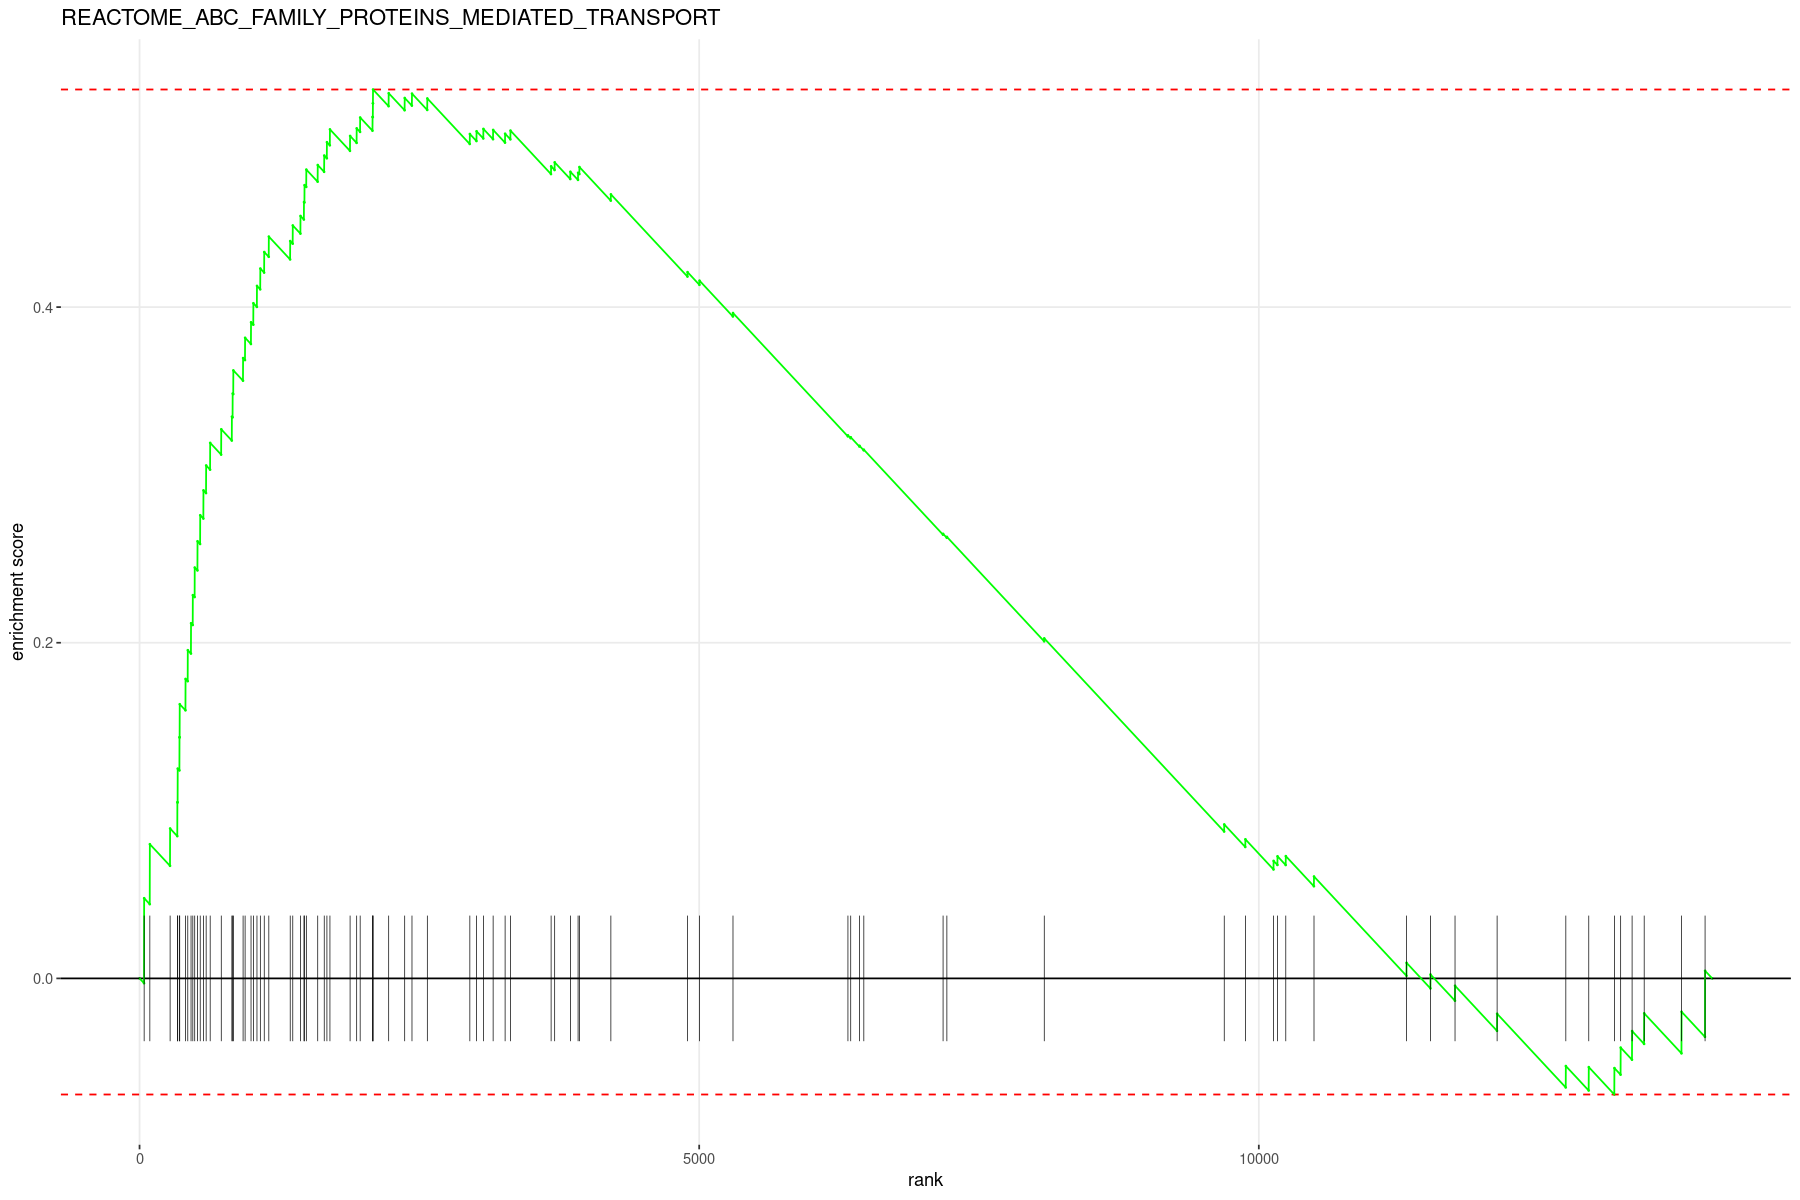

In [141]:
#Enrichment for cluster 5 and first item
plotEnrichment(pathways[["REACTOME_ABC_FAMILY_PROTEINS_MEDIATED_TRANSPORT"]],
               ordered_v_c5) + labs(title="REACTOME_ABC_FAMILY_PROTEINS_MEDIATED_TRANSPORT")